# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Member x
- Member y

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

### GRAPH SETTINGS

In [2]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [4]:
repos = [
    'Eccoar_Complaint',
    'eccoar_frontend',
    'Eccoar_Gateway',
    'Eccoar_Mailer',
    'Eccoar_Reports',
    'Eccoar_Users'
]

language = [['Eccoar_Complaint', 'ts'], 
            ['eccoar_frontend', 'ts'], 
            ['Eccoar_Gateway', 'ts'], 
            ['Eccoar_Mailer', 'ts'], 
            ['Eccoar_Reports', 'ts'], 
            ['Eccoar_Users', 'ts']]

repos_lenguage = {}

for item in language:
    repos_lenguage[f"{item[0]}"] = item[1]

In [5]:
repos_lenguage

{'Eccoar_Complaint': 'ts',
 'eccoar_frontend': 'ts',
 'Eccoar_Gateway': 'ts',
 'Eccoar_Mailer': 'ts',
 'Eccoar_Reports': 'ts',
 'Eccoar_Users': 'ts'}

In [6]:
jsons = glob('**/*.json') # add the path here
jsons

['gateway/fga-eps-mds-2020_2-Eccoar_Gateway-05-05-2021.json',
 'gateway/fga-eps-mds-2020_2-Eccoar_Gateway-23-04-2021.json',
 'gateway/fga-eps-mds-2020_2-Eccoar_Gateway-28-04-2021.json',
 'gateway/fga-eps-mds-2020_2-Eccoar_Gateway-12-04-2021.json',
 'gateway/fga-eps-mds-2020_2-Eccoar_Gateway-17-04-2021.json',
 'gateway/fga-eps-mds-2020_2-Eccoar_Gateway-23-03-2021.json',
 'gateway/fga-eps-mds-2020_2-Eccoar_Gateway-03-05-2021.json',
 'gateway/fga-eps-mds-2020_2-Eccoar_Gateway-10-05-2021.json',
 'gateway/fga-eps-mds-2020_2-Eccoar_Gateway-01-05-2021.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-23-03-2021.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-17-04-2021.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-12-04-2021.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-27-04-2021.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-03-05-2021.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_C

In [7]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df, repos

#### Create base component dataframe

In [8]:
base_component_df, repos = create_base_component_df(jsons)

In [9]:
base_component_df

metric  value bestValue  \
144  duplicated_lines_density    0.0      True   
145                 functions     42       NaN   
146       test_execution_time     70       NaN   
147           security_rating    1.0      True   
148                     tests     21       NaN   
149                     files     19       NaN   
150                complexity     60       NaN   
151                     ncloc    626       NaN   
152                  coverage   68.2     False   
153        reliability_rating    1.0      True   
154     comment_lines_density    0.0     False   
155      test_success_density  100.0      True   
168  duplicated_lines_density    0.0      True   
169                 functions     42       NaN   
170       test_execution_time     48       NaN   
171           security_rating    1.0      True   
172                     tests     21       NaN   
173                     files     19       NaN   
174                complexity     60       NaN   
175                     ncloc    626       NaN   
176                  coverage   68.2     False   
177        reliability_rating    1.0      True   
178     comment_lines_density    0.0     False   
179      test_success_density  100.0      True   
204  duplicated_lines_density    0.0      True   
205                 functions     51       NaN   
206       test_execution_time     71       NaN   
207           security_rating    1.0      True   
208                     tests     23       NaN   
209                     files     20       NaN   
210                complexity     70       NaN   
211                     ncloc    711       NaN   
212                  coverage   67.0     False   
213        reliability_rating    1.0      True   
214     comment_lines_density    0.0     False   
215      test_success_density  100.0      True   
192  duplicated_lines_density    0.0      True   
193                 functions     54       NaN   
194       test_execution_time     93       NaN   
195           security_rating    1.0      True   
196                     tests     27       NaN   
197                     files     20       NaN   
198                complexity     78       NaN   
199                     ncloc    759       NaN   
200                  coverage   68.8     False   
201        reliability_rating    1.0      True   
202     comment_lines_density    0.0     False   
203      test_success_density  100.0      True   
132  duplicated_lines_density    0.0      True   
133                 functions     36       NaN   
134       test_execution_time     34       NaN   
135           security_rating    1.0      True   
136                     tests     20       NaN   
137                     files     15       NaN   
138                complexity     53       NaN   
139                     ncloc    451       NaN   
140                  coverage   72.1     False   
141        reliability_rating    1.0      True   
142     comment_lines_density    0.0     False   
143      test_success_density  100.0      True   
120  duplicated_lines_density    0.0      True   
121                 functions     36       NaN   
122       test_execution_time     36       NaN   
123           security_rating    1.0      True   
124                     tests     20       NaN   
125                     files     15       NaN   
126                complexity     53       NaN   
127                     ncloc    451       NaN   
128                  coverage   72.1     False   
129        reliability_rating    1.0      True   
130     comment_lines_density    0.0     False   
131      test_success_density  100.0      True   
180  duplicated_lines_density    0.0      True   
181                 functions     40       NaN   
182       test_execution_time     34       NaN   
183           security_rating    1.0      True   
184                     tests     20       NaN   
185                     files     17       NaN   
186                complexity     57       NaN   
187                    

#### Create dataframe per file

In [10]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [11]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [12]:
file_component_df = create_file_df(jsons)

In [13]:
file_component_df

path functions complexity  \
105     src/migration/1618526567509-CreateComplaint.ts         2          2   
106          src/migration/1618529825437-CreateVote.ts         2          2   
107                              src/utils/Category.ts         0          0   
108                            src/entity/Complaint.ts         0          0   
109            src/repositories/ComplaintRepository.ts         7          7   
110                       src/utils/ComplaintUpvote.ts         1          3   
111                         src/utils/ComplaintVote.ts         0          0   
112                src/utils/ComplaintVoteConfirmed.ts         1          3   
113                     src/utils/ComplaintWithVote.ts         0          0   
114             src/controllers/ControllerComplaint.ts        13         24   
115                                          src/db.ts         3          5   
116                                      src/routes.ts         7          7   
117                          src/services/S3Service.ts         2          2   
118                                src/utils/sentry.ts         0          0   
119                                      src/server.ts         1          2   
120                                src/utils/Status.ts         0          0   
121                                src/entity/Votes.ts         0          0   
122                src/repositories/VotesRepository.ts         3          3   
123                              src/utils/VoteType.ts         0          0   
142     src/migration/1618526567509-CreateComplaint.ts         2          2   
143          src/migration/1618529825437-CreateVote.ts         2          2   
144                              src/utils/Category.ts         0          0   
145                            src/entity/Complaint.ts         0          0   
146            src/repositories/ComplaintRepository.ts         7          7   
147                       src/utils/ComplaintUpvote.ts         1          3   
148                         src/utils/ComplaintVote.ts         0          0   
149                src/utils/ComplaintVoteConfirmed.ts         1          3   
150                     src/utils/ComplaintWithVote.ts         0          0   
151             src/controllers/ControllerComplaint.ts        13         24   
152                                          src/db.ts         3          5   
153                                      src/routes.ts         7          7   
154                          src/services/S3Service.ts         2          2   
155                                src/utils/sentry.ts         0          0   
156                                      src/server.ts         1          2   
157                                src/utils/Status.ts         0          0   
158                                src/entity/Votes.ts         0          0   
159                src/repositories/VotesRepository.ts         3          3   
160                              src/utils/VoteType.ts         0          0   
198     src/migration/1618526567509-CreateComplaint.ts         2          2   
199          src/migration/1618529825437-CreateVote.ts         2          2   
200       src/migration/1620151058075-DeleteCascade.ts         2          2   
201                              src/utils/Category.ts         0          0   
202                            src/entity/Complaint.ts         2          2   
203            src/repositories/ComplaintRepository.ts         8          8   
204                       src/utils/ComplaintUpvote.ts         1          3   
205                         src/utils/ComplaintVote.ts         0          0   
206                src/utils/ComplaintVoteConfirmed.ts         1          3   
207                     src/utils/ComplaintWithVote.ts         0          0   
208             src/controllers/ControllerComplaint.ts        14         26   
209                                          src/db.ts         3          5   
210                  

In [14]:
file_component_df.to_excel('data/data.xlsx', index = False)

#### Create dataframe per repository

In [15]:
repository_dataframes = {} 

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df
    
repository_dataframes.keys()

dict_keys(['Eccoar_Complaint', 'eccoar_frontend', 'Eccoar_Gateway', 'Eccoar_Mailer', 'Eccoar_Reports', 'Eccoar_Users'])

In [16]:
# Example

repo1_df = file_component_df[file_component_df['repository'] == 'repo1']
repo2_df = file_component_df[file_component_df['repository'] == 'repo2']
...

Ellipsis

### Metric calculations

##### COMPLEXITY

In [17]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [18]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [19]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### Calculate m1, m2 and m3 for each repository

In [20]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list})
        
    return metrics_df

In [21]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():   
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

### Data visualization

- You must do this for each of your repositories

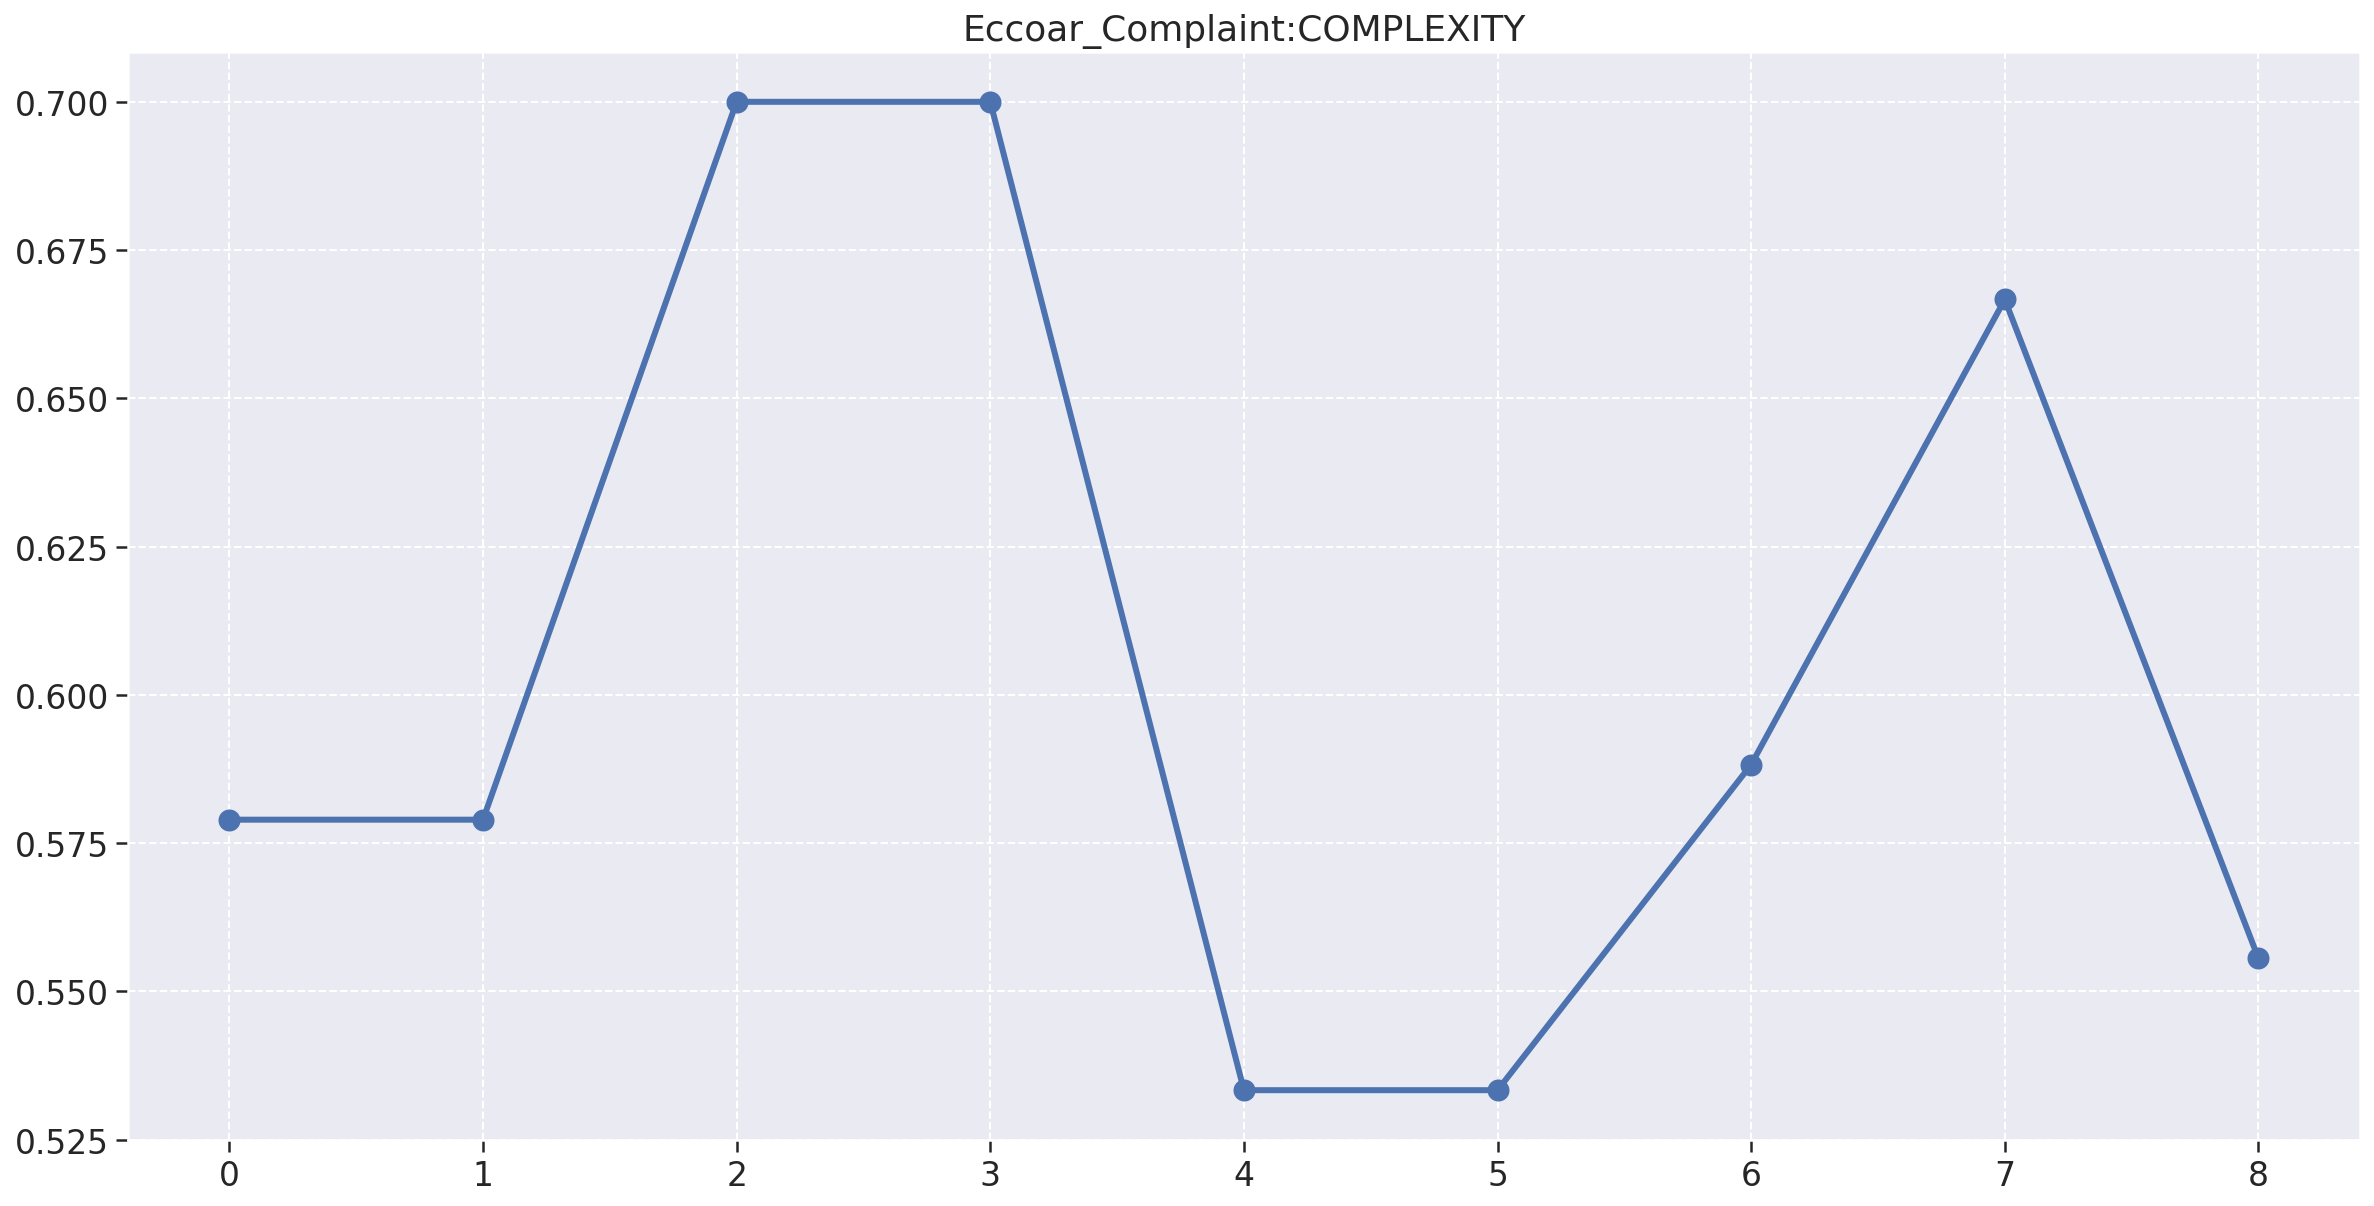

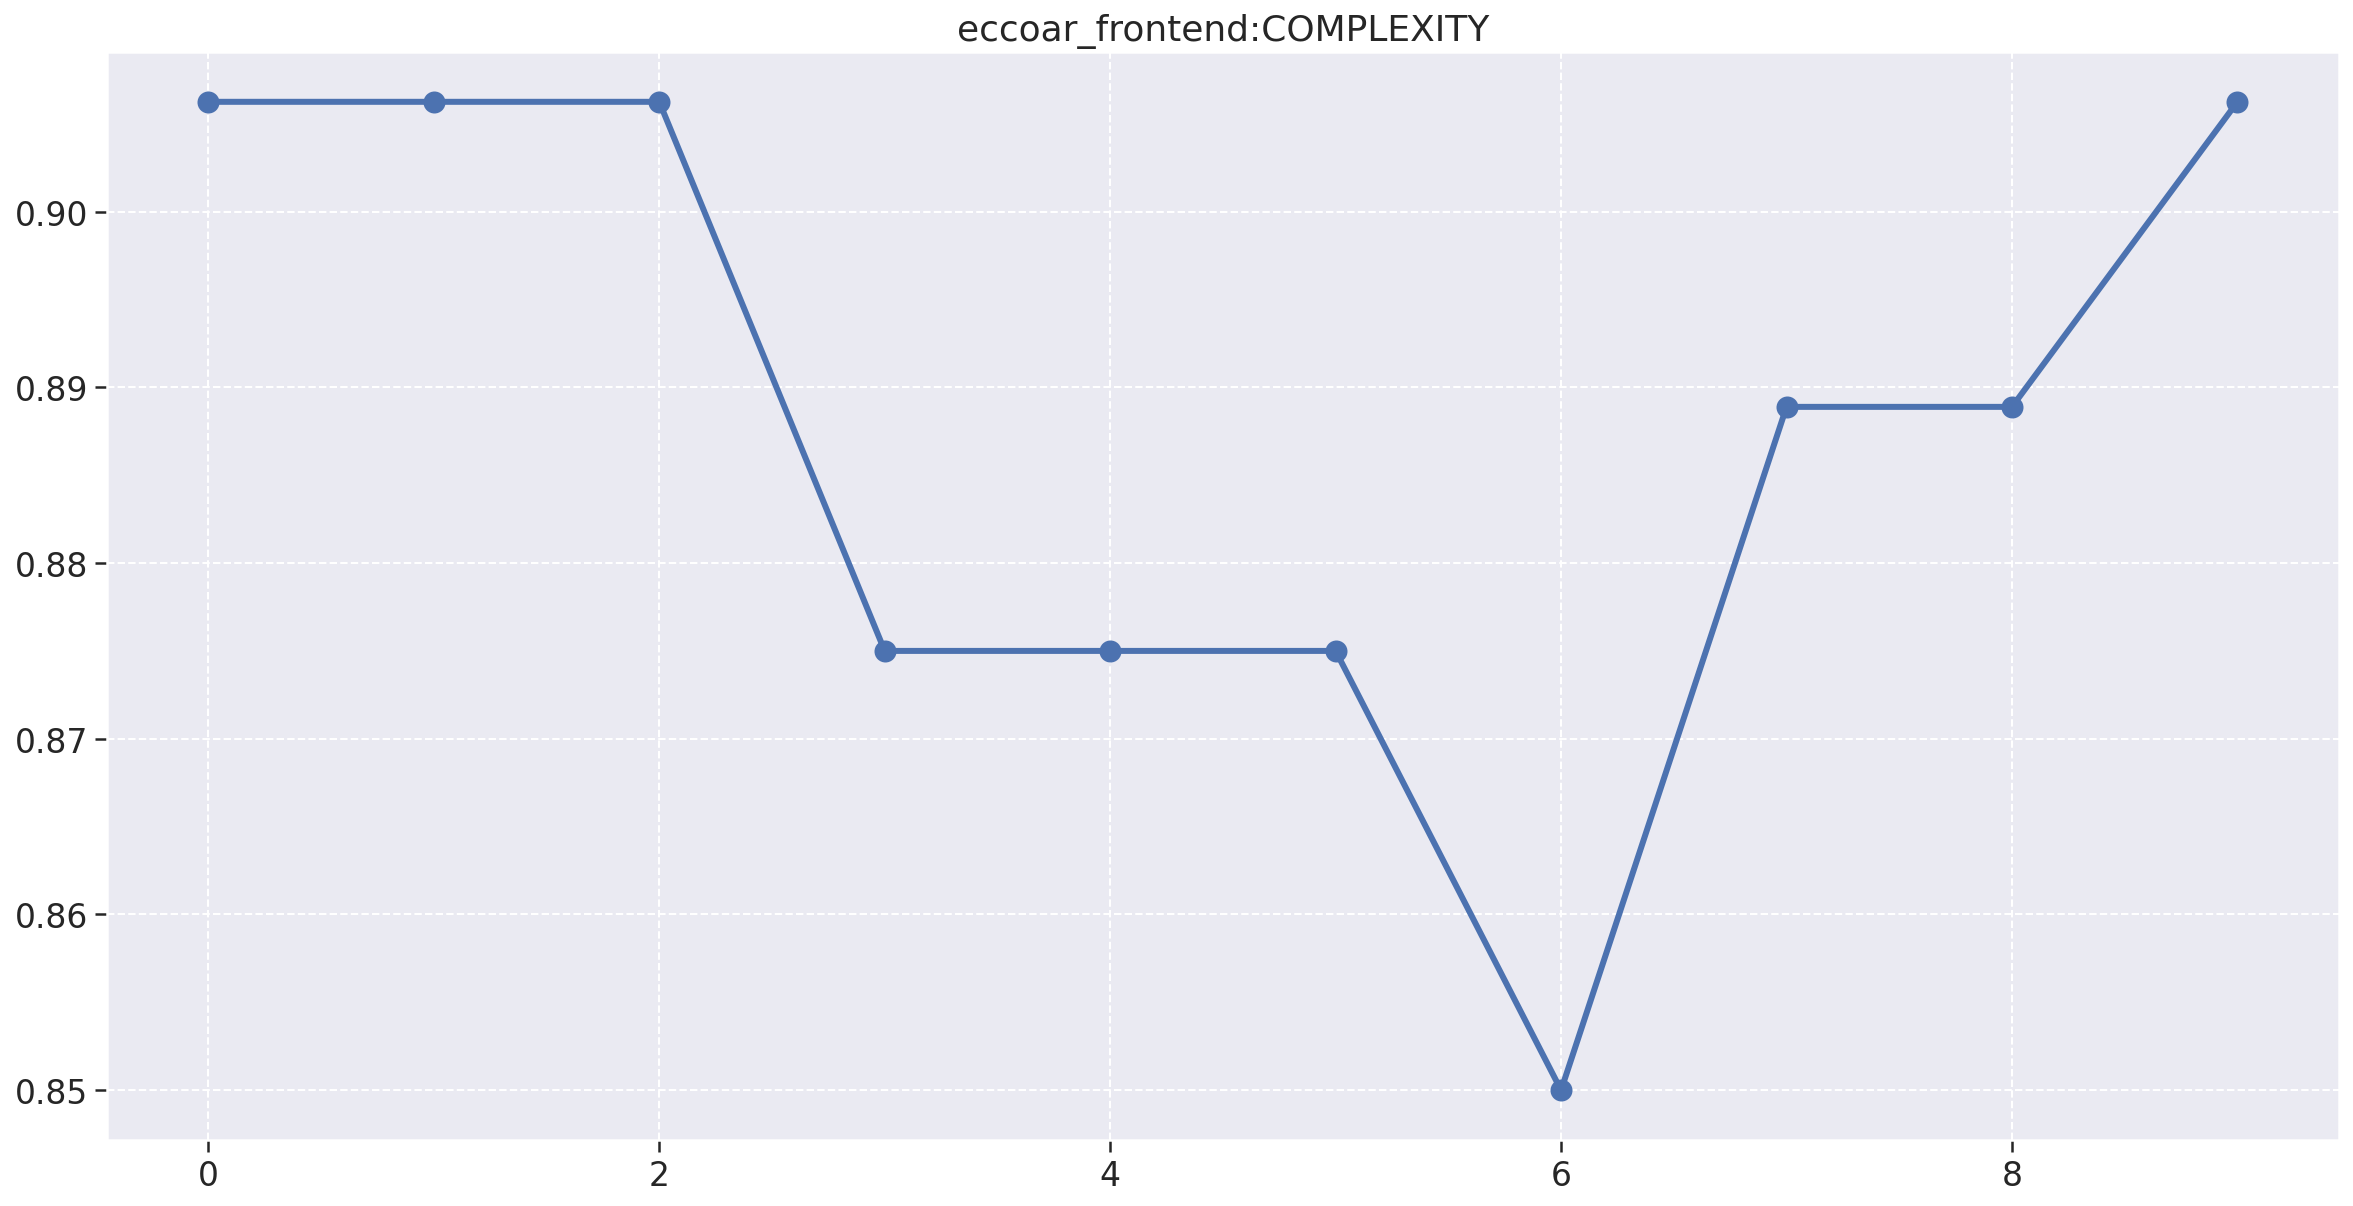

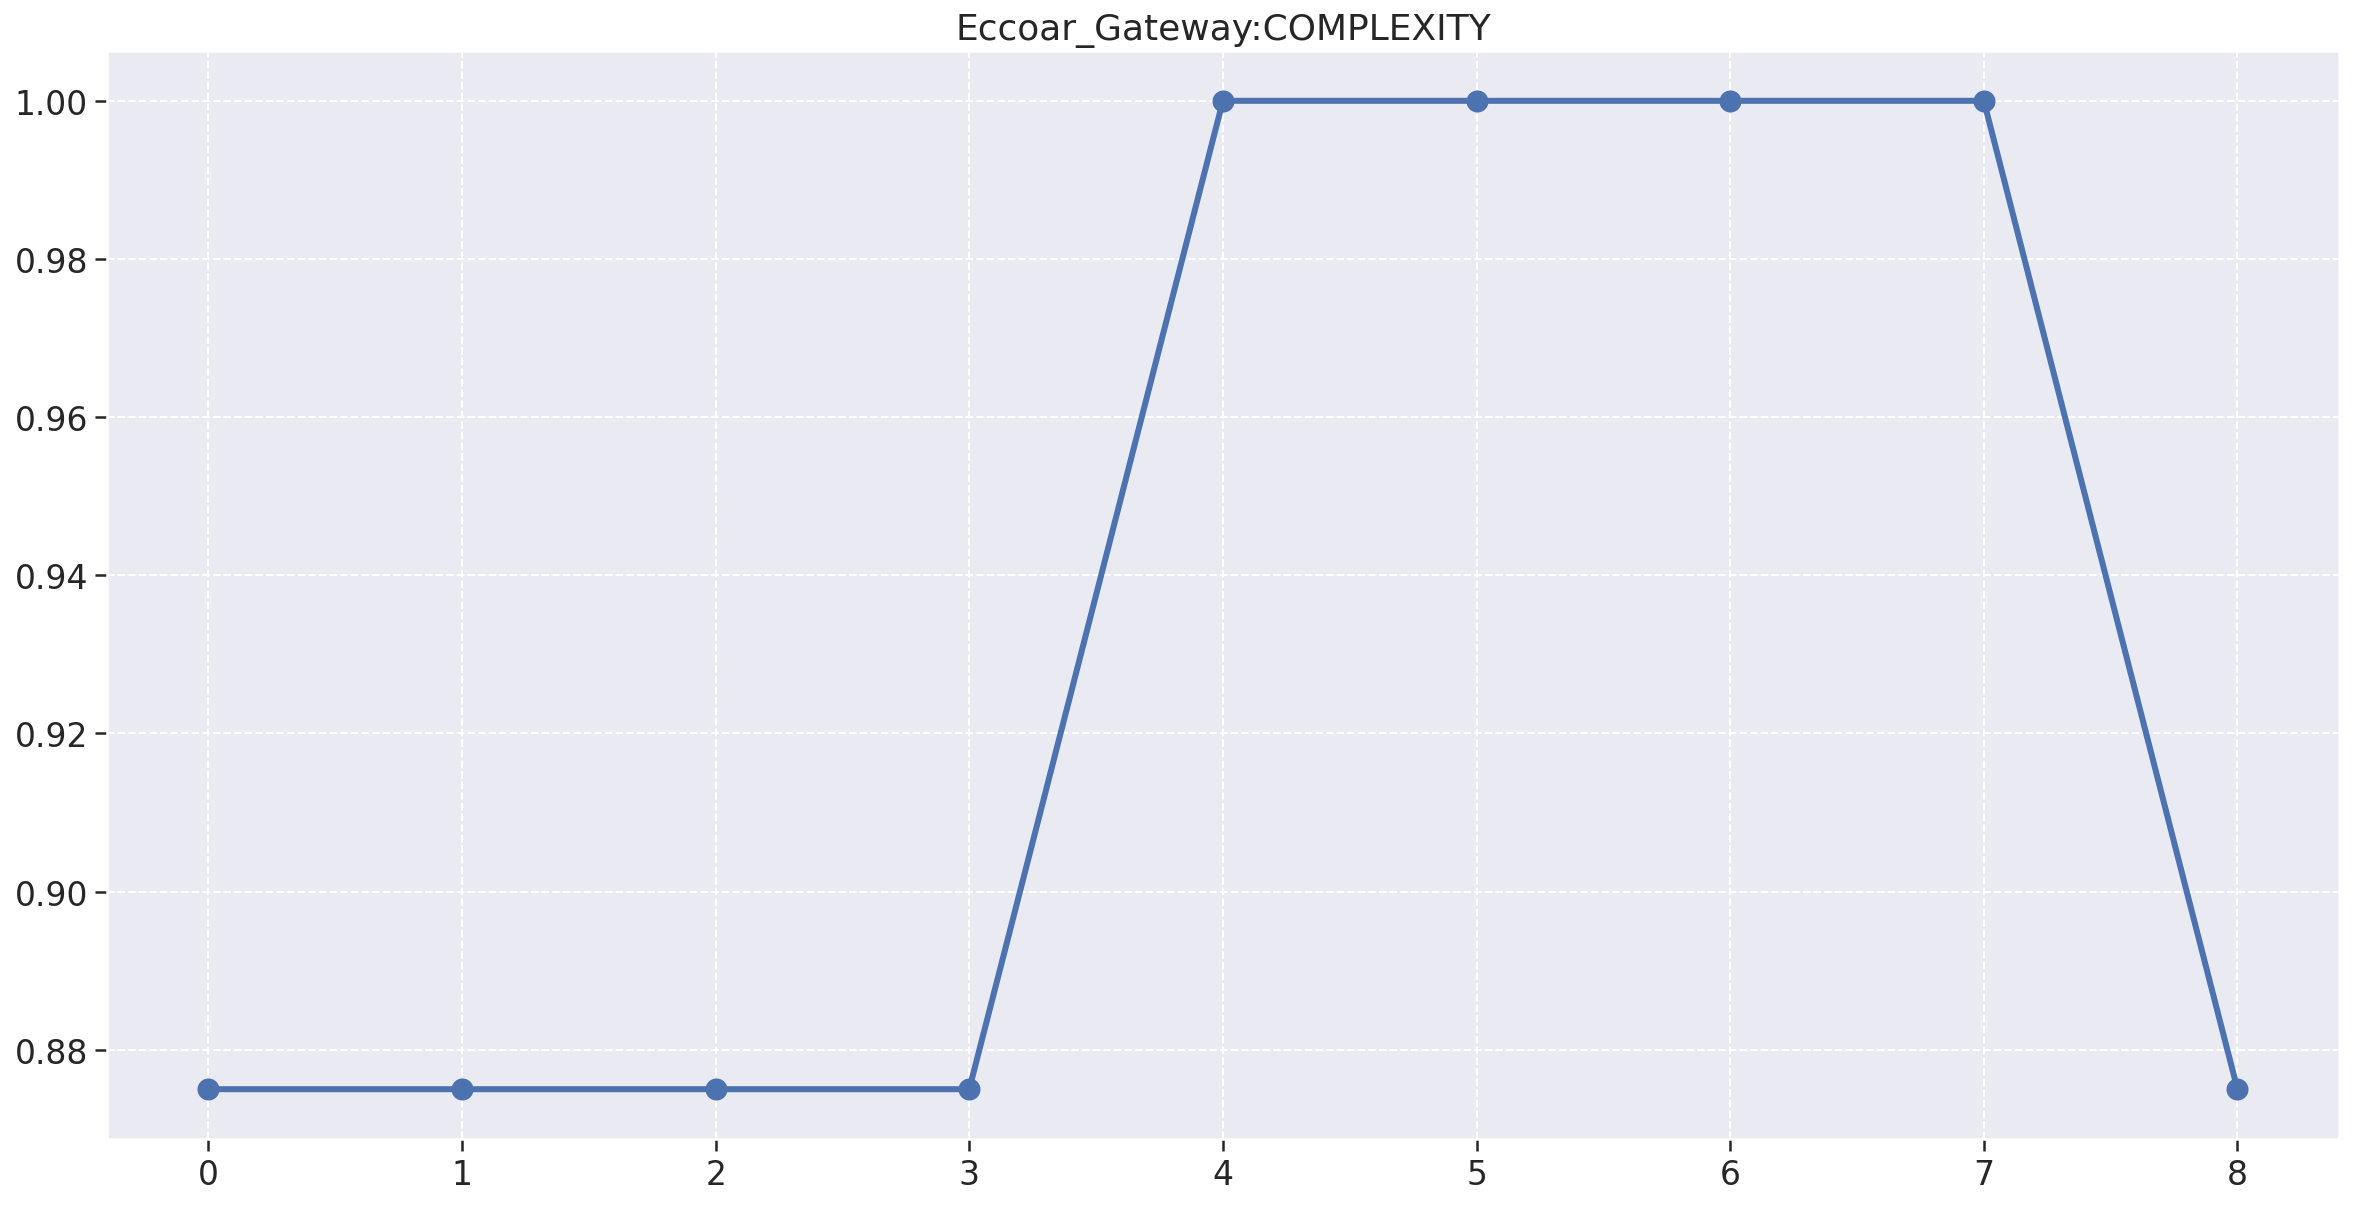

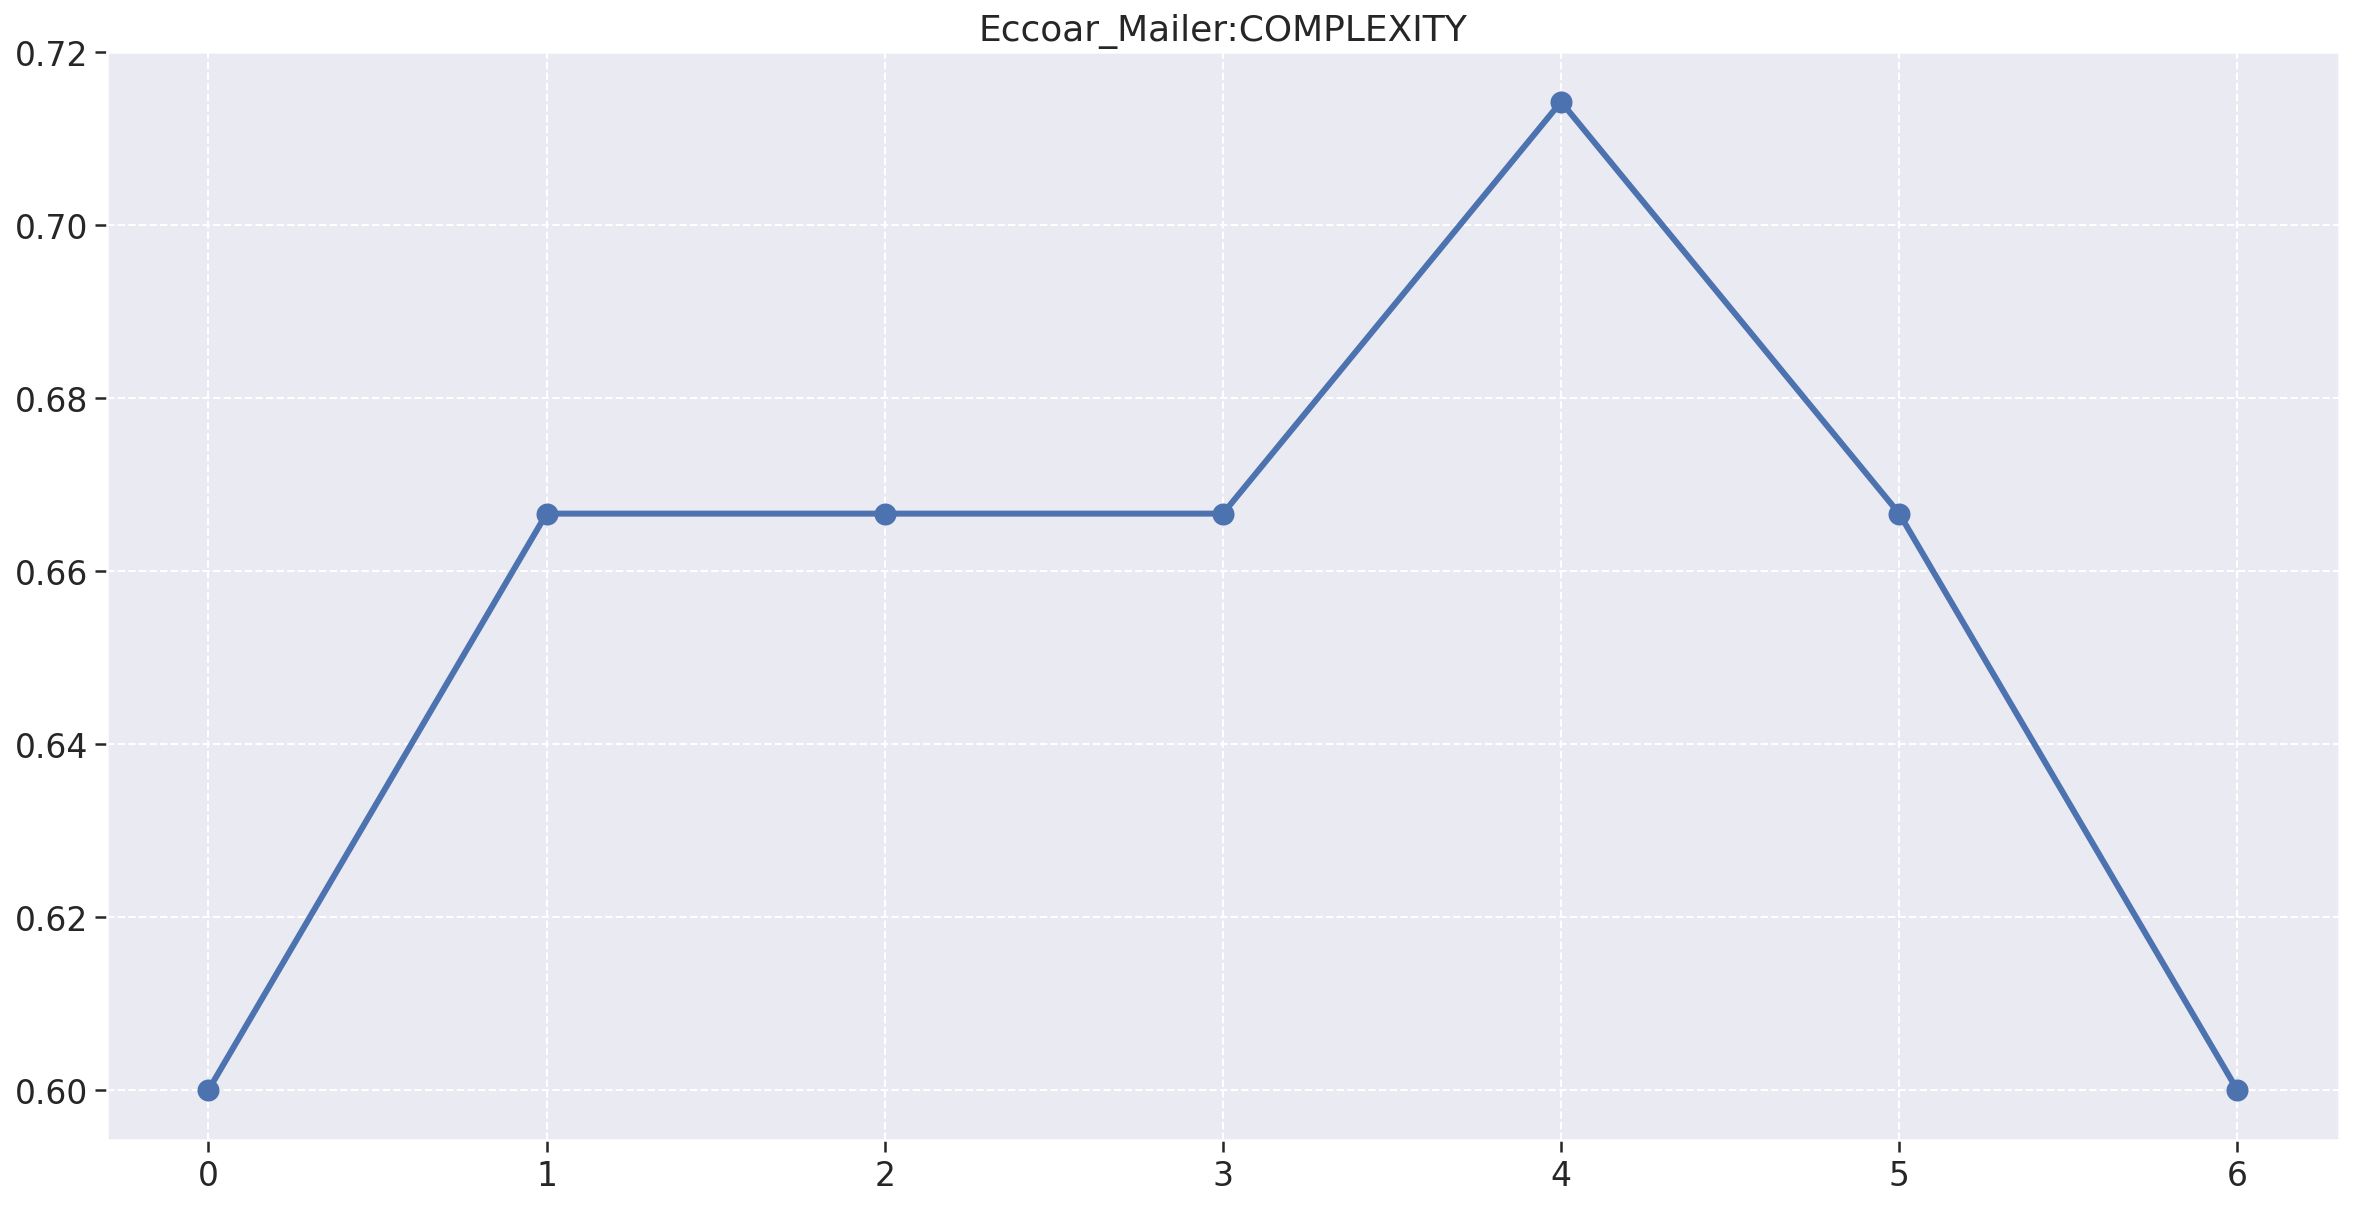

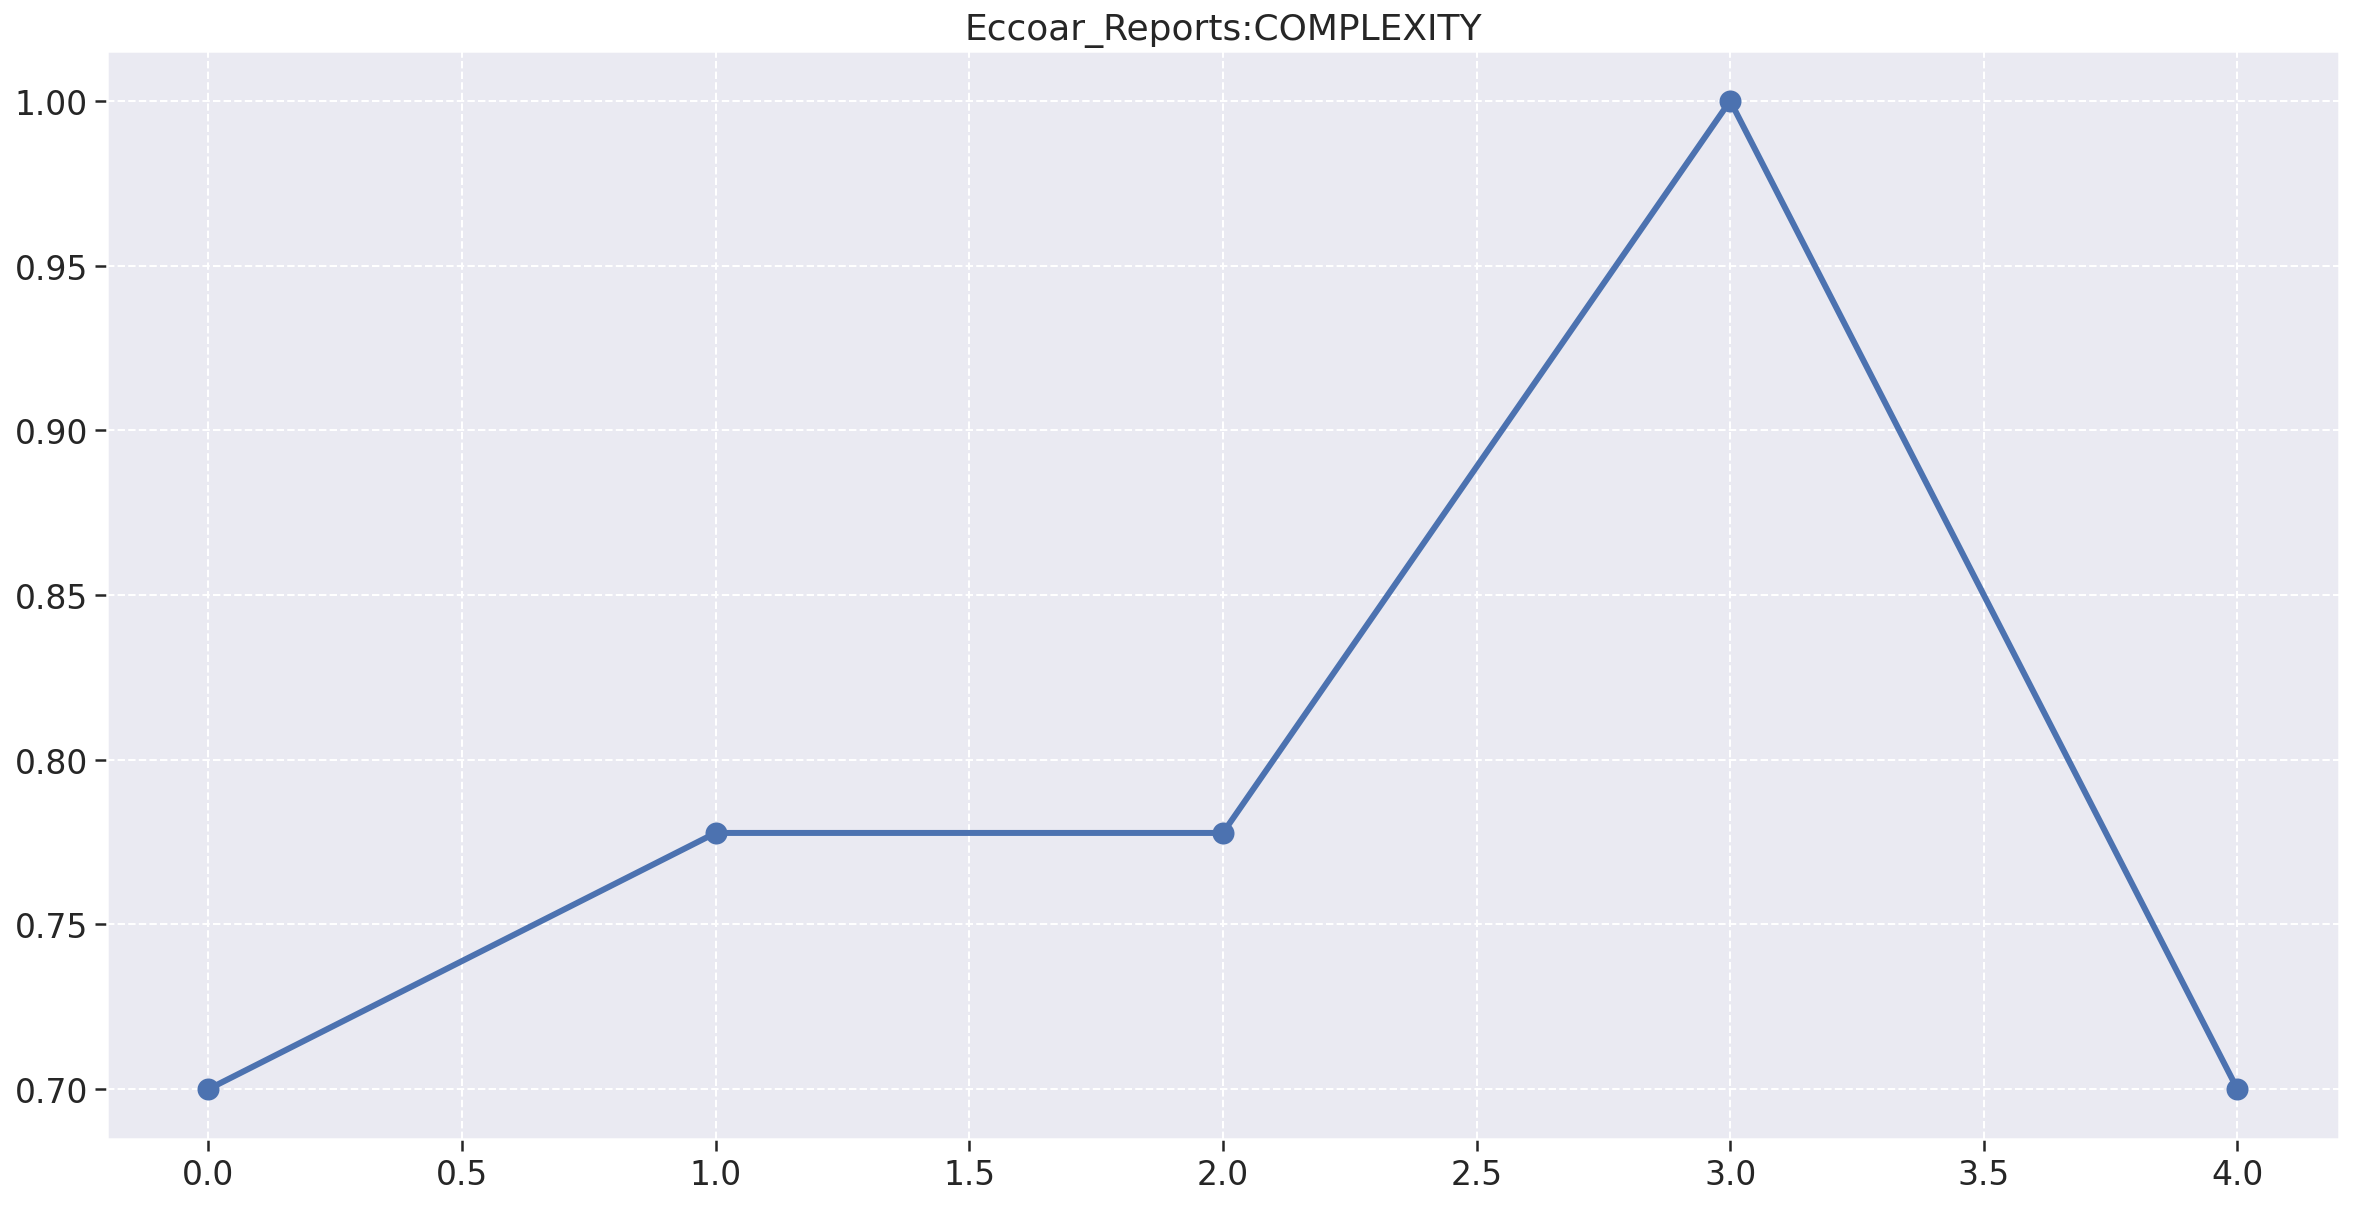

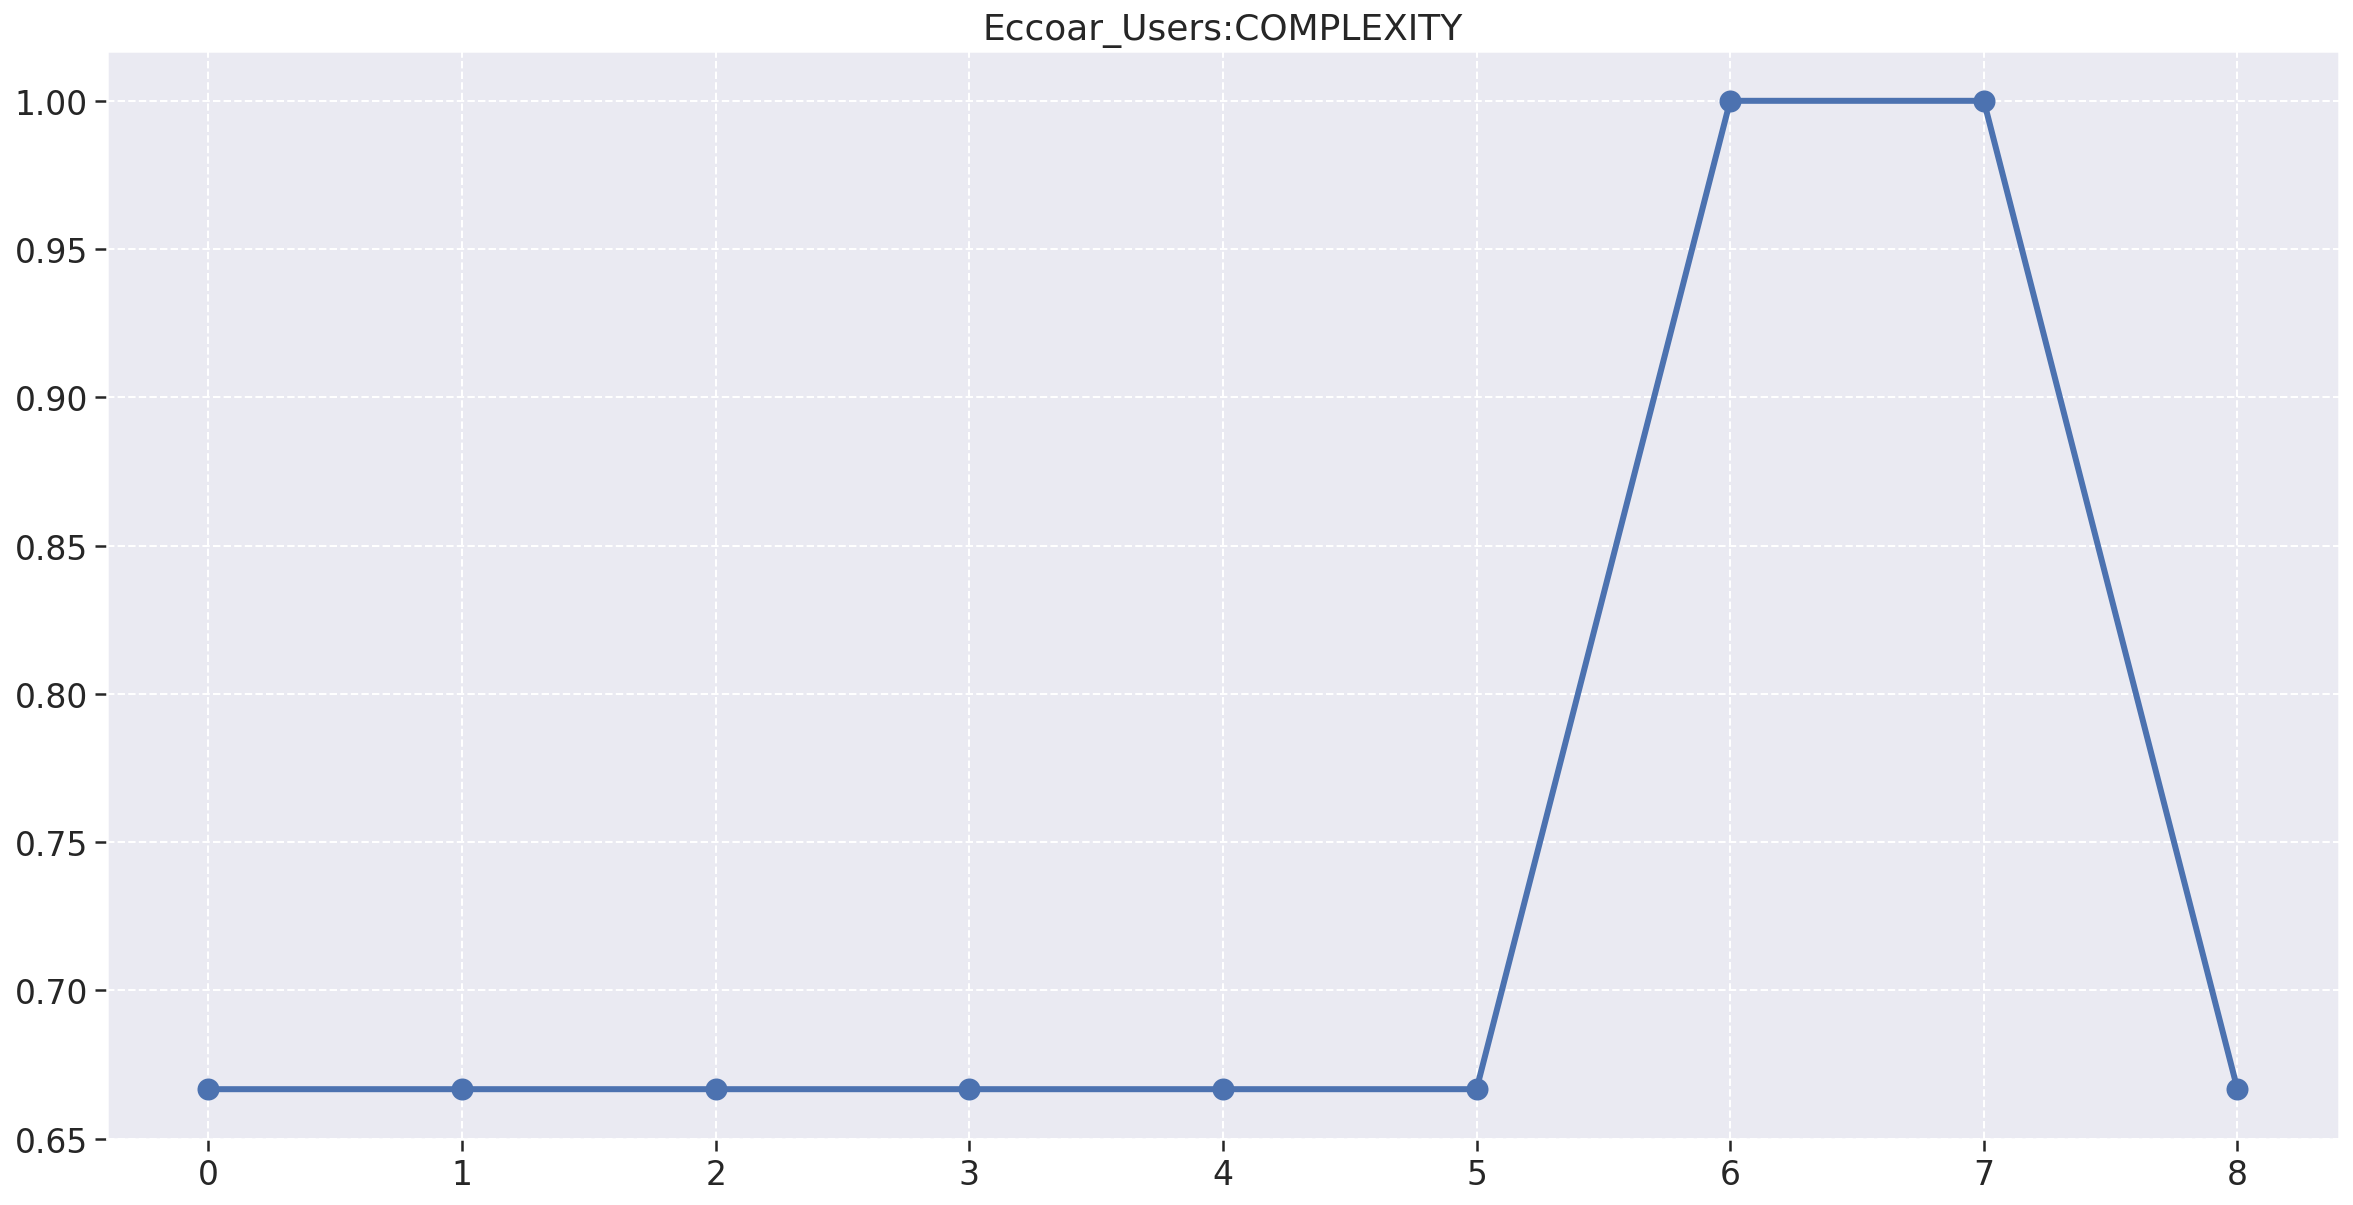

In [67]:

for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)

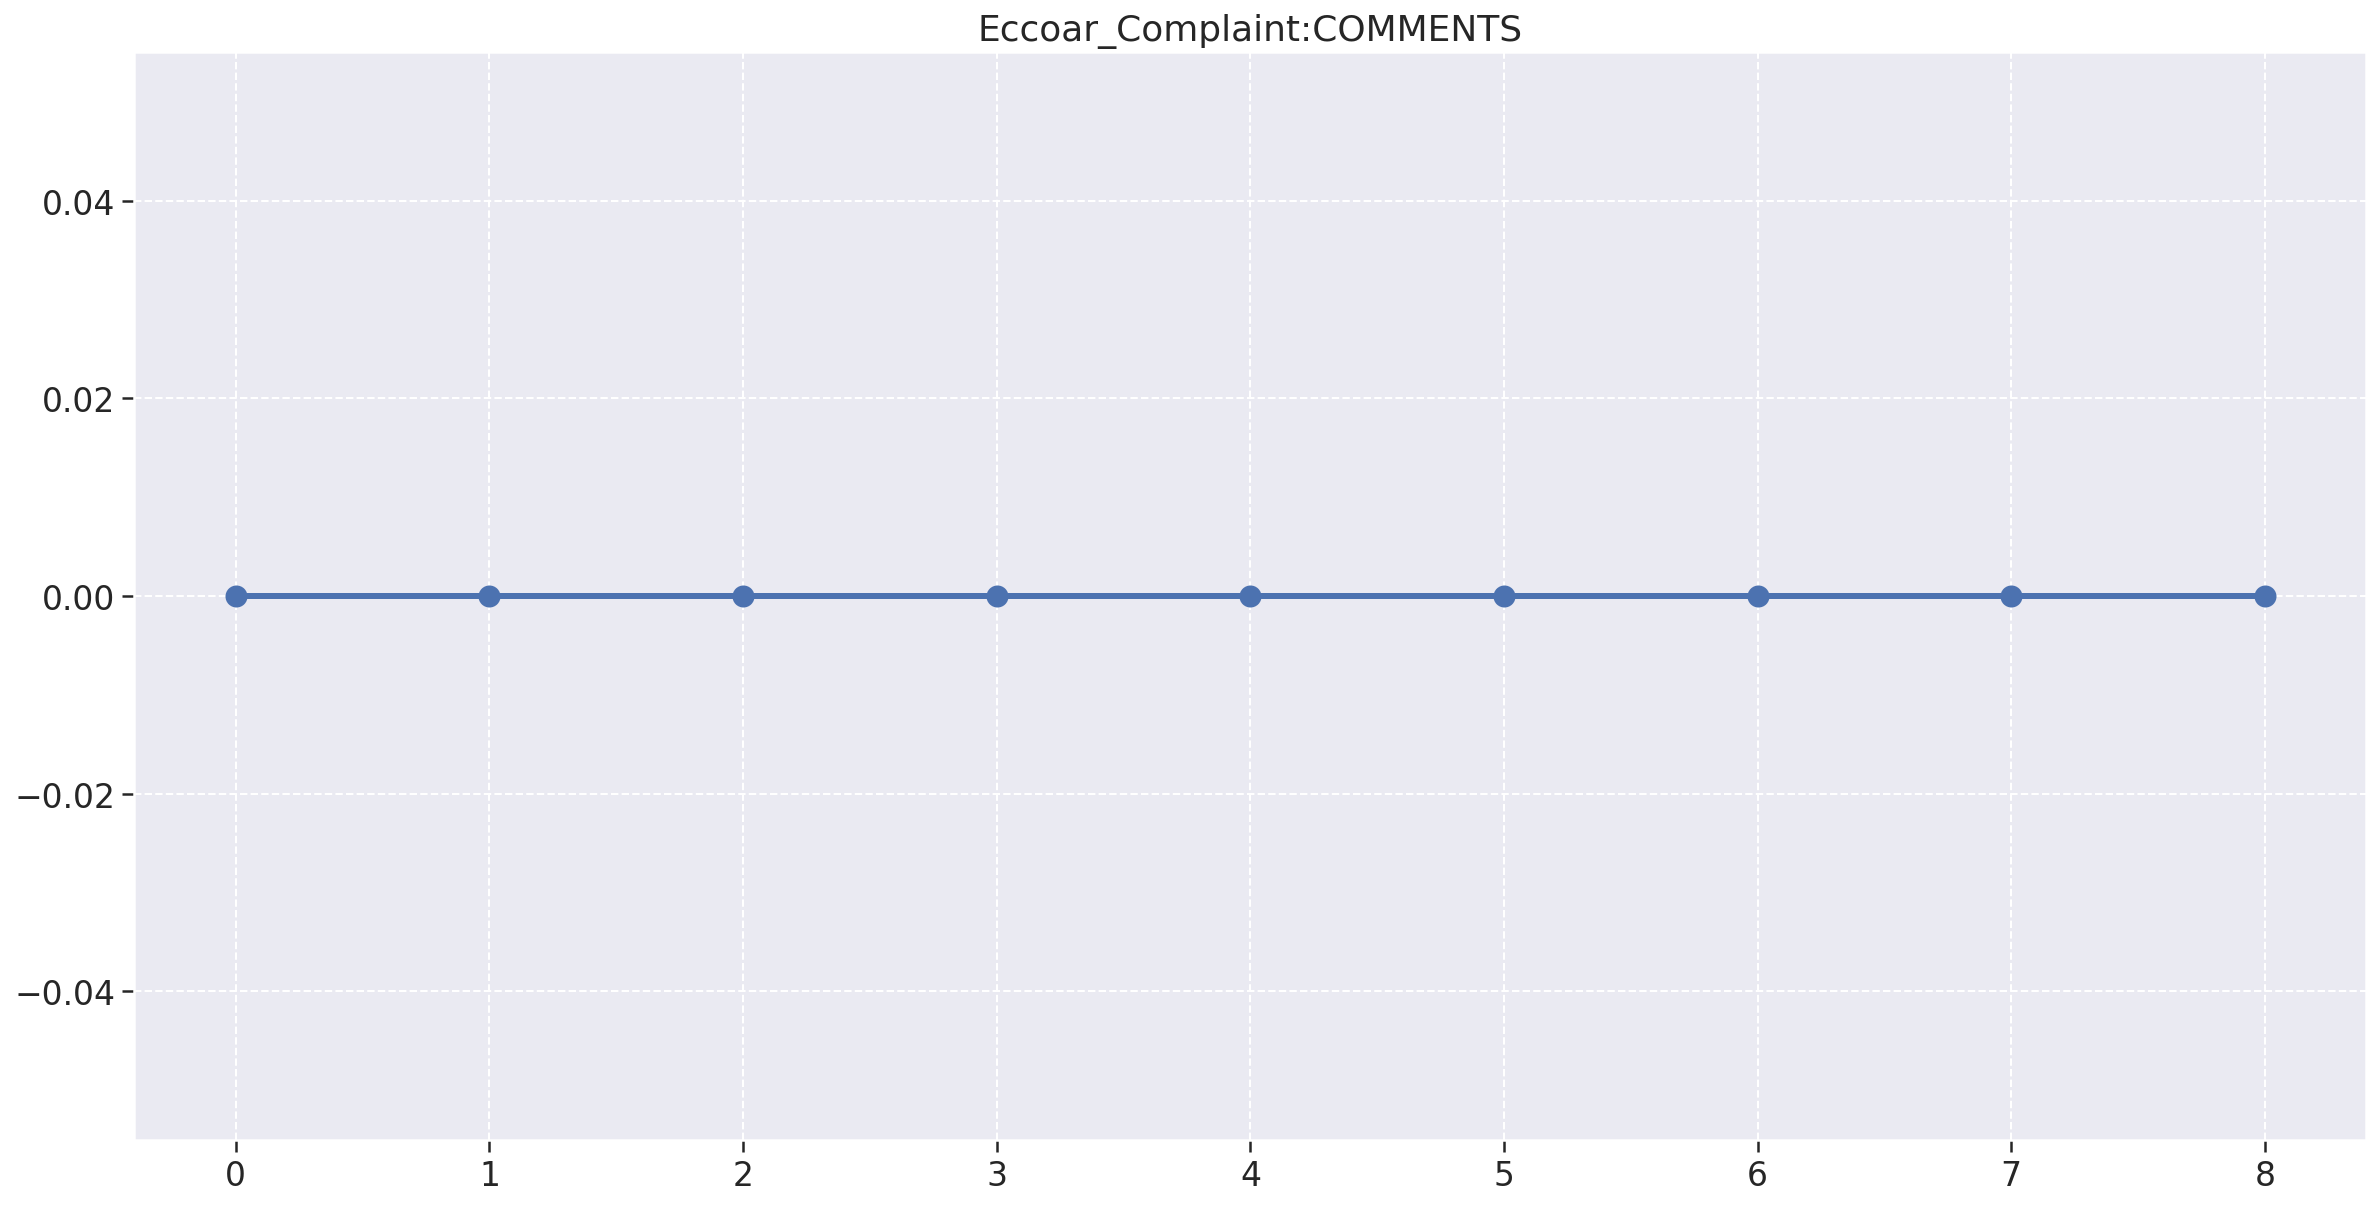

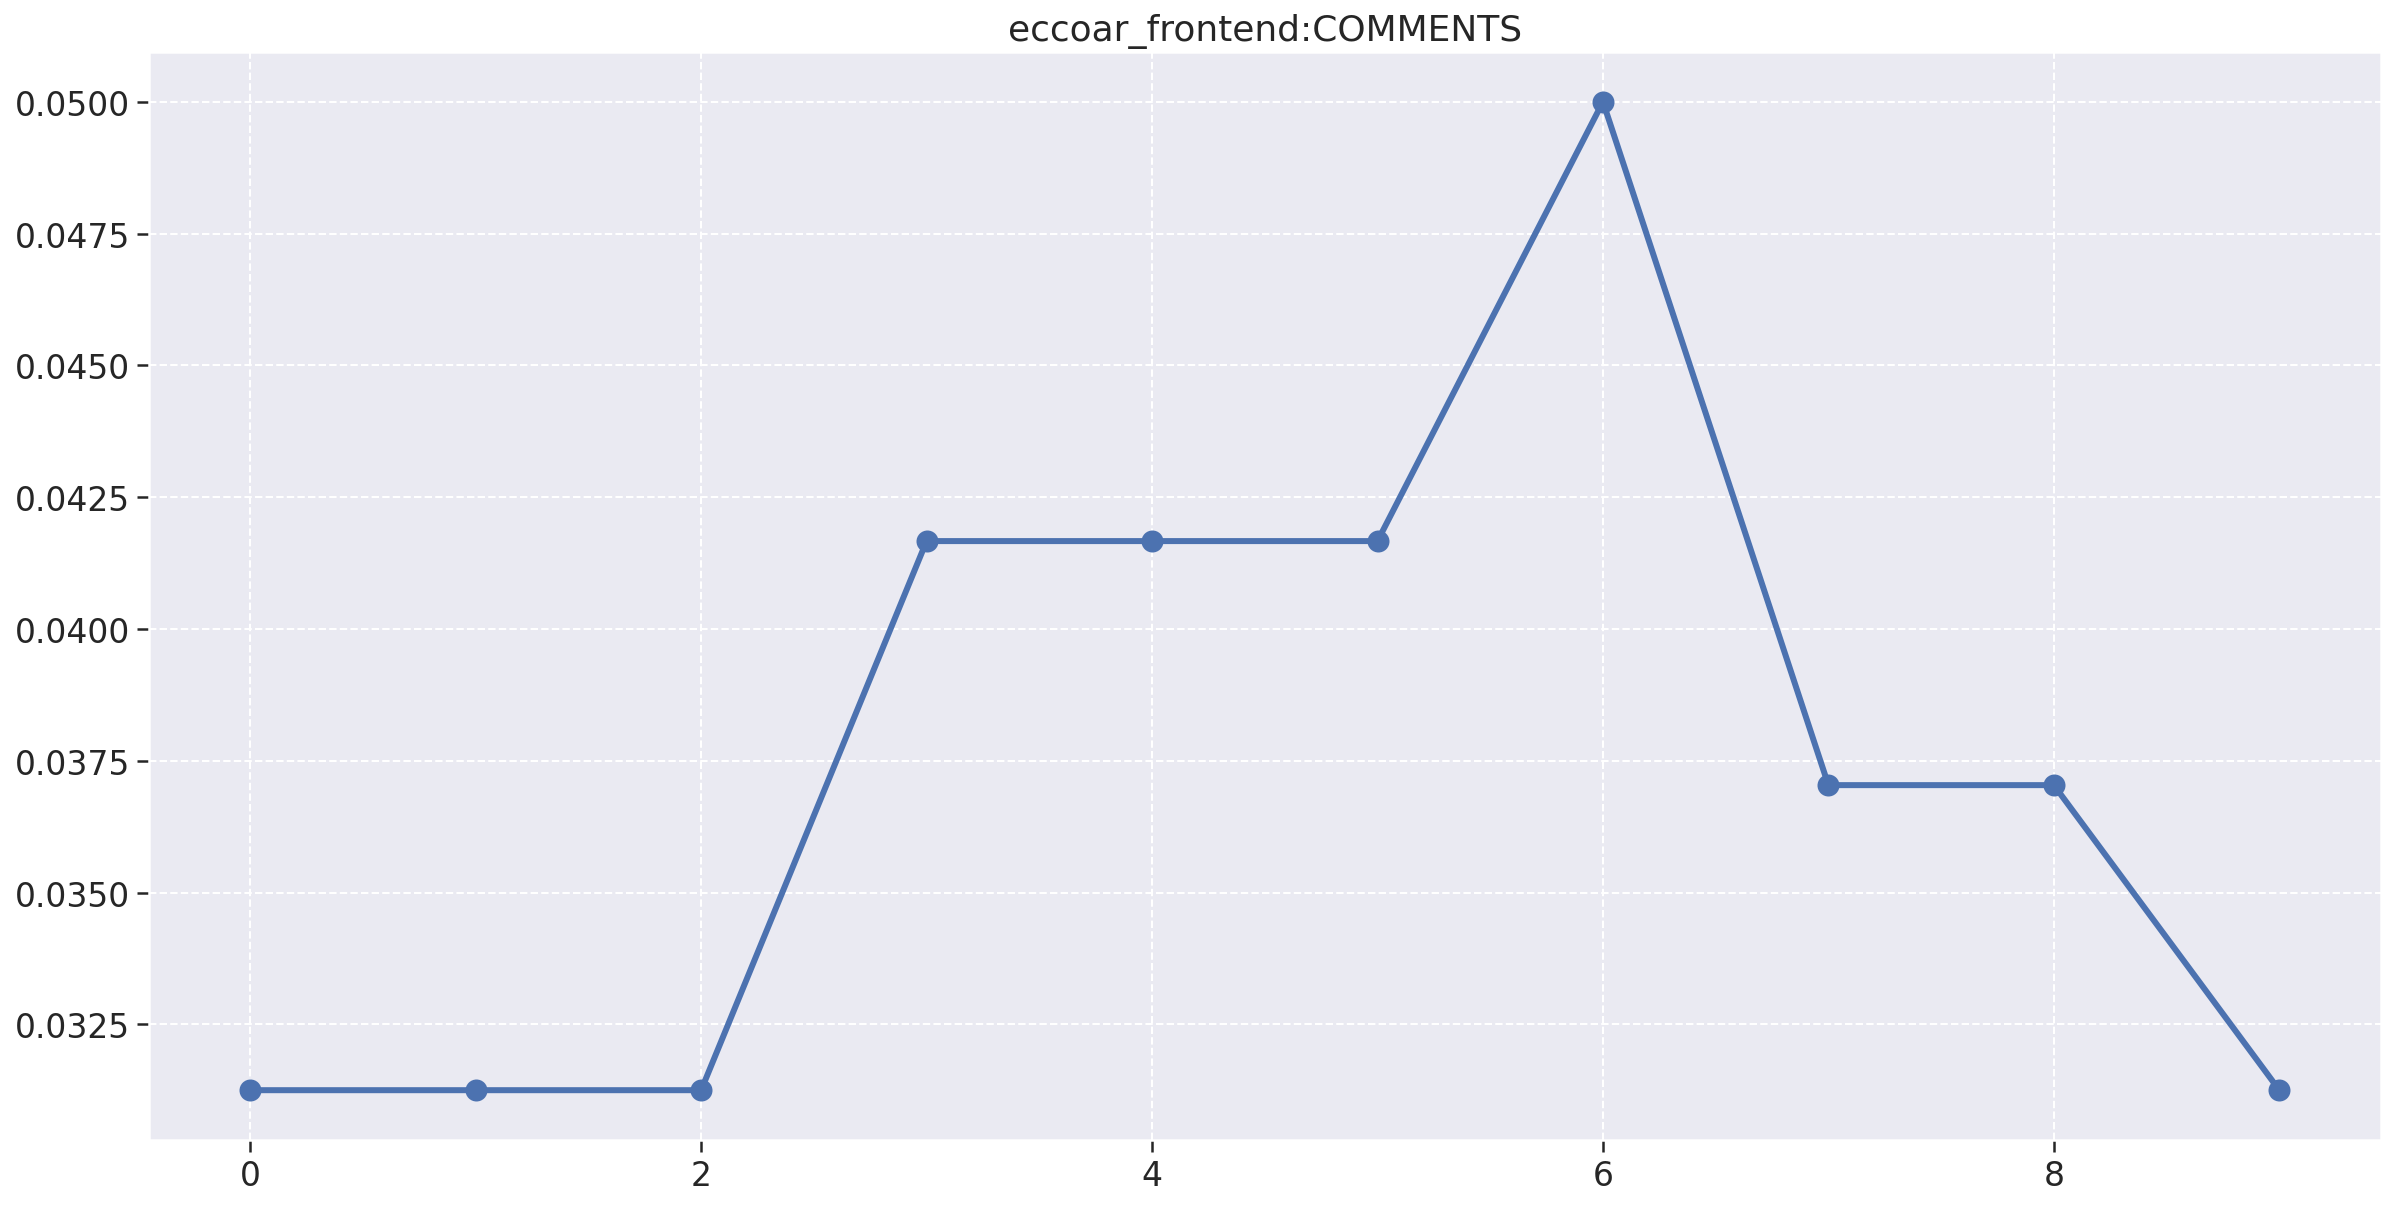

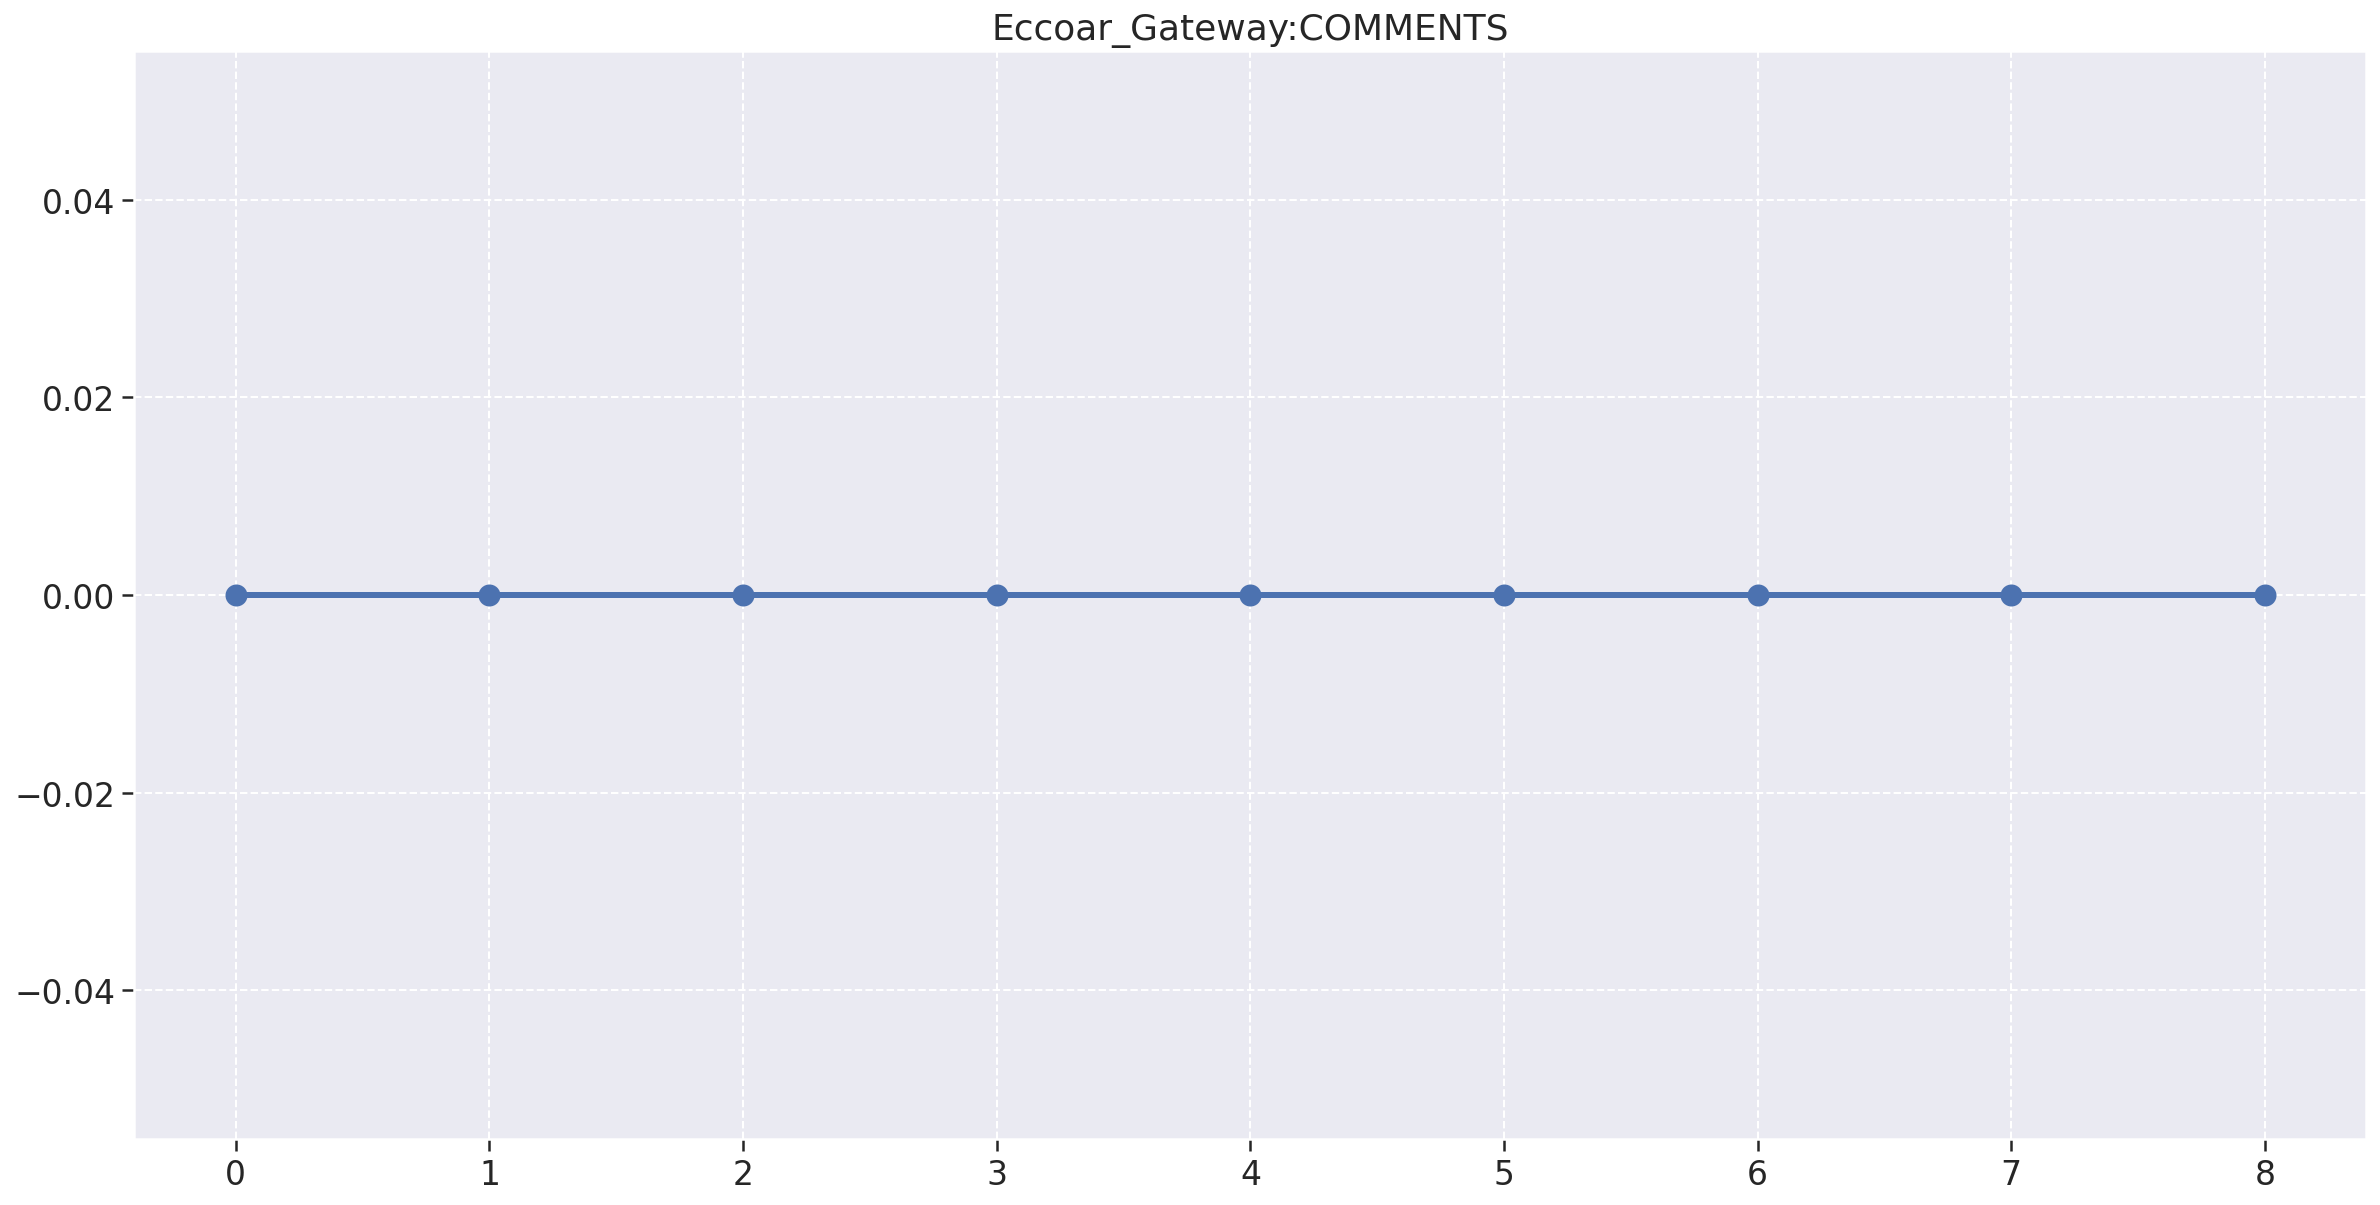

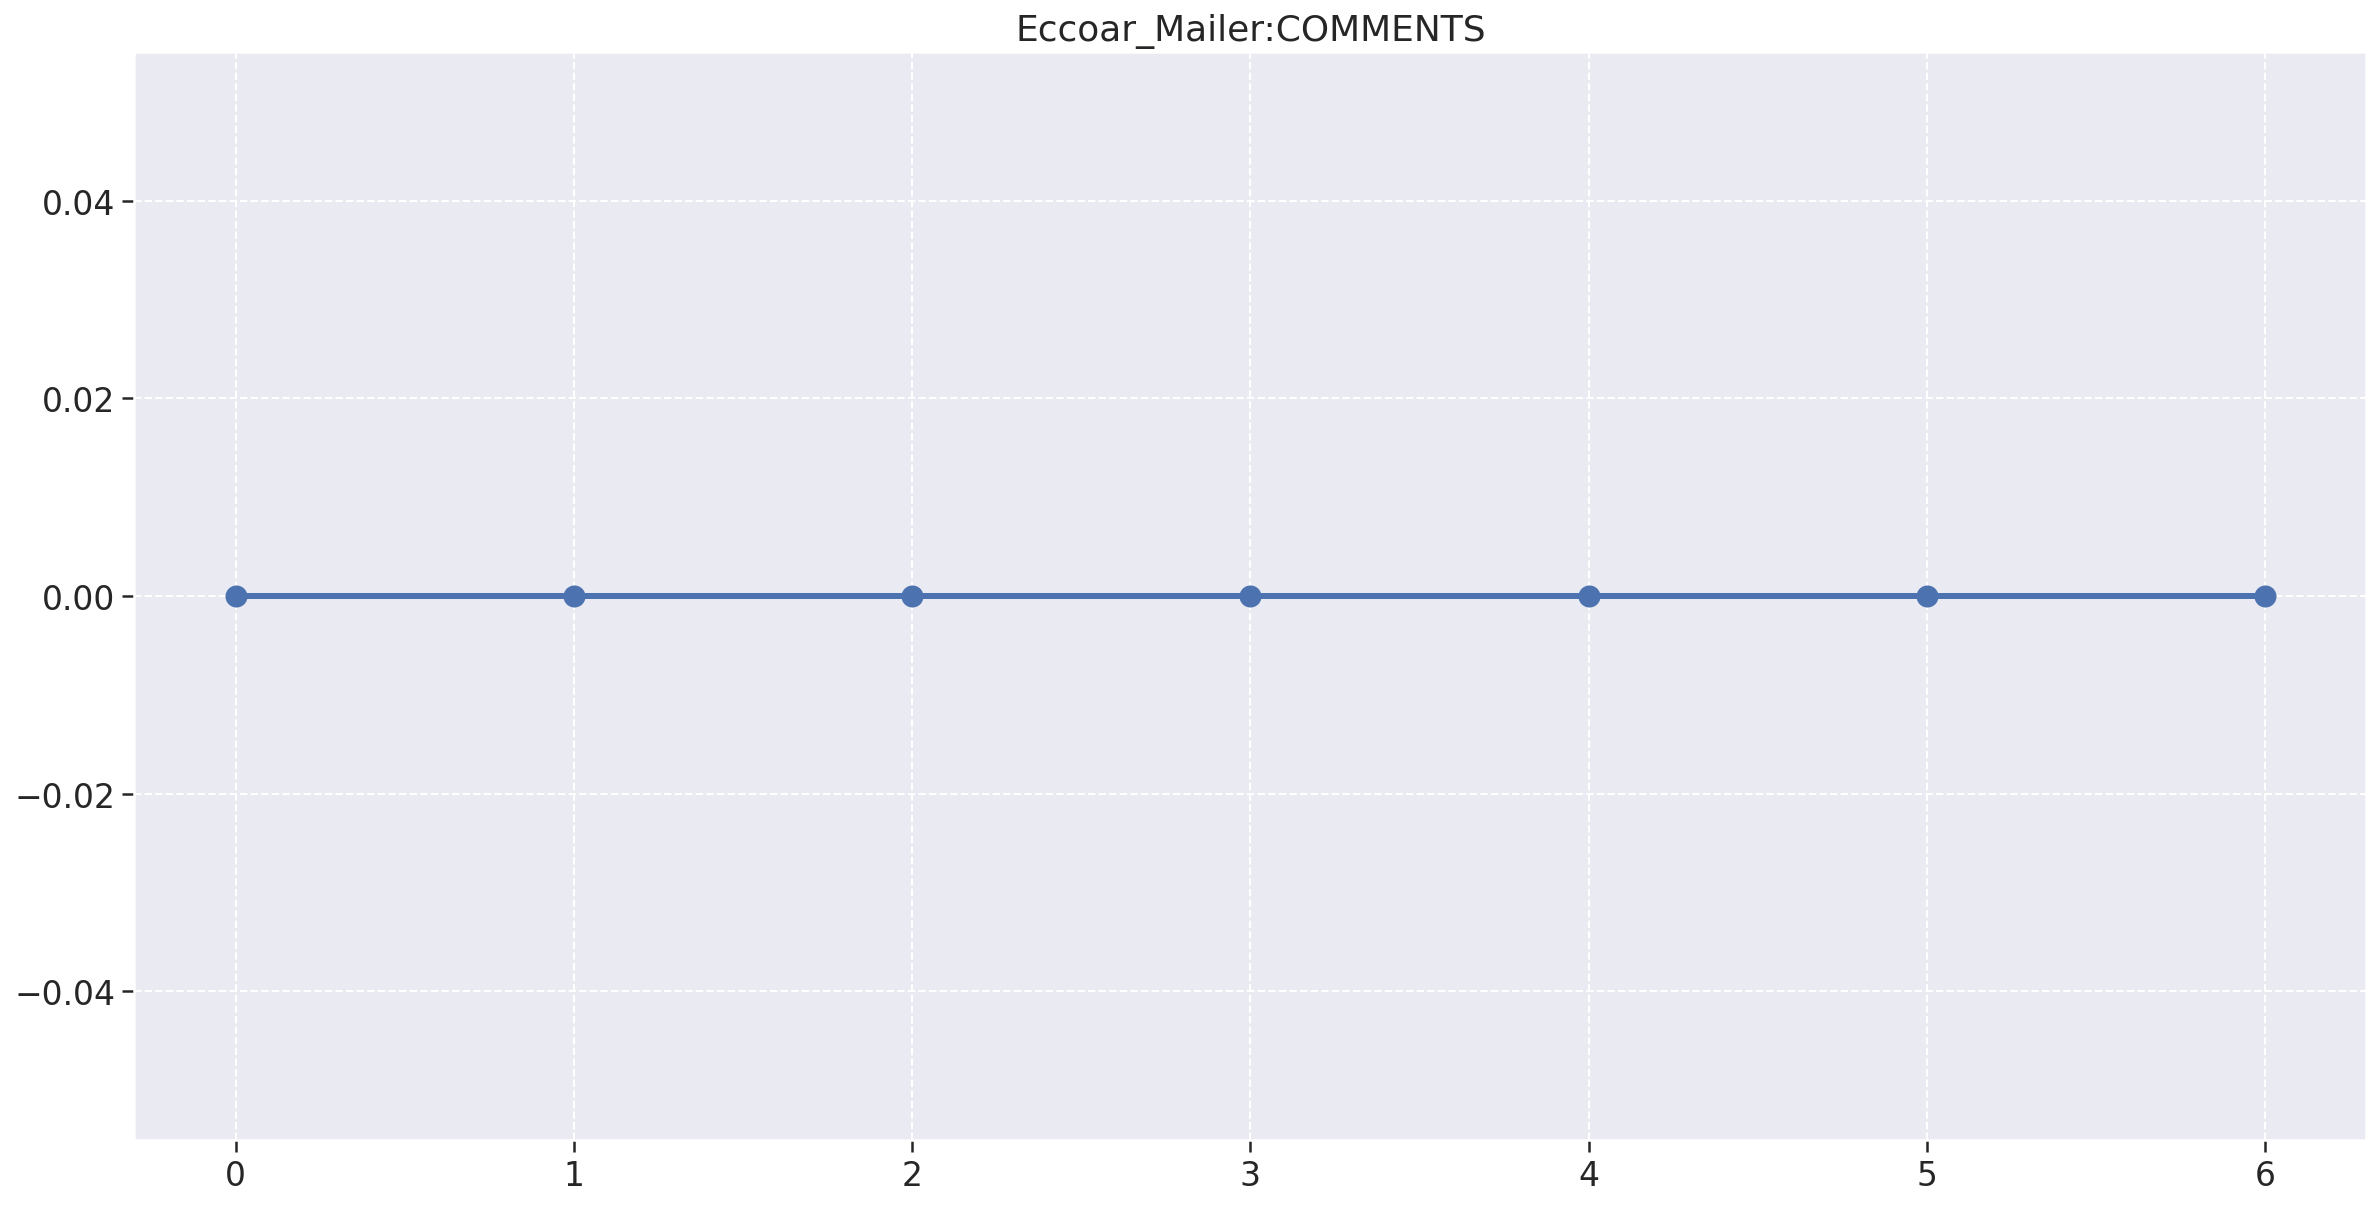

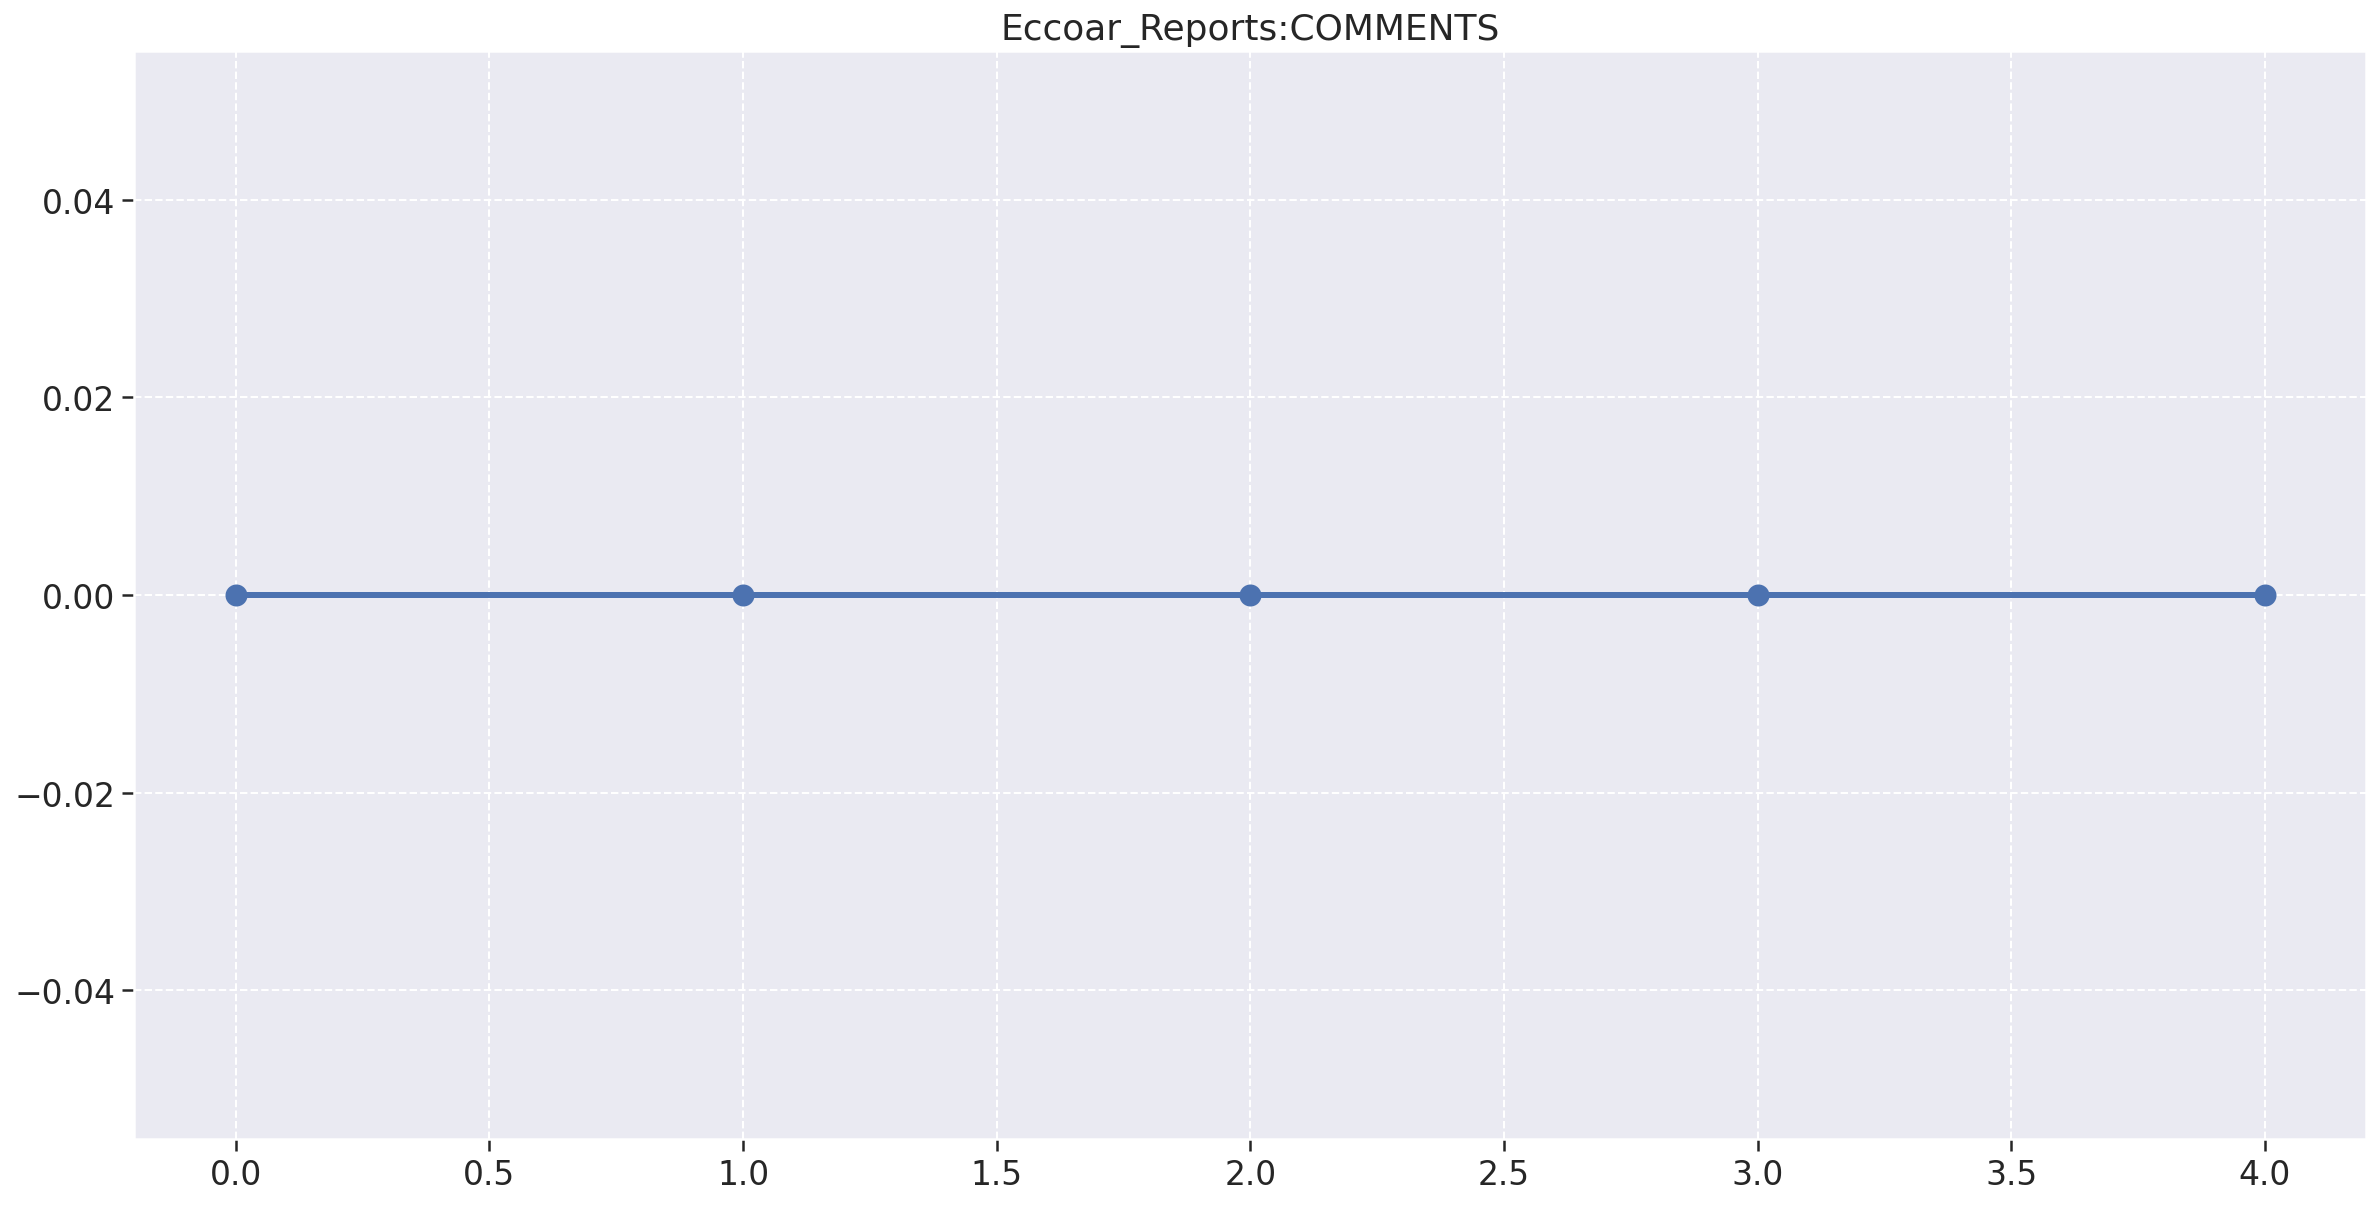

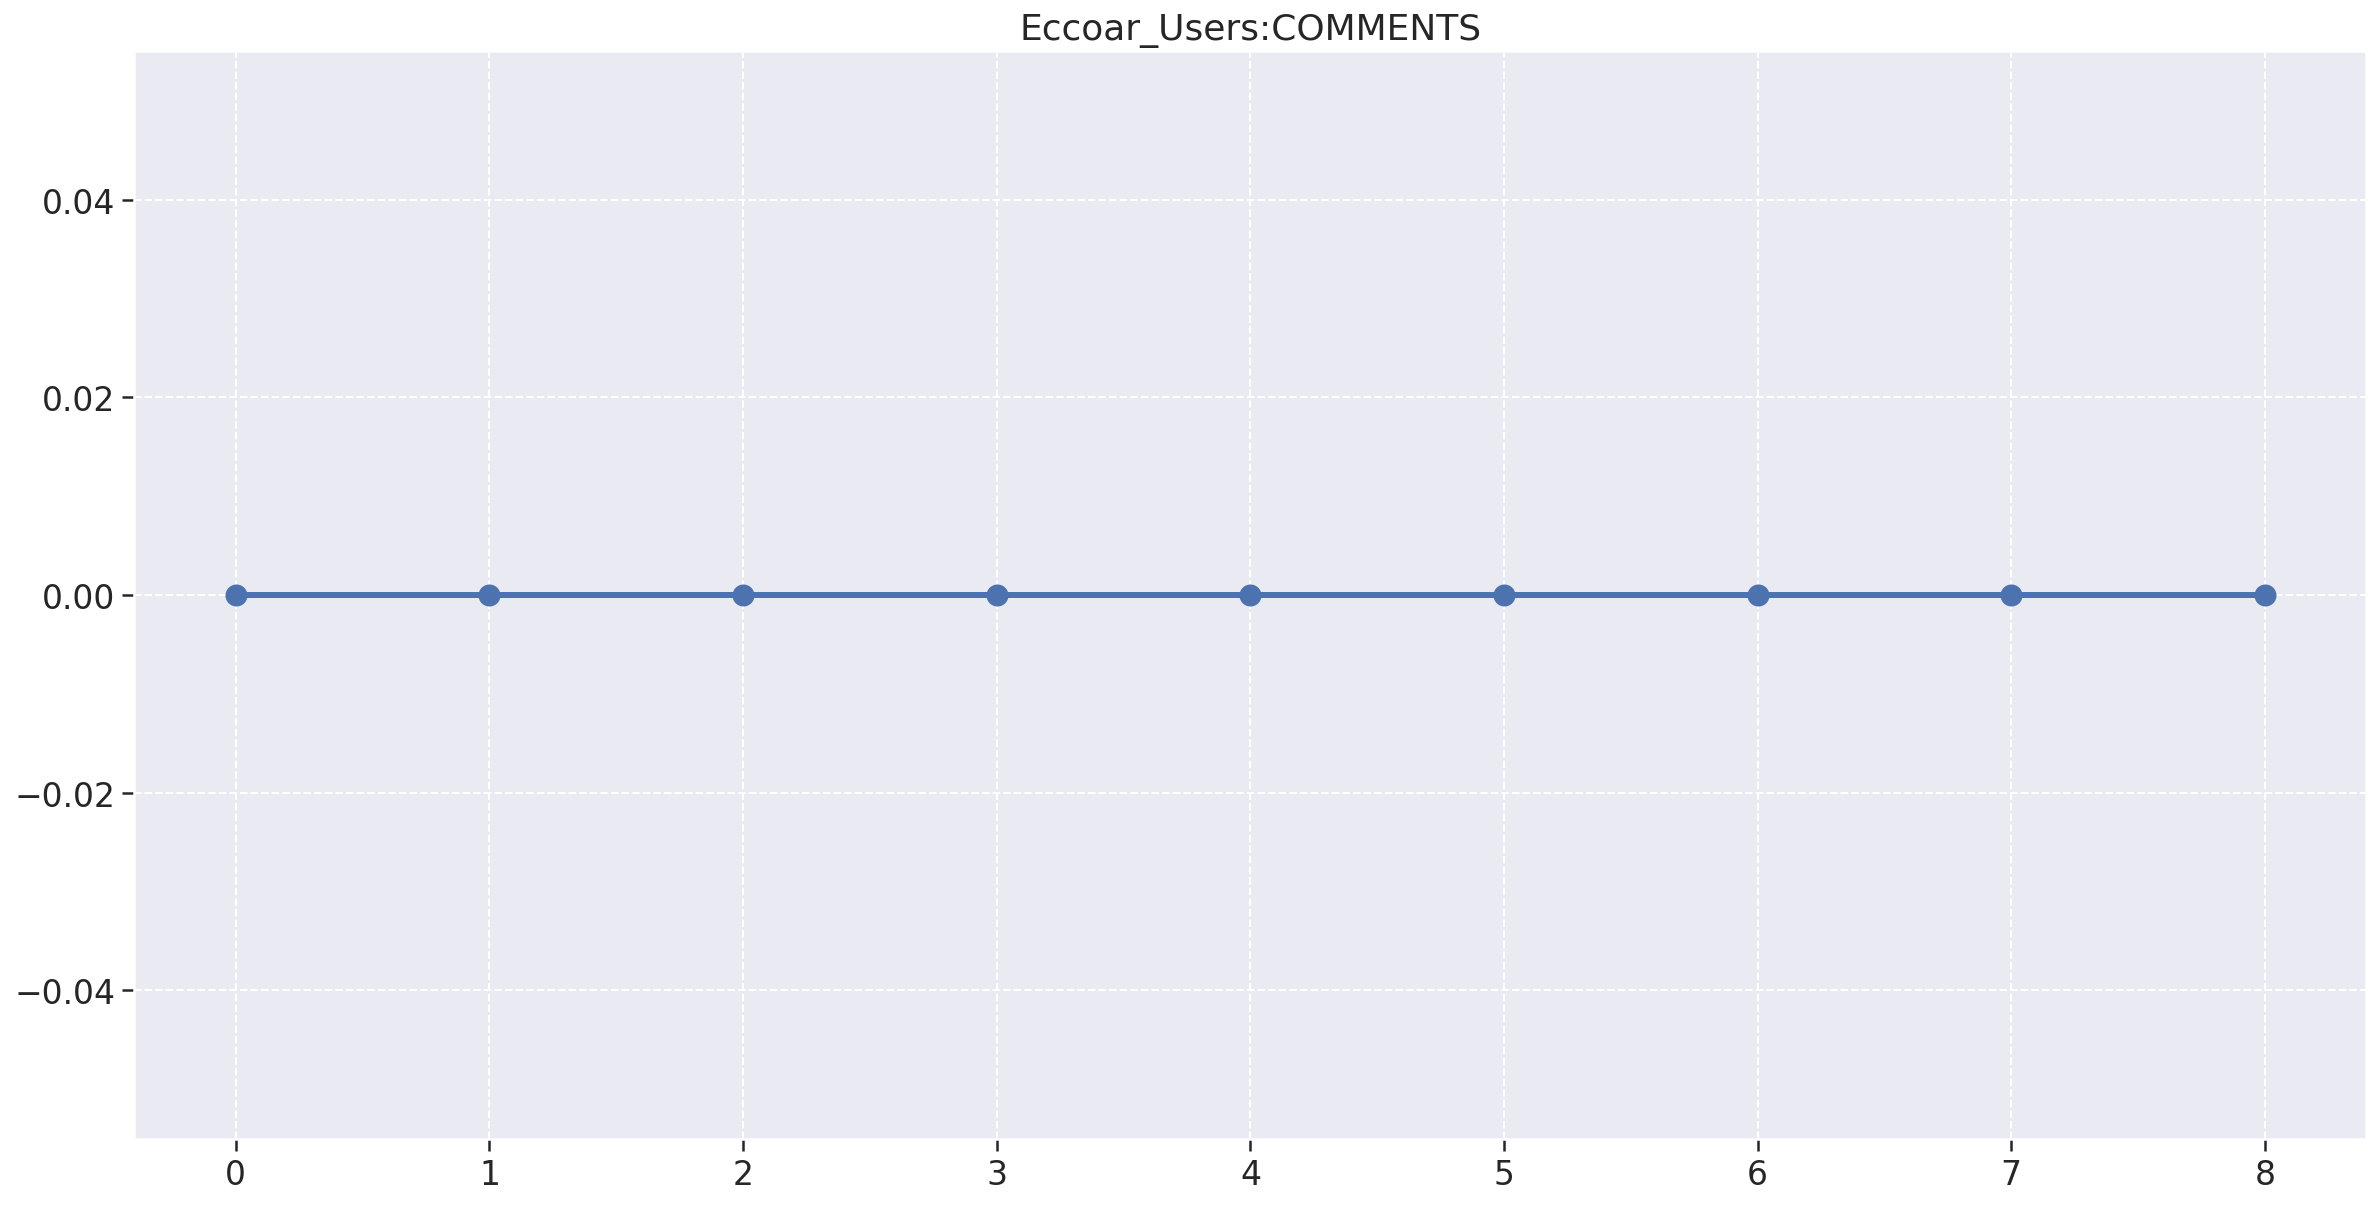

In [69]:

for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMMENTS")
    plt.plot(metrics_df['m2'], linewidth=3, marker='o', markersize=10)

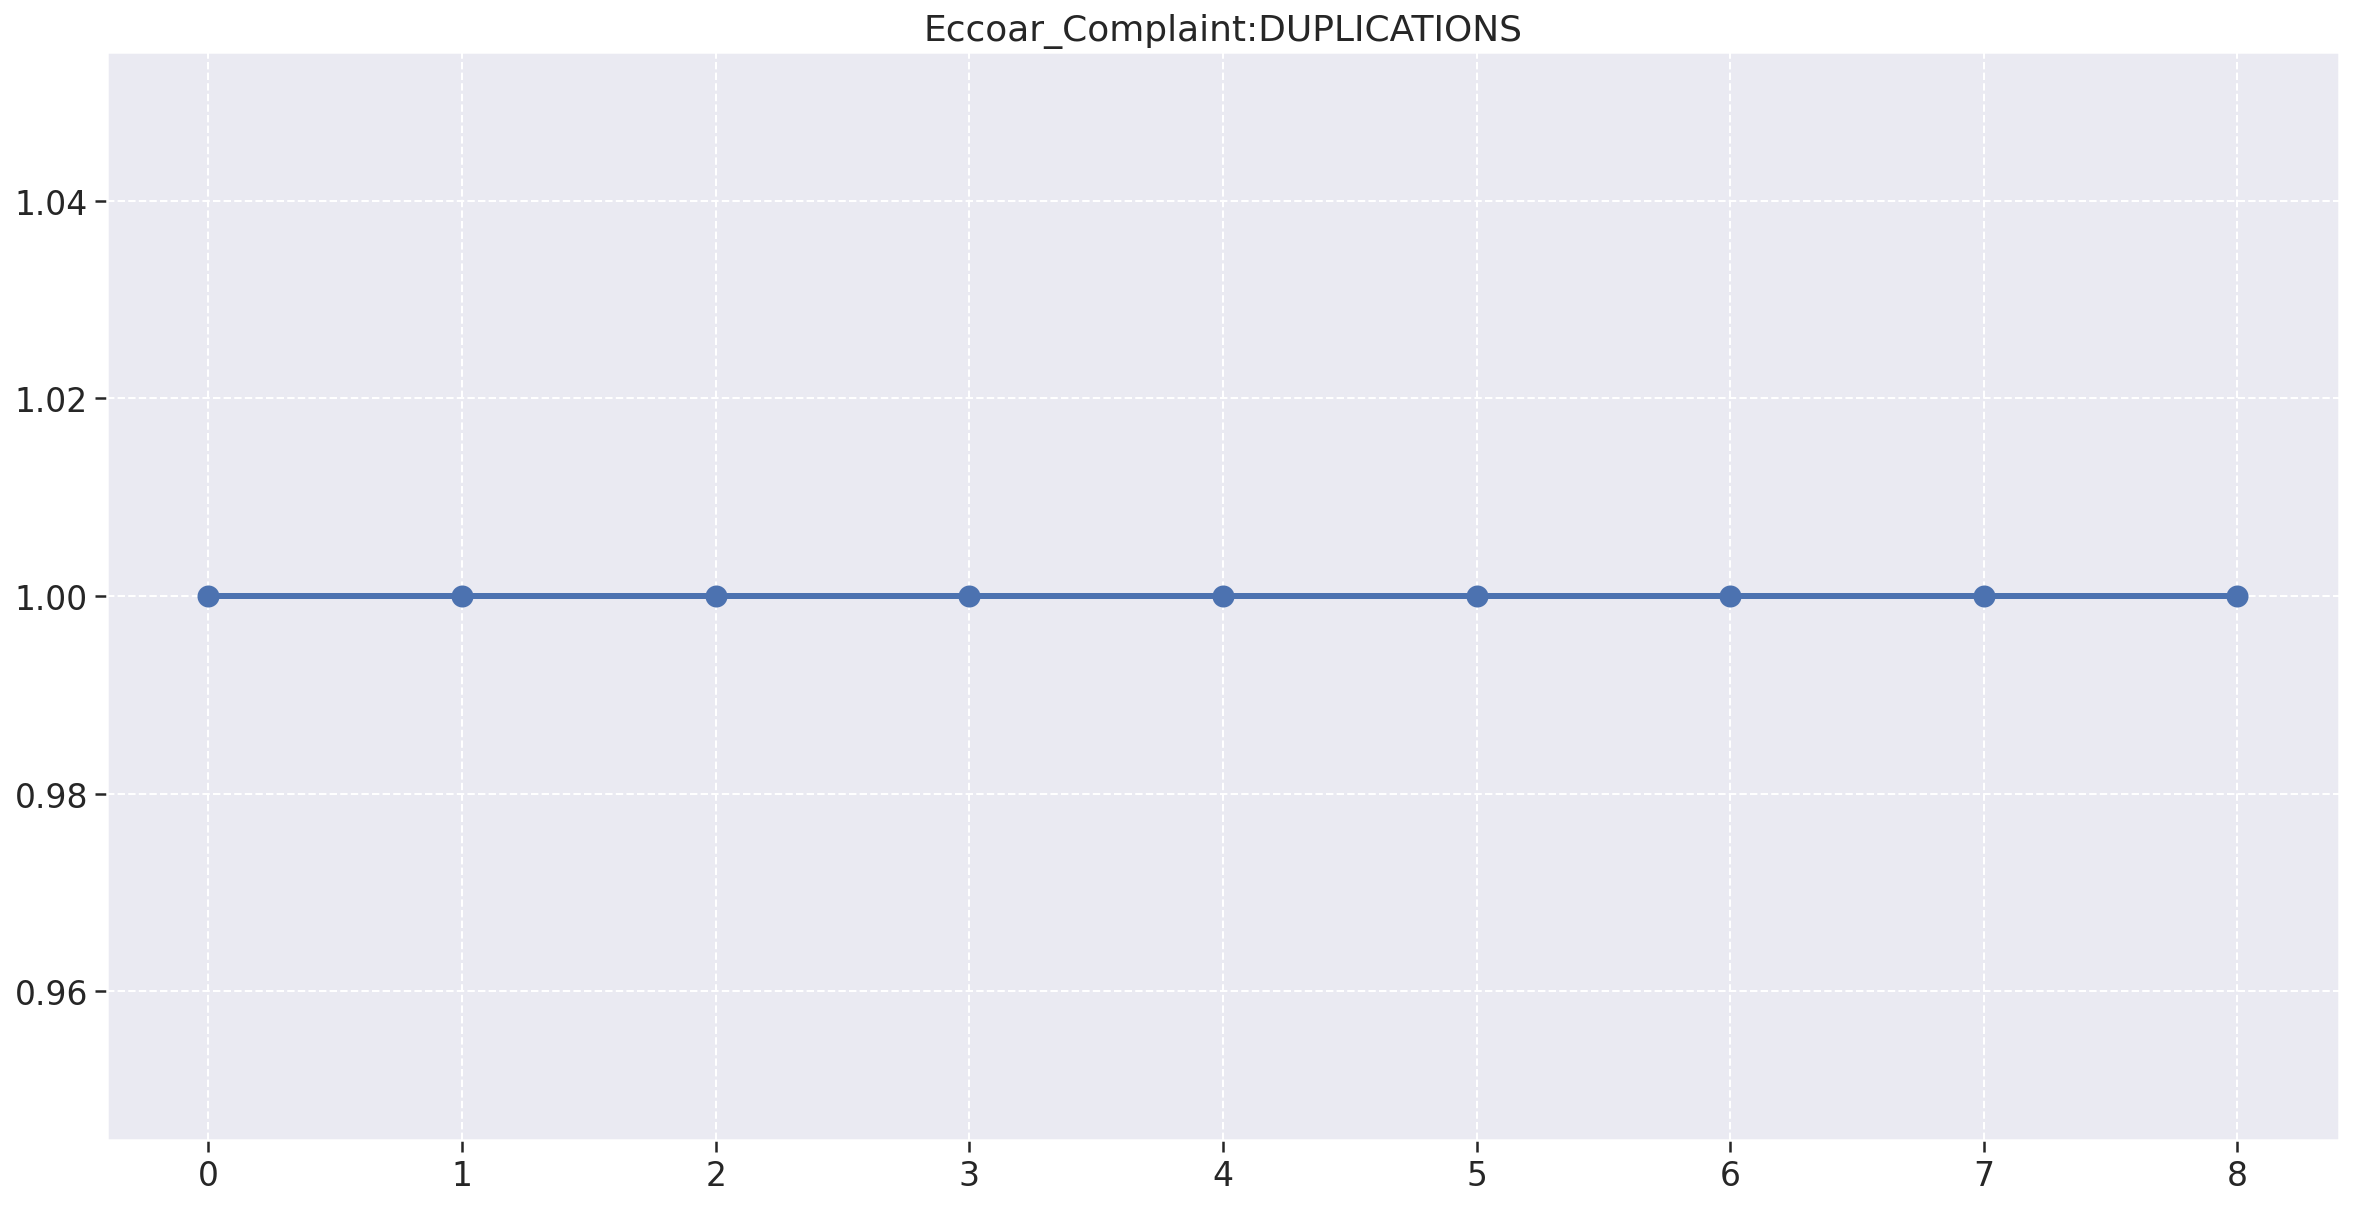

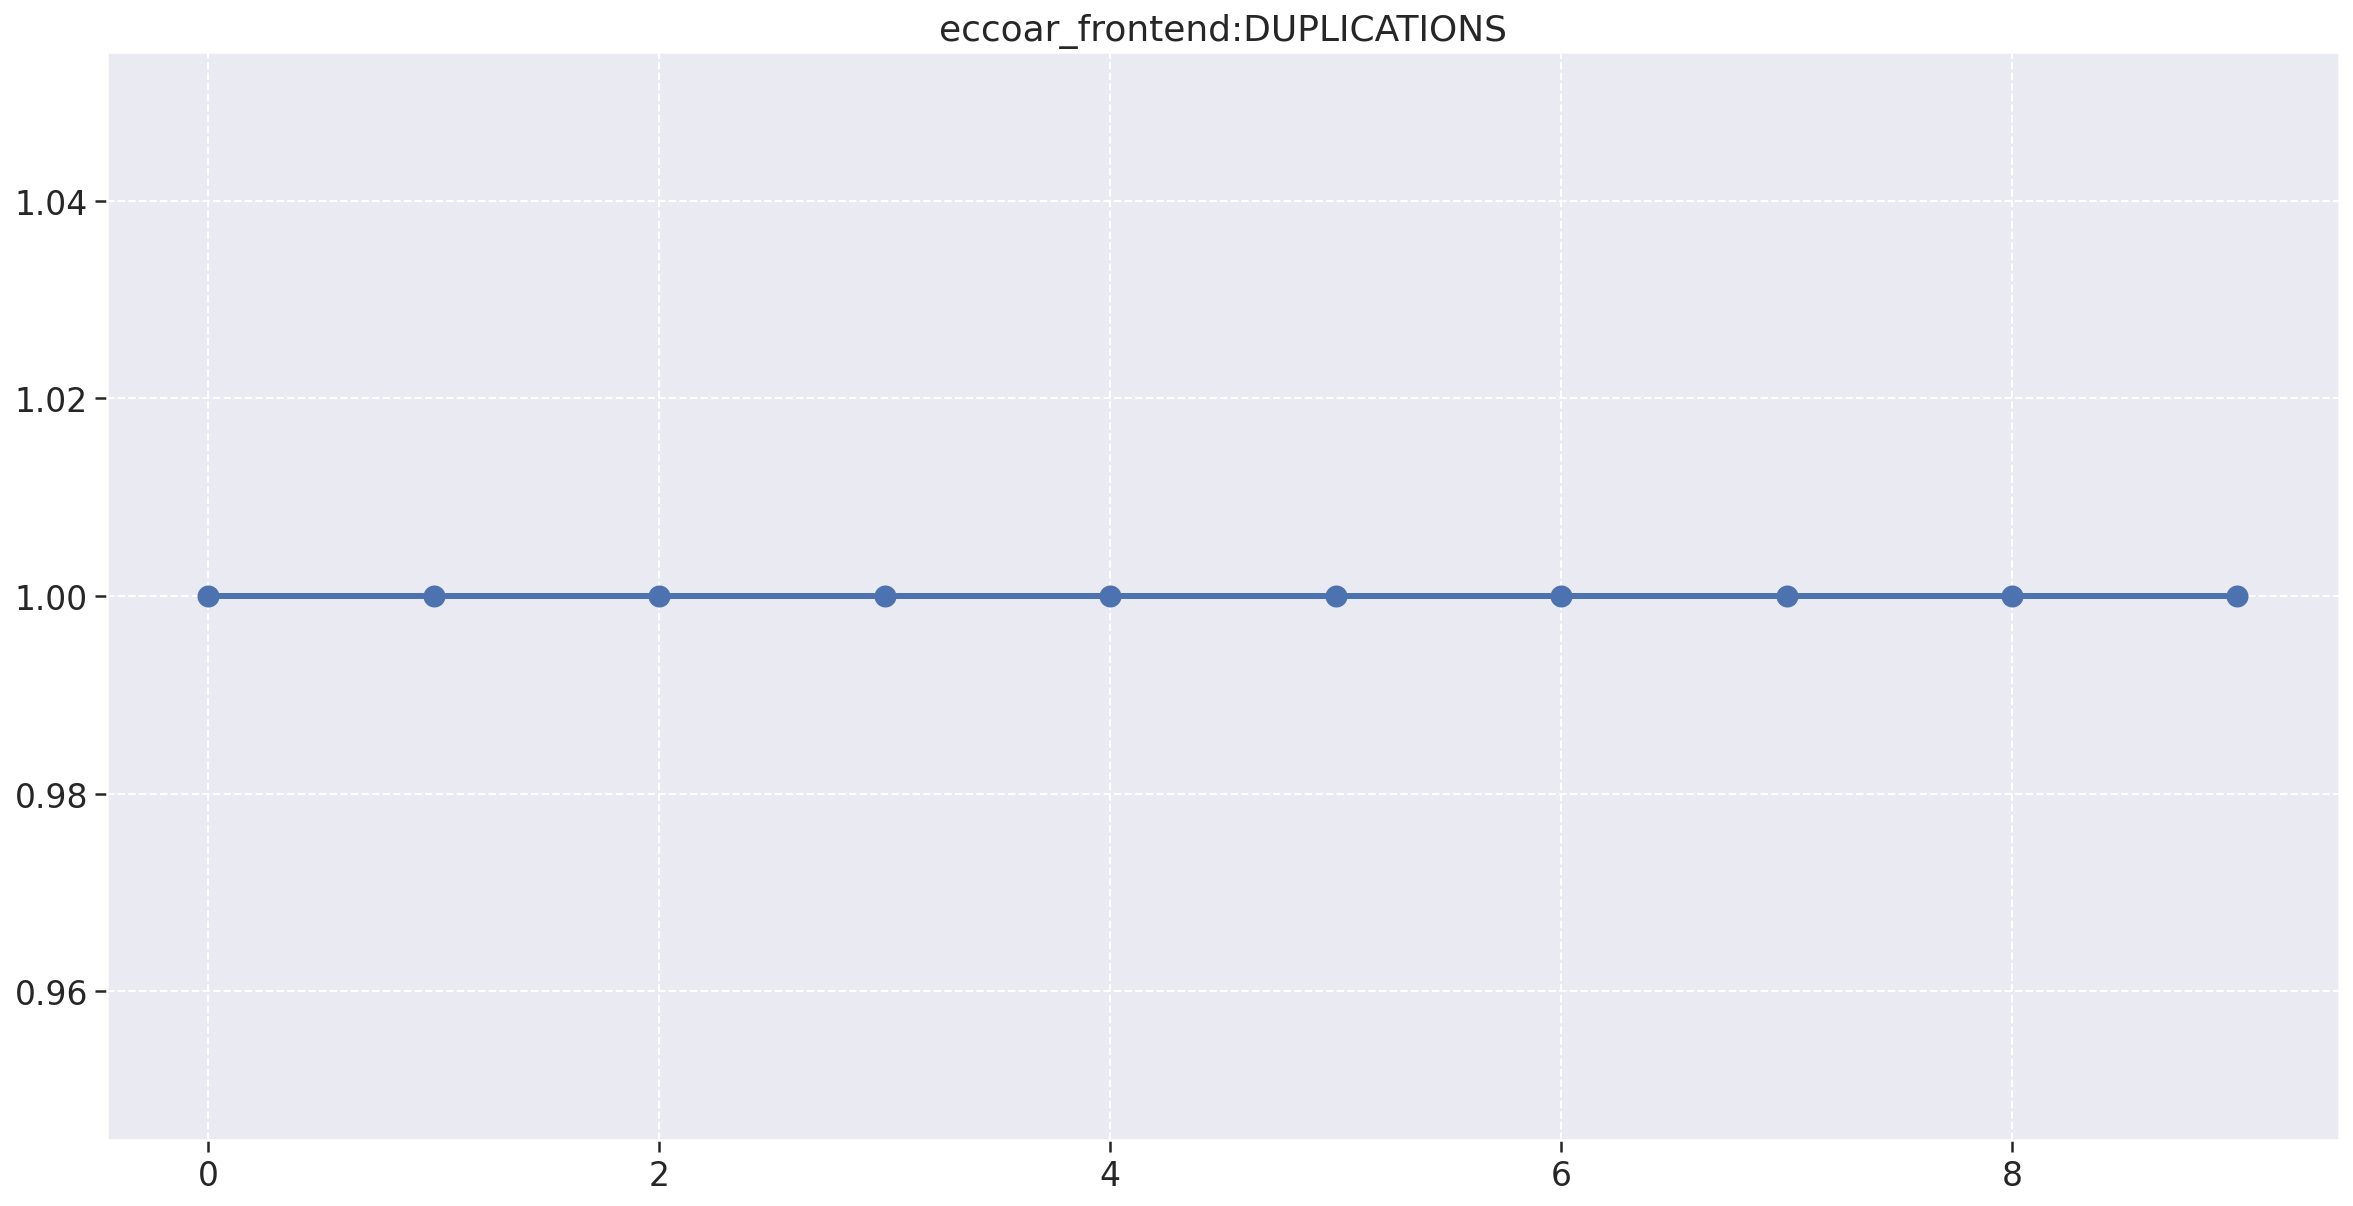

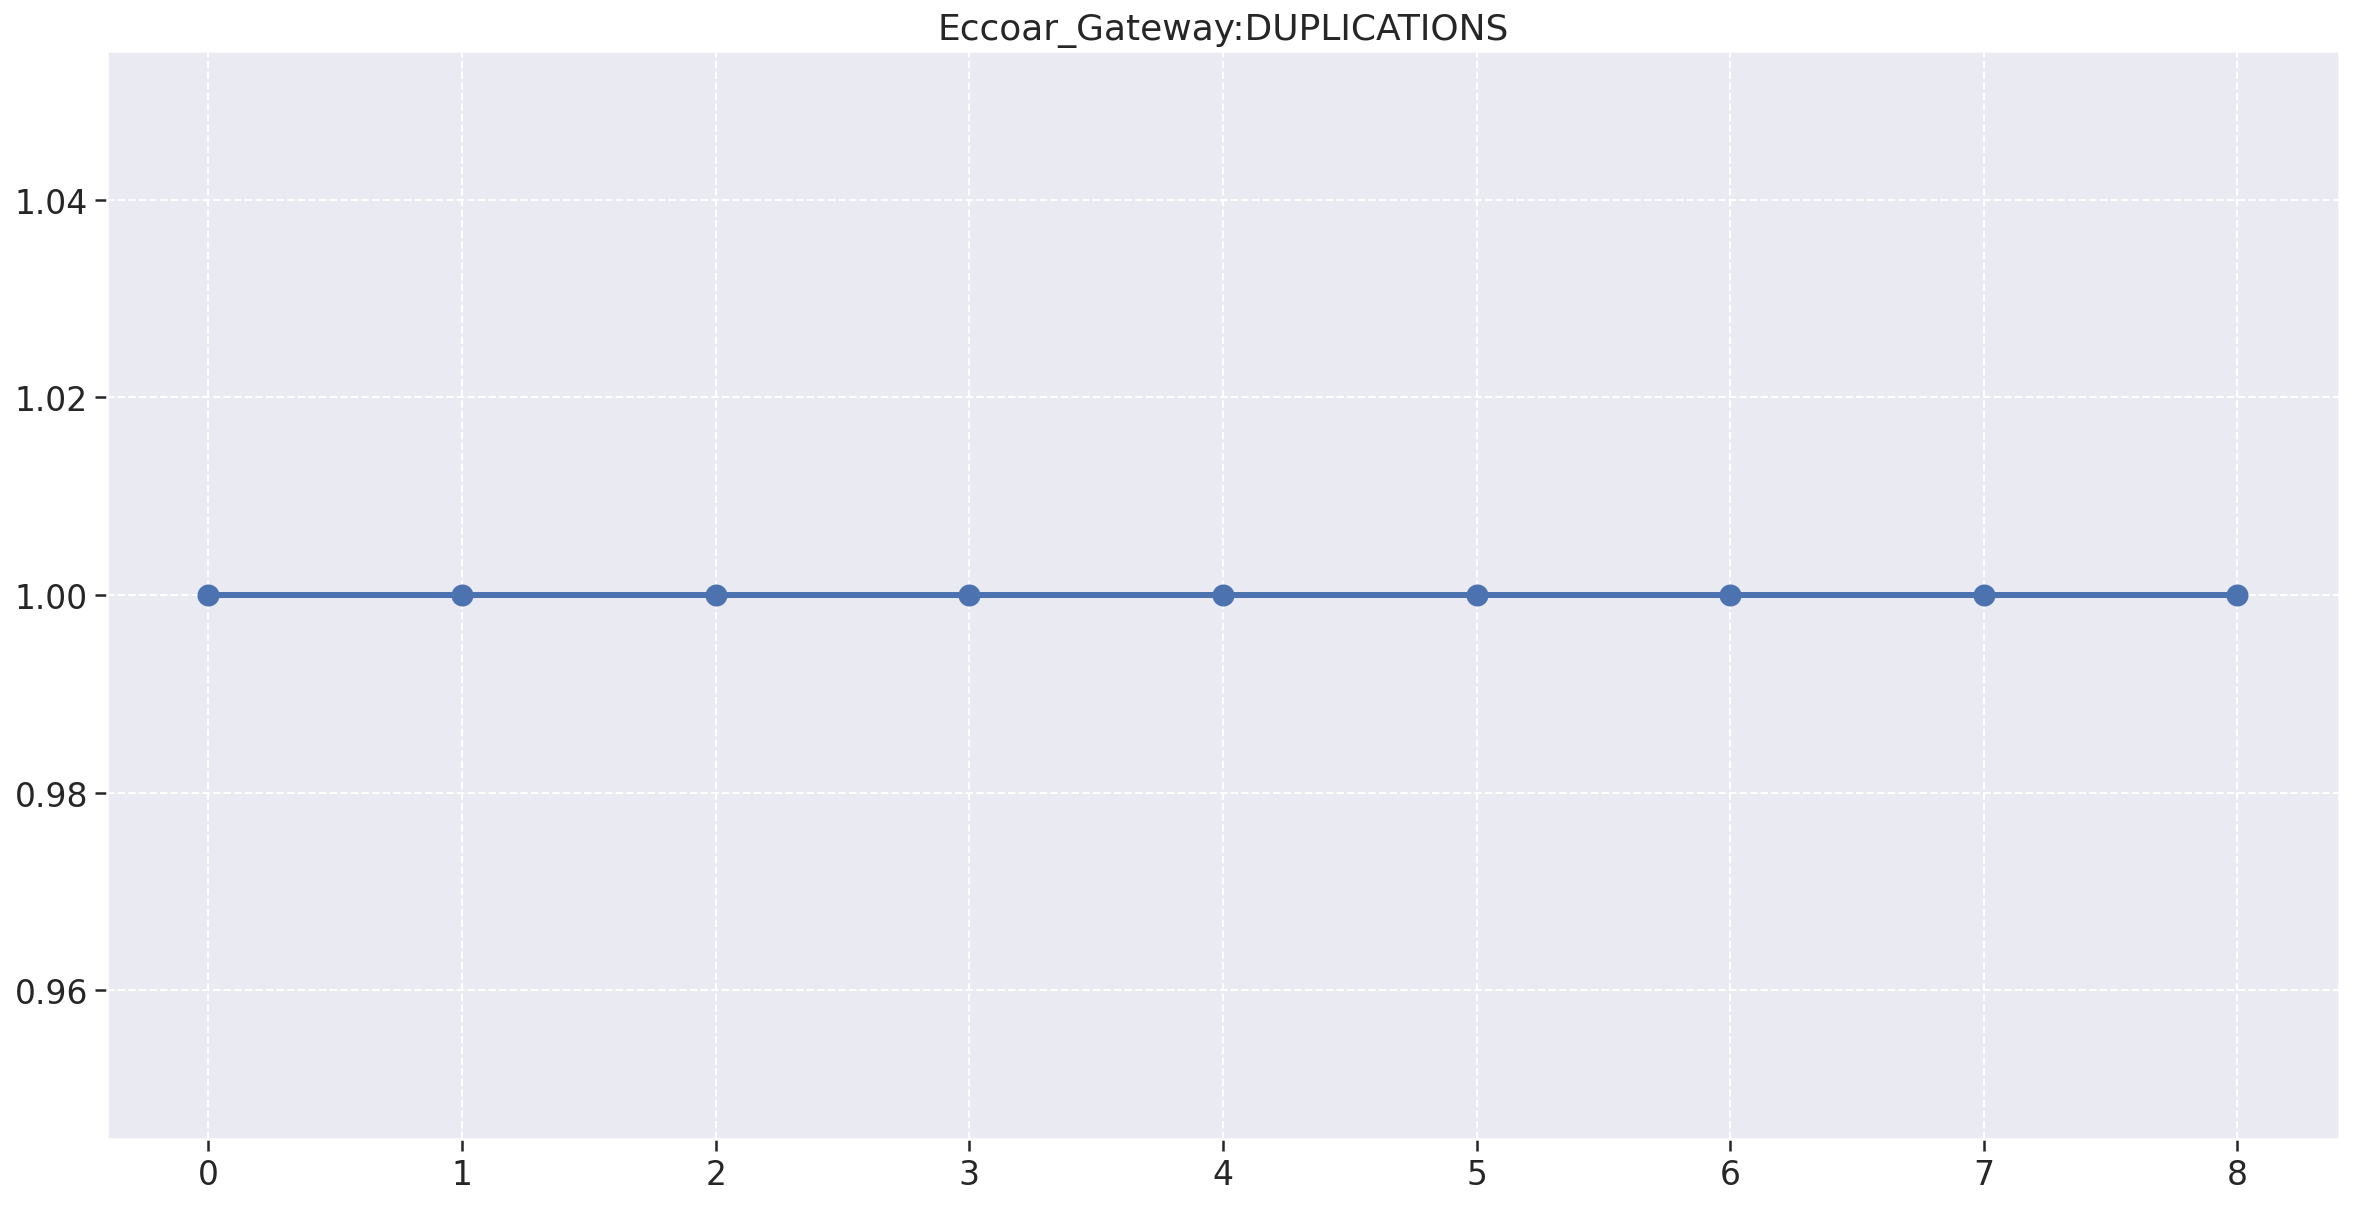

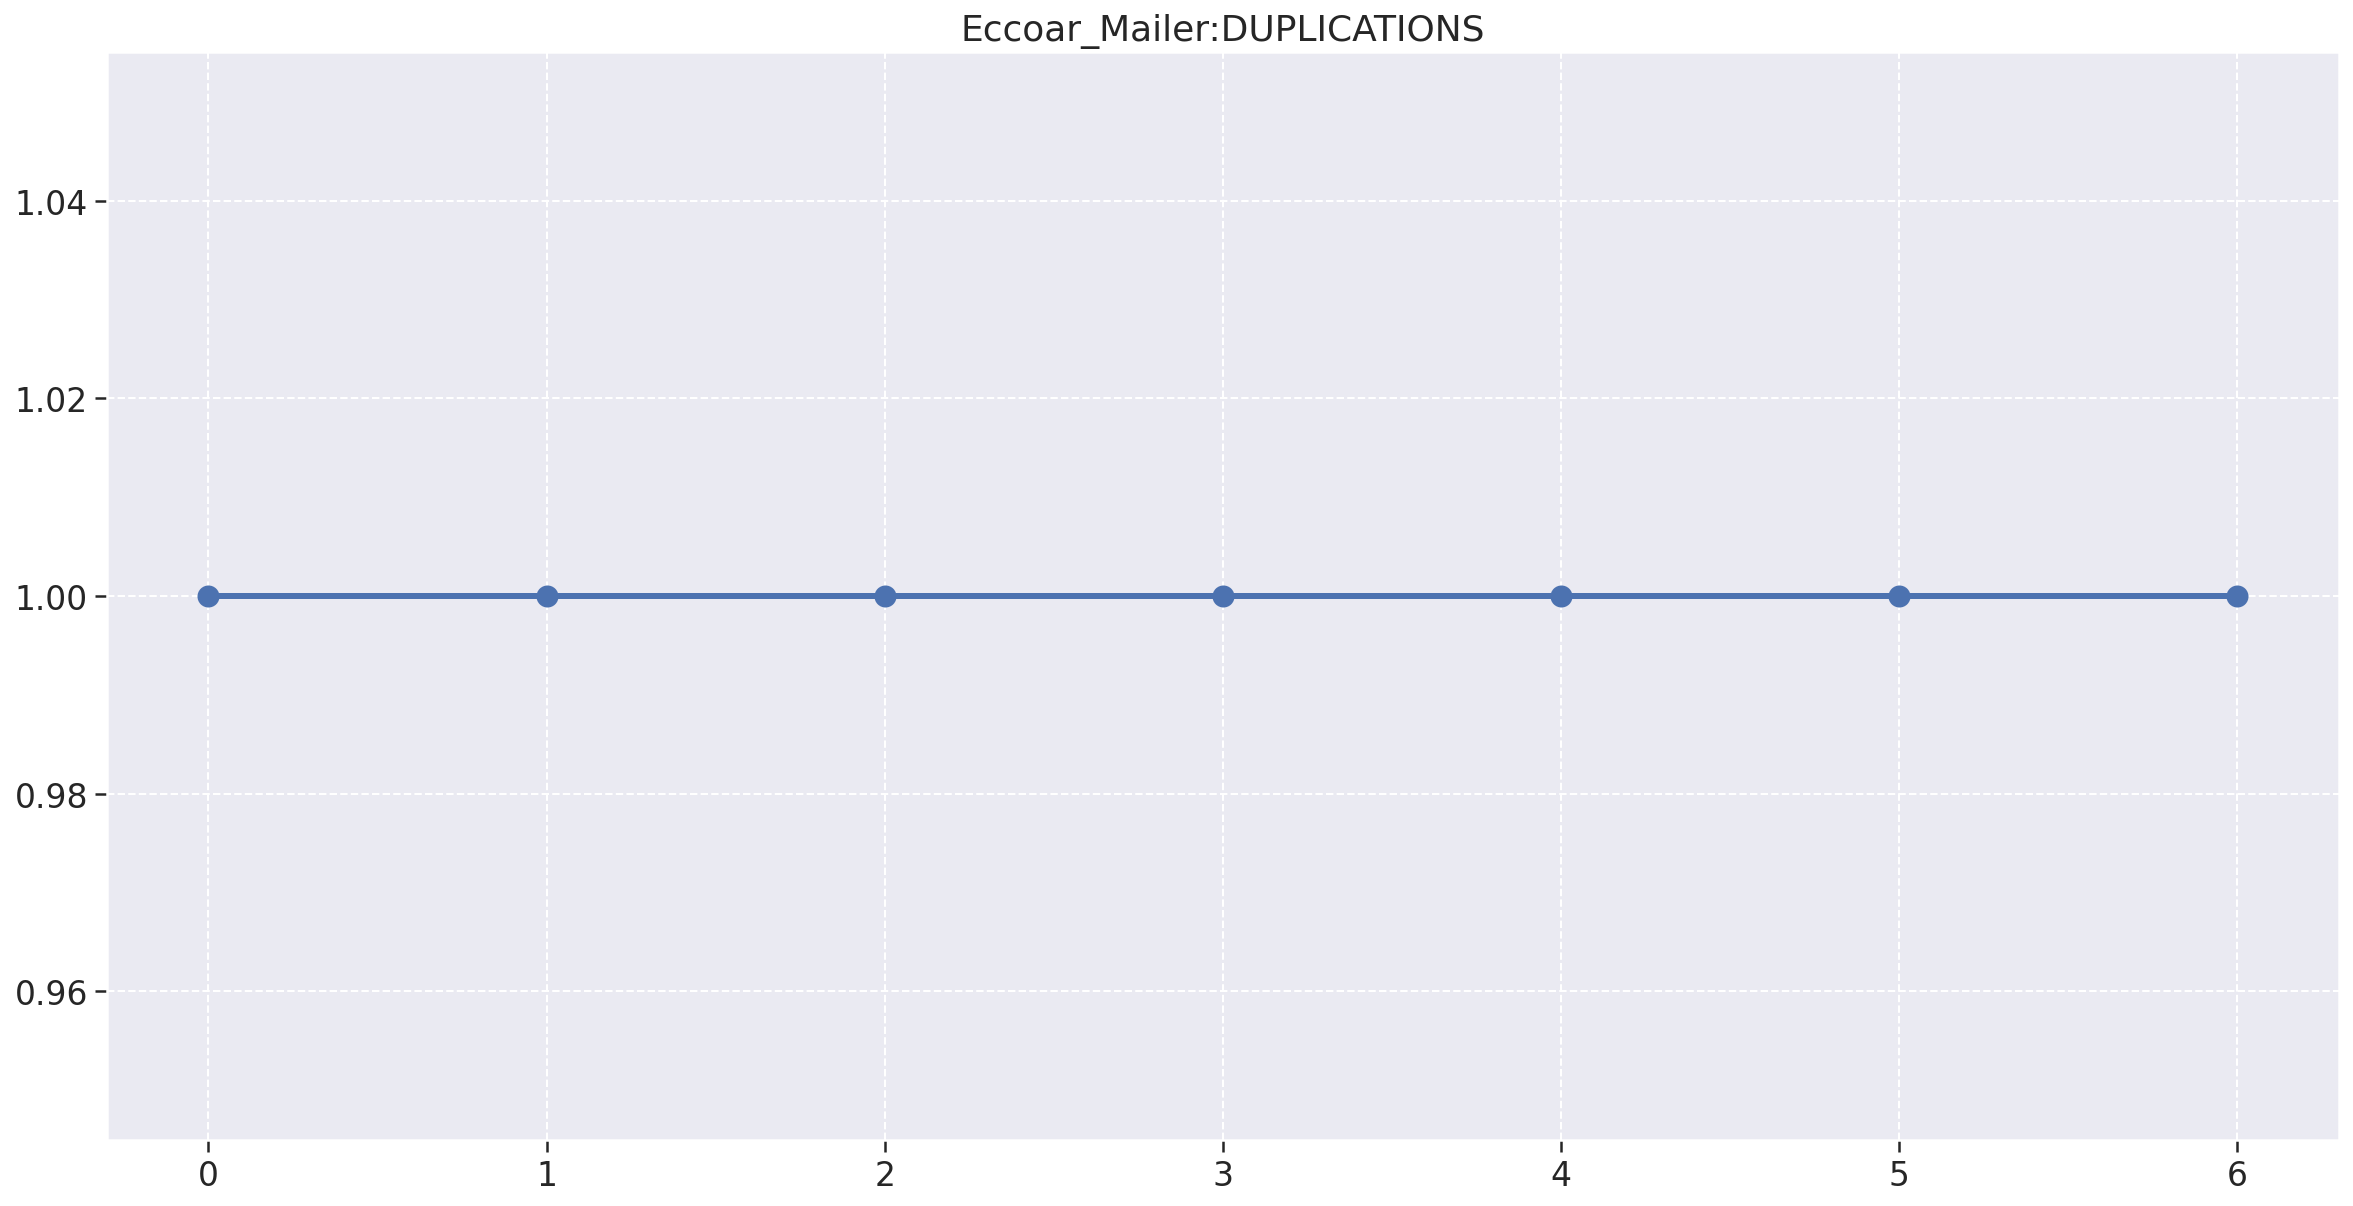

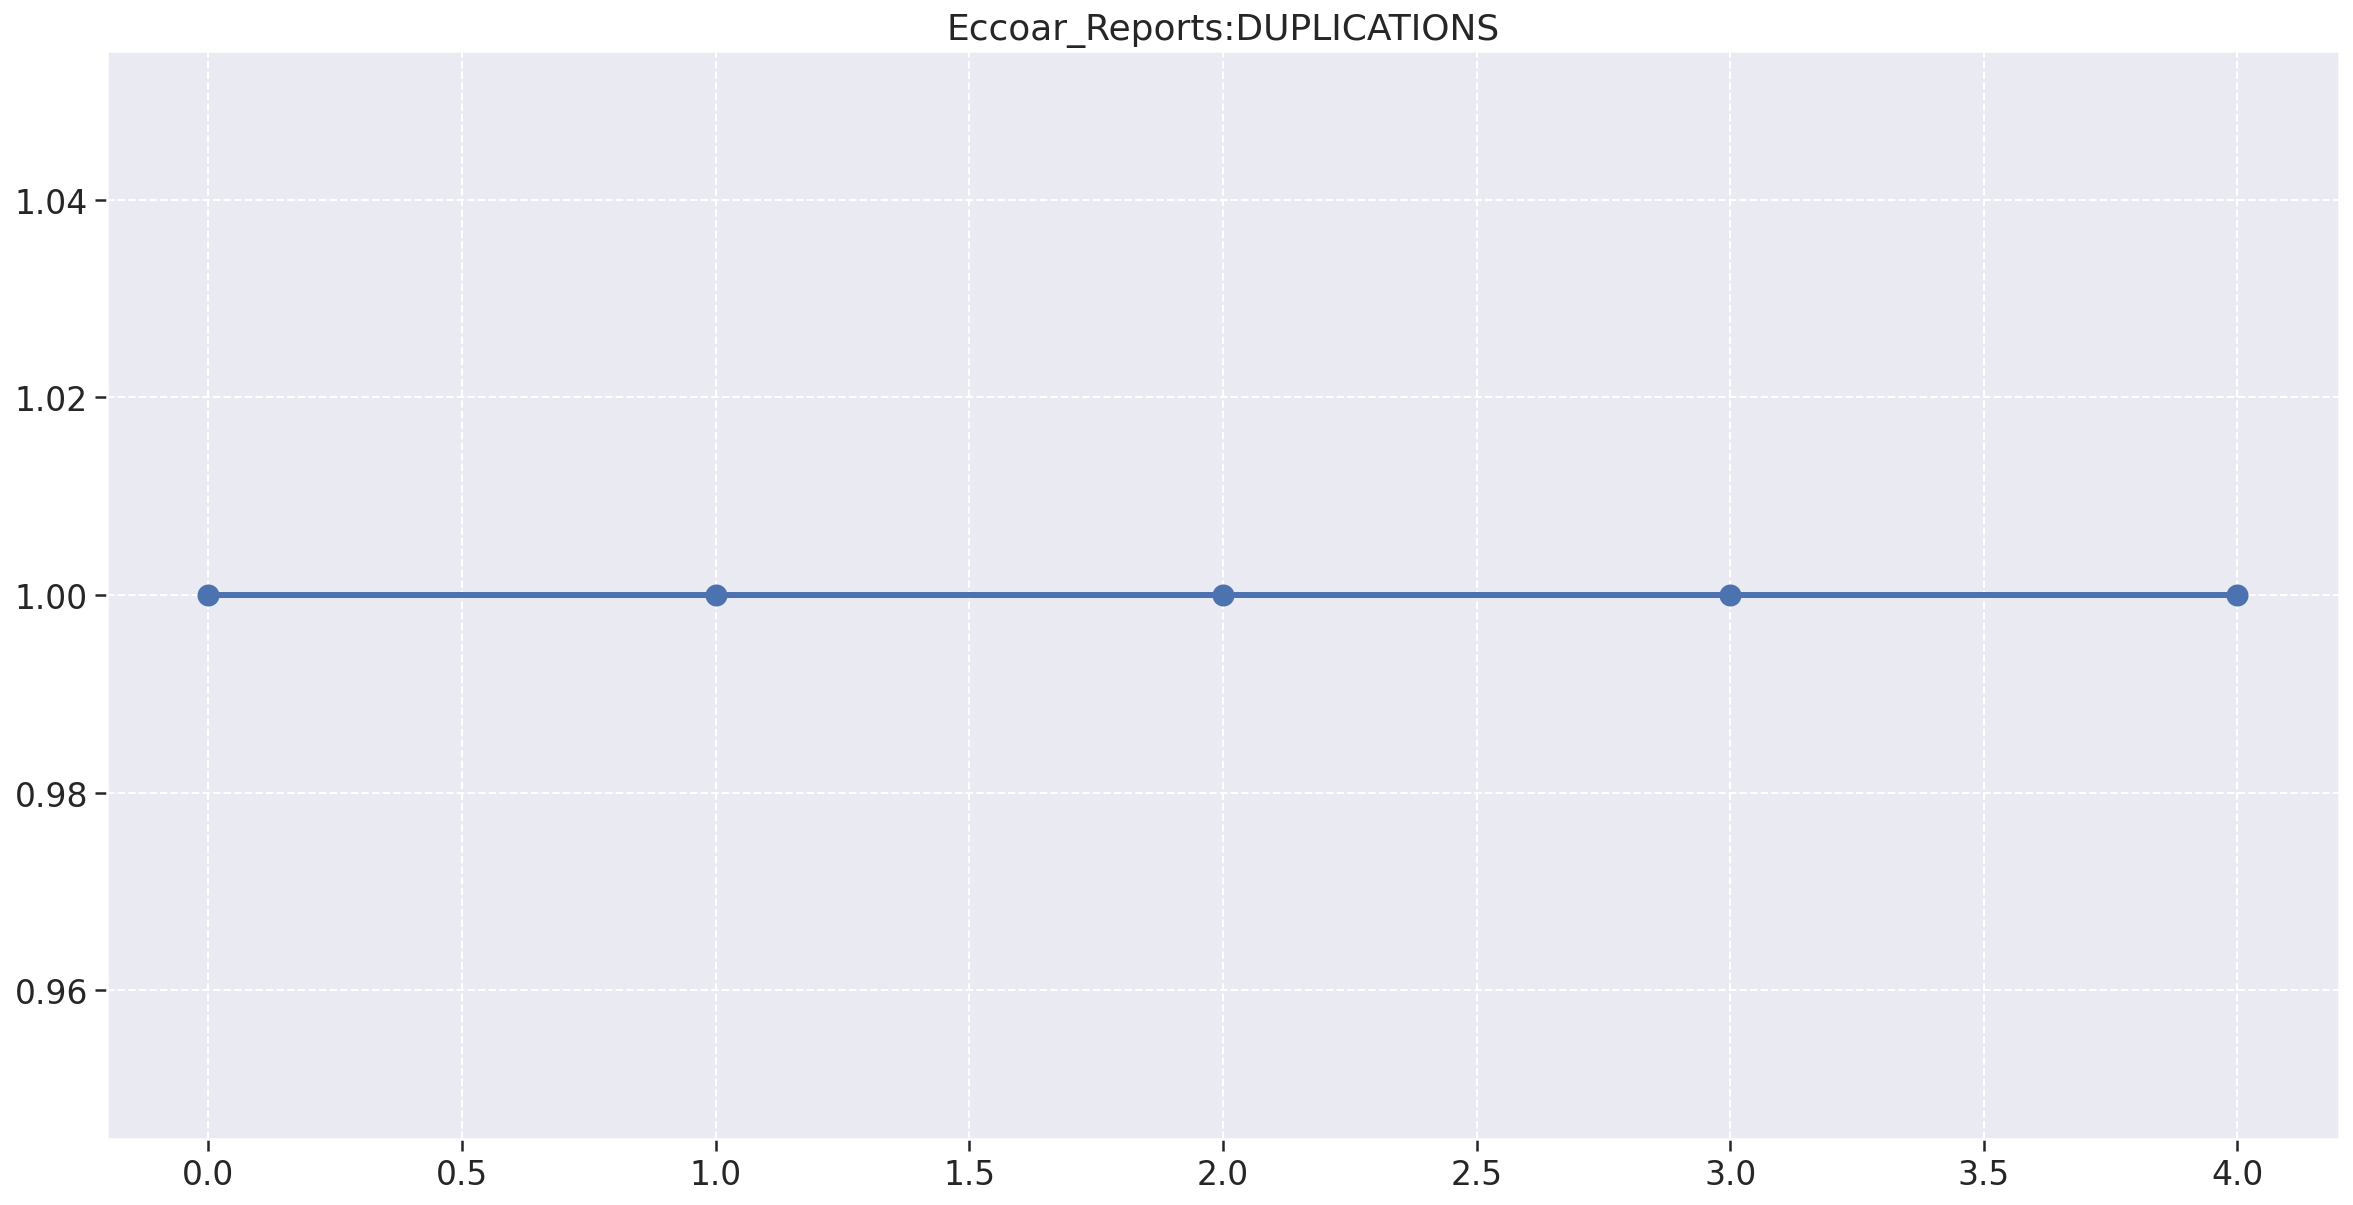

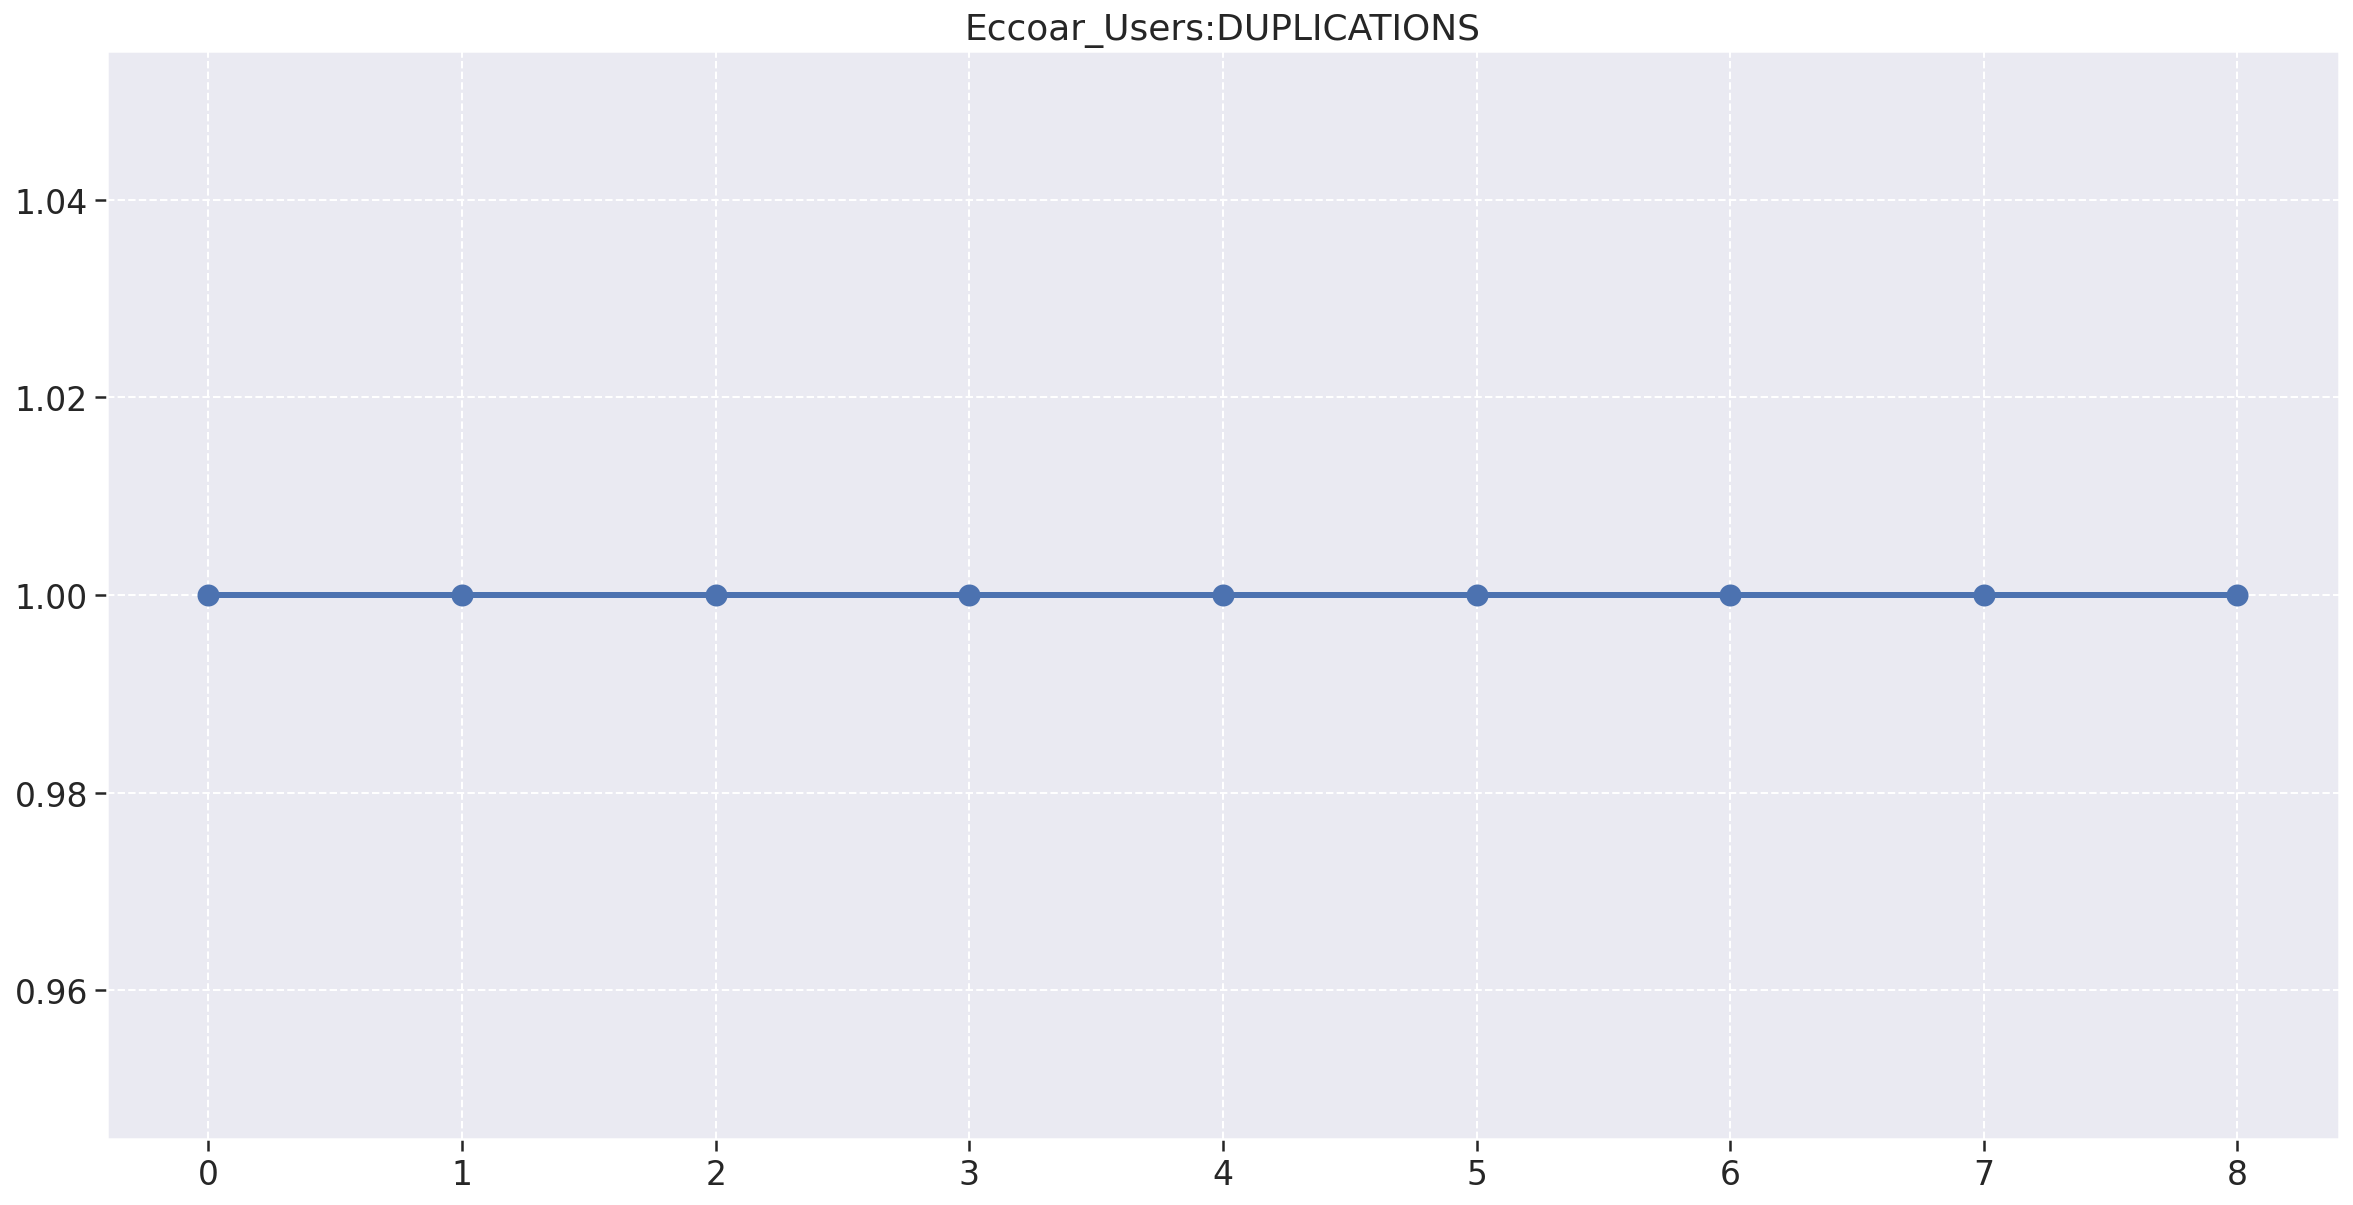

In [70]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

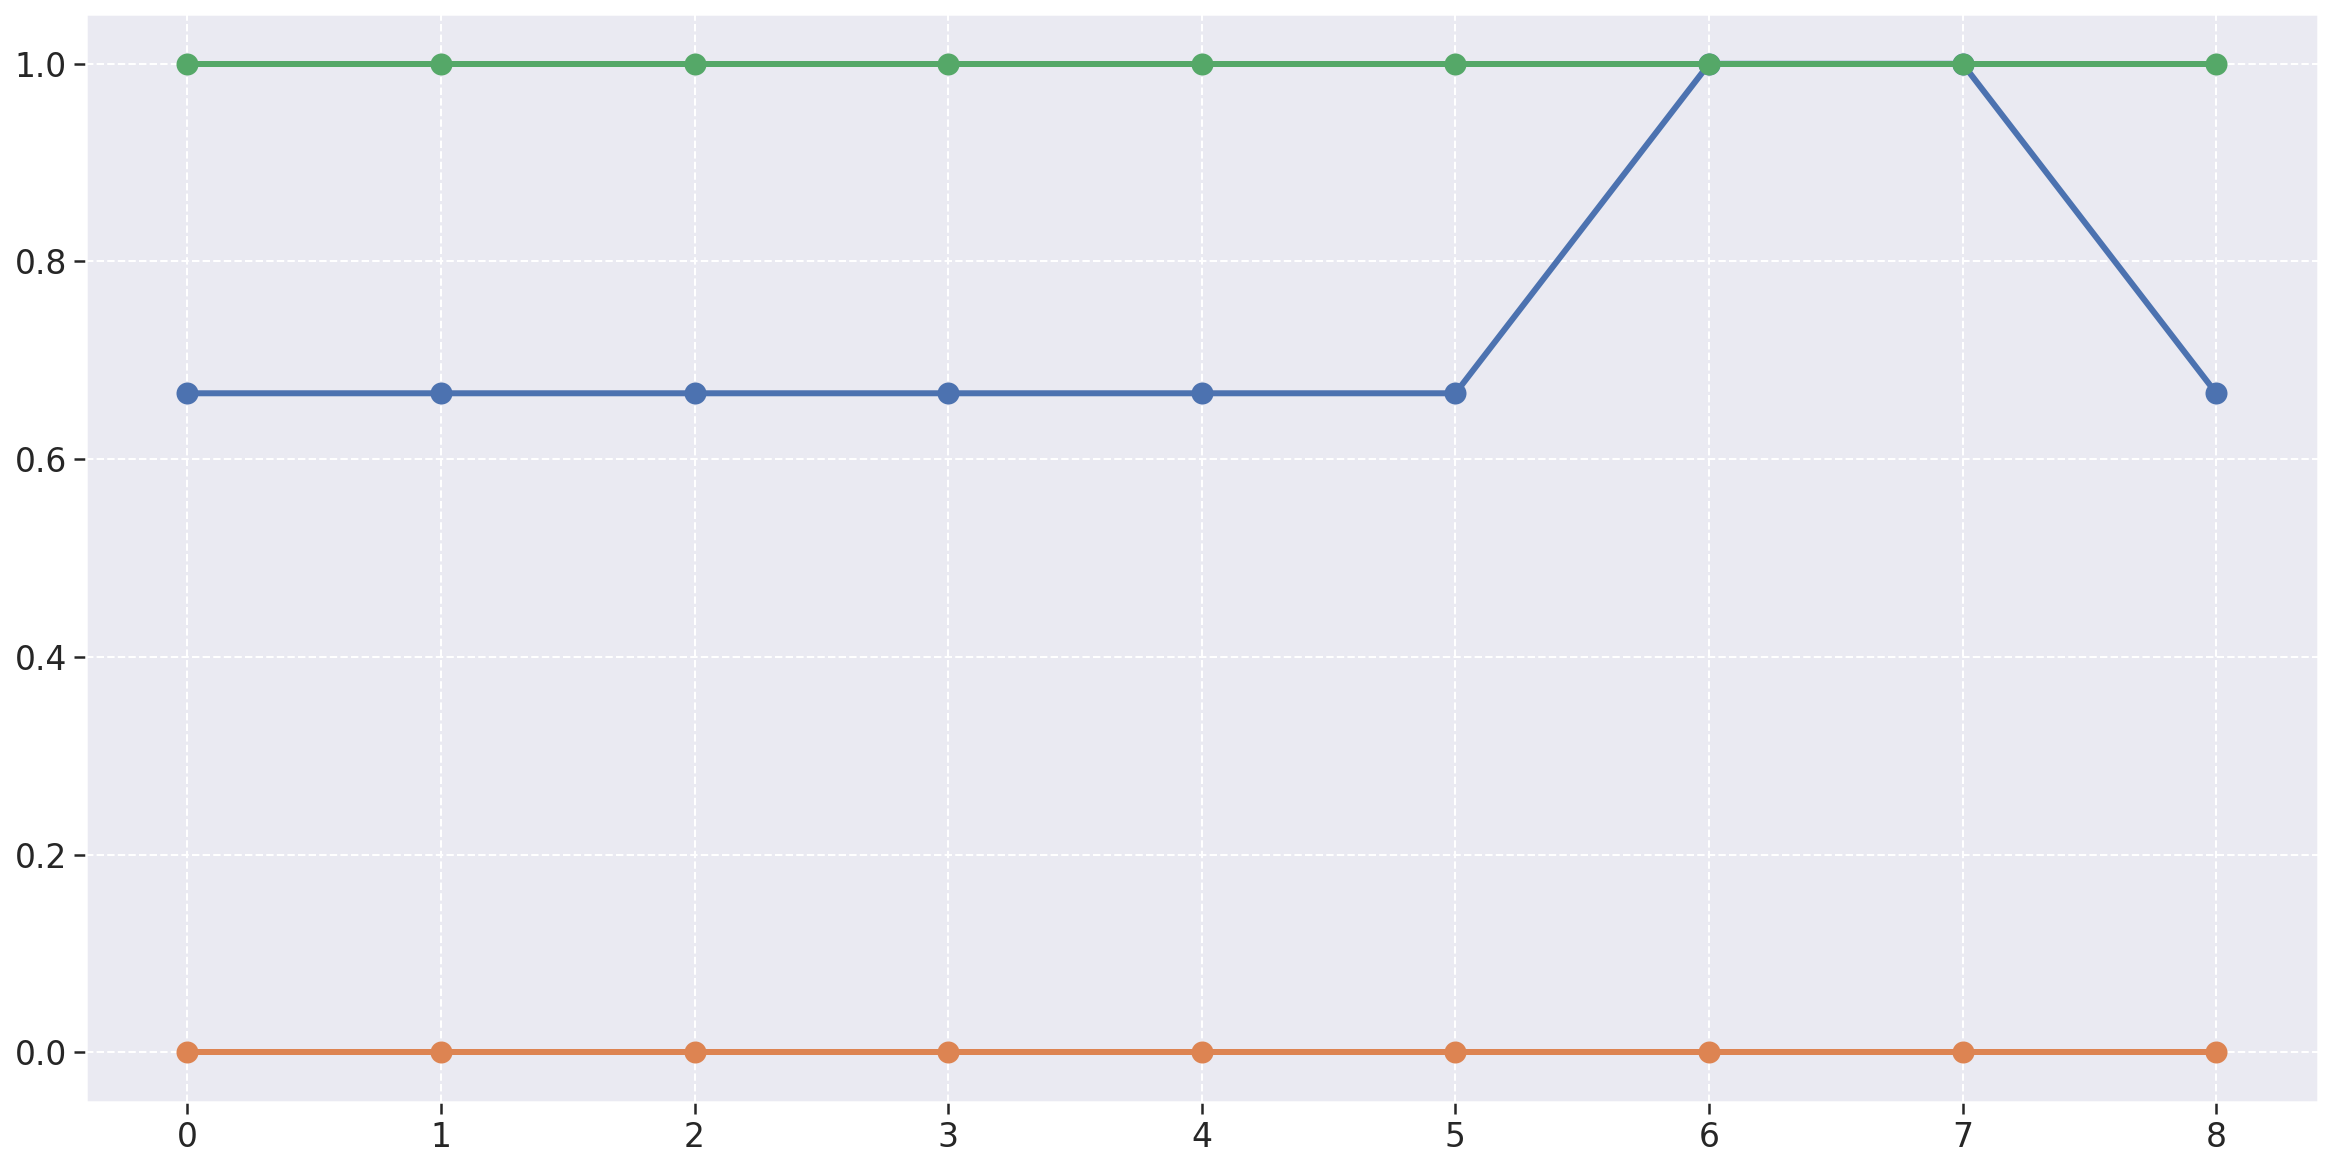

In [73]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(metrics_df['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [78]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

repo1['asc1'] = ((repo1['m1']*pm1)+(repo1['m2']*pm2)+(repo1['m3']*pm3))*psc1
repo2['asc1'] = ((repo2['m1']*pm1)+(repo2['m2']*pm2)+(repo2['m3']*pm3))*psc1
...

NameError: name 'metrics_df2' is not defined

In [ ]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo1['asc1'], linewidth=3, marker='o', markersize=10)

In [ ]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=10)

In [ ]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repo1['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=5)
...

In [ ]:
metrics_df = pd.concat([repo1_metrics, repo2_metrics, ...], ignore_index=True)

metrics_df['ac1'] = metrics_df['asc1'] * 1
metrics_df['total'] = metrics_df['asc1'] * 1

In [ ]:
metrics_df

In [ ]:
metrics_df.to_excel('data/metrics_df.xlsx', index = False)

# Histogram Repositories Analysis

In [32]:
def generate_histogram(metric, metric_name, color):
    for repository, metrics_df in repository_metrics.items():
        fig = plt.figure(figsize=(30, 10))
        plt.title(f"{repository}:{metric_name}")
        plt.bar(metrics_df['version'], metrics_df[metric], color=color)
        plt.show()

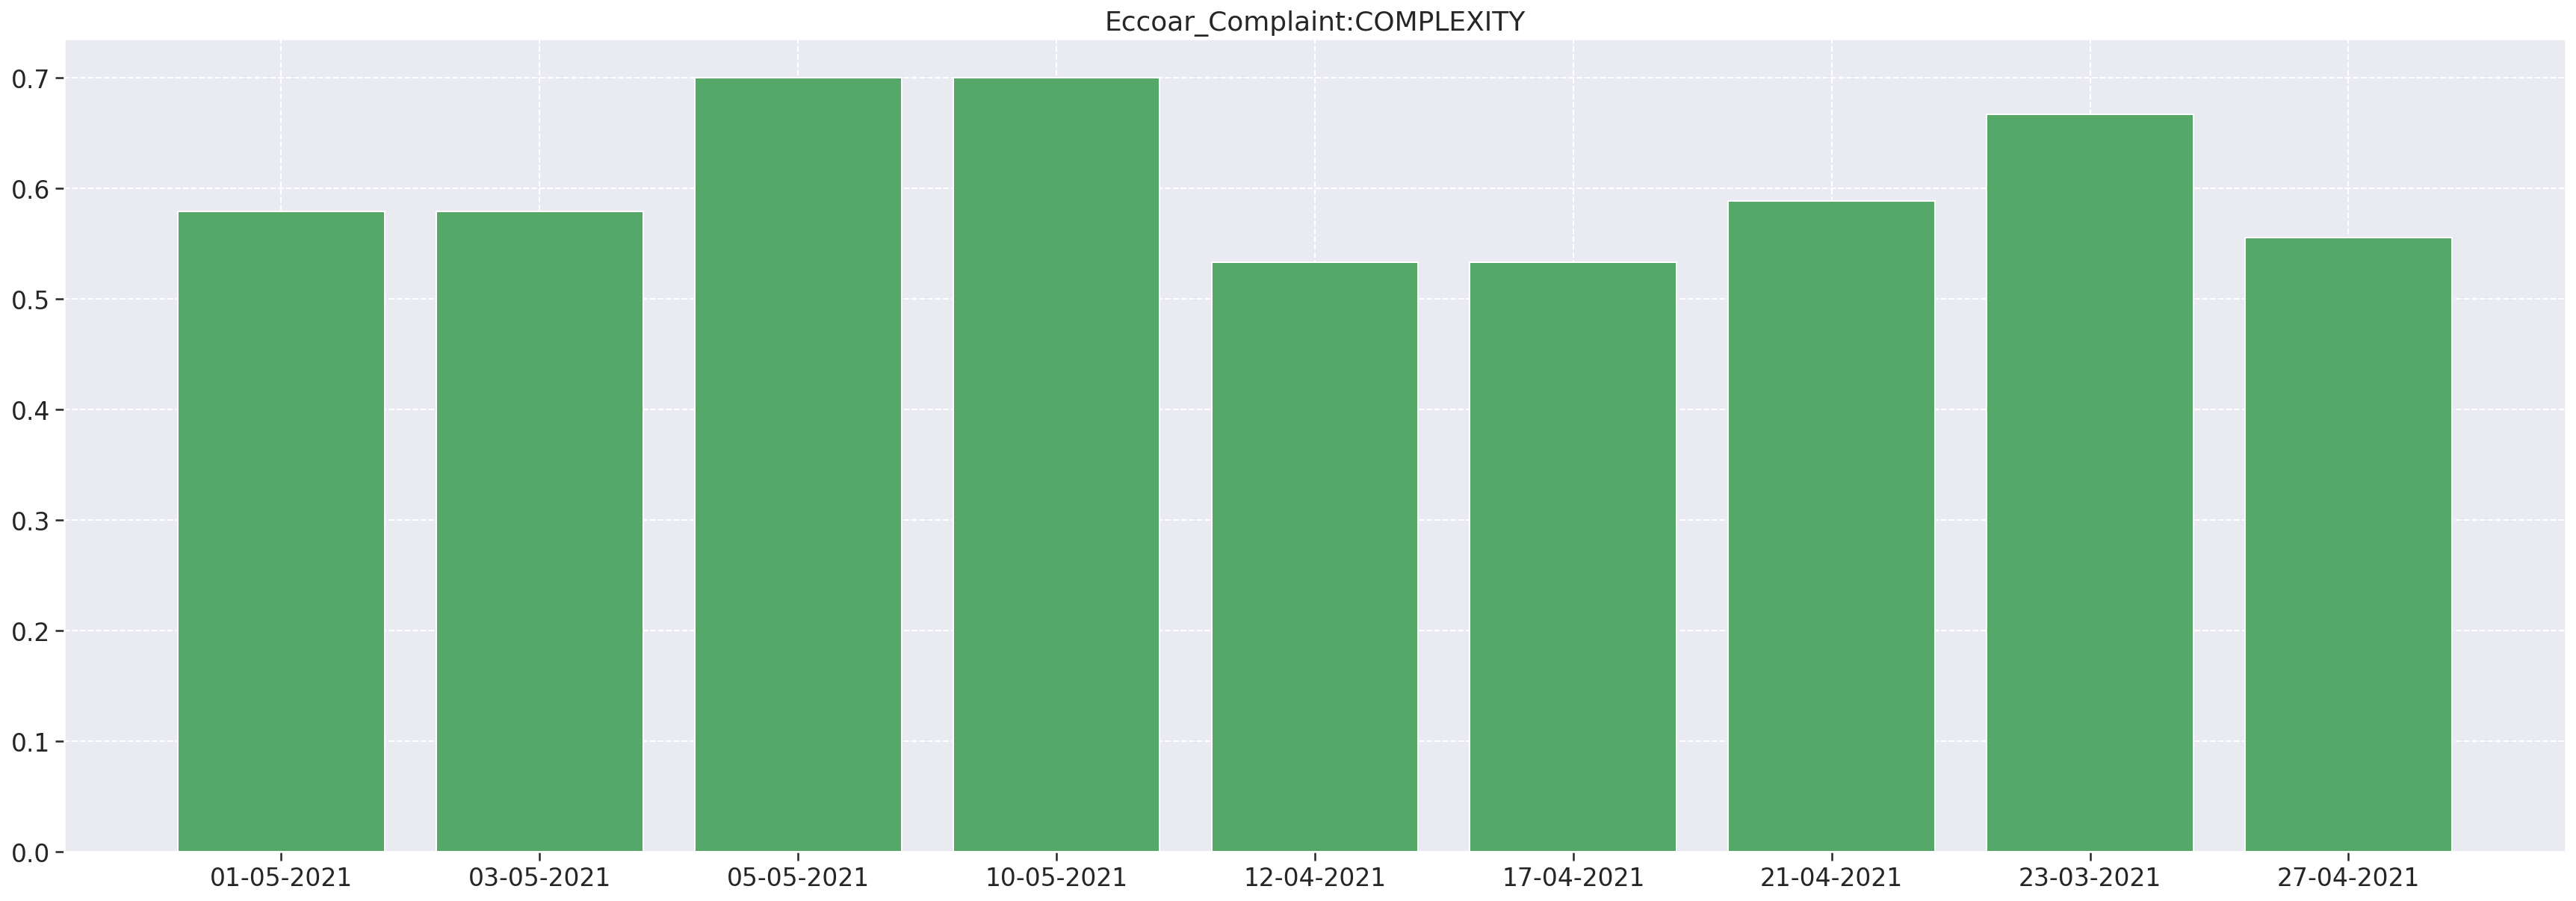

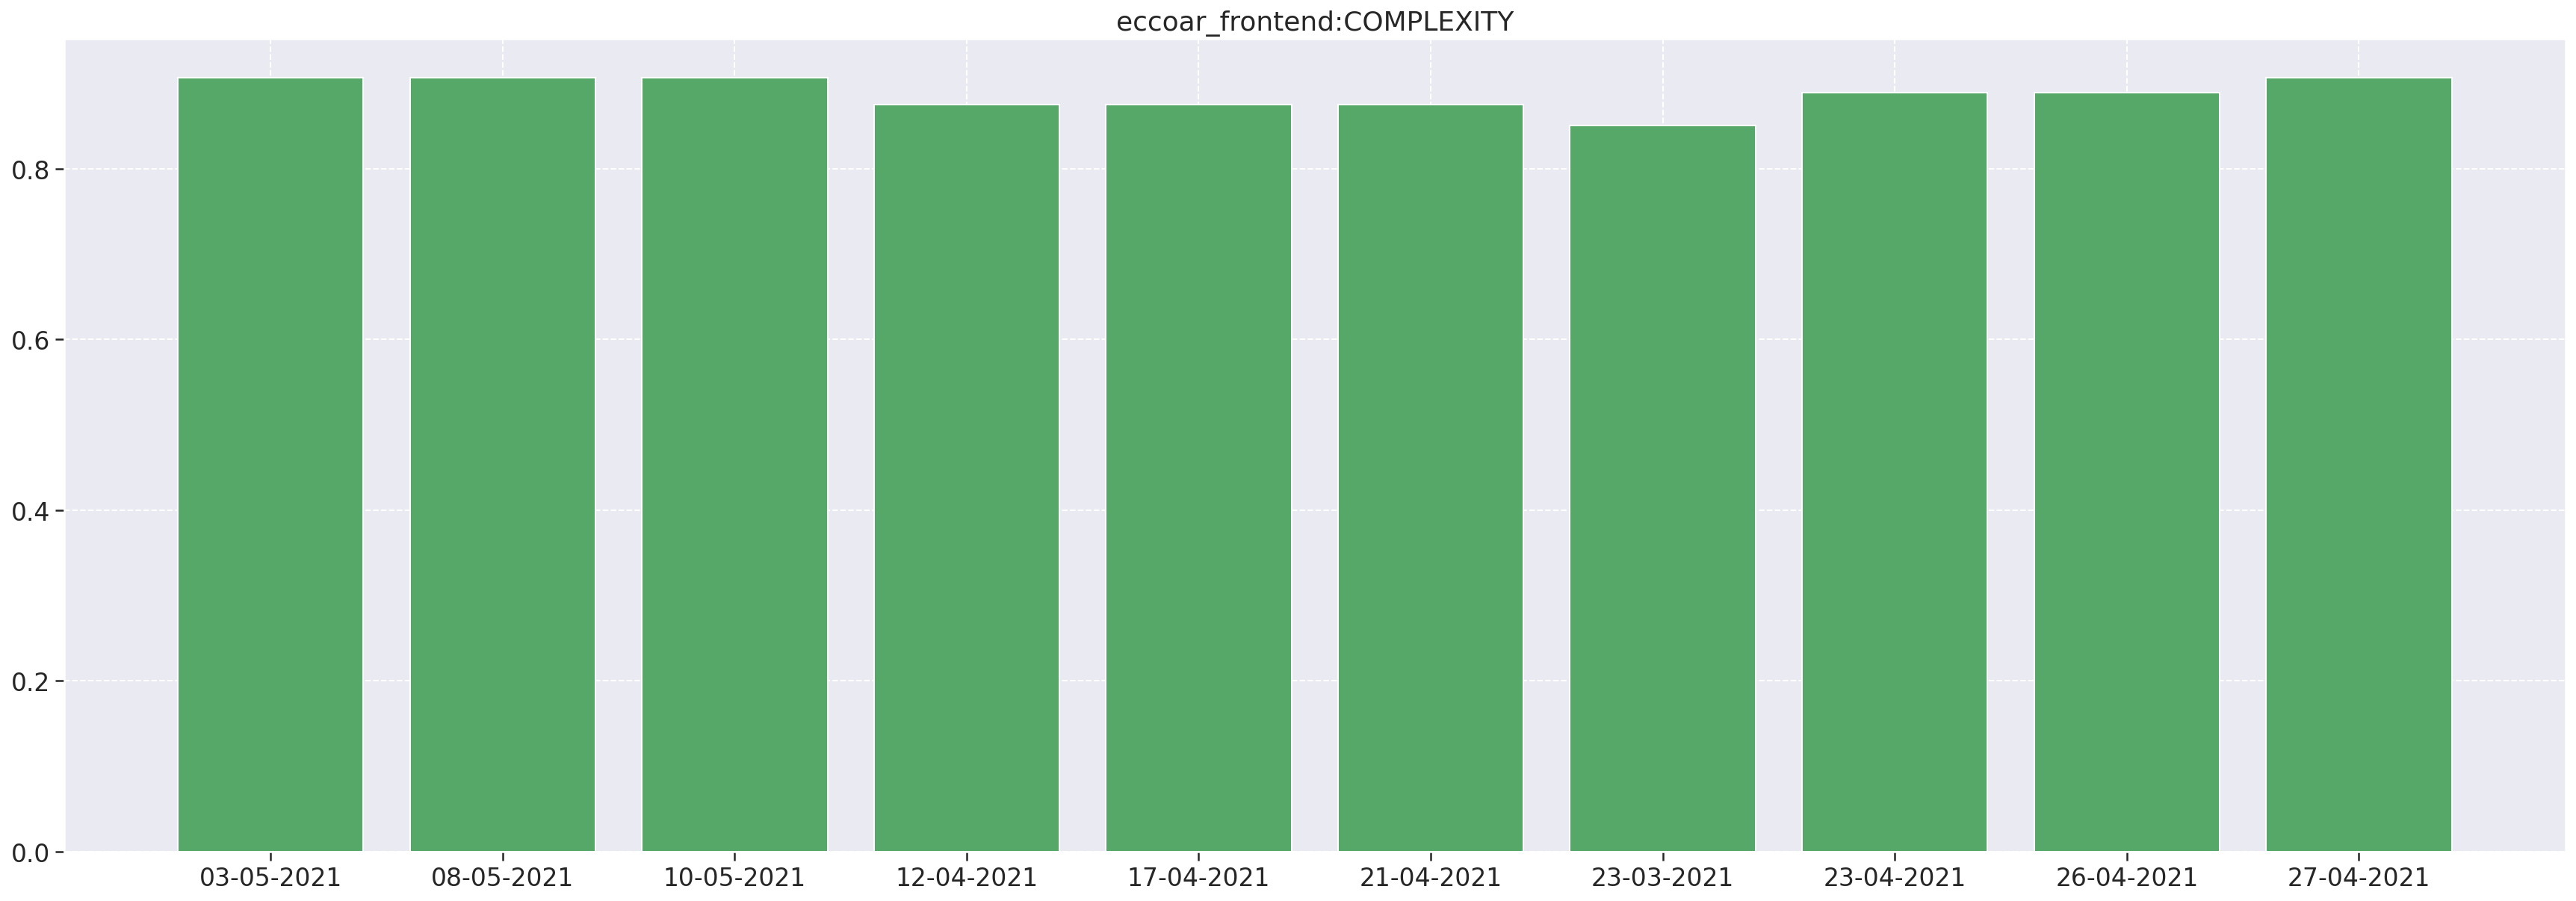

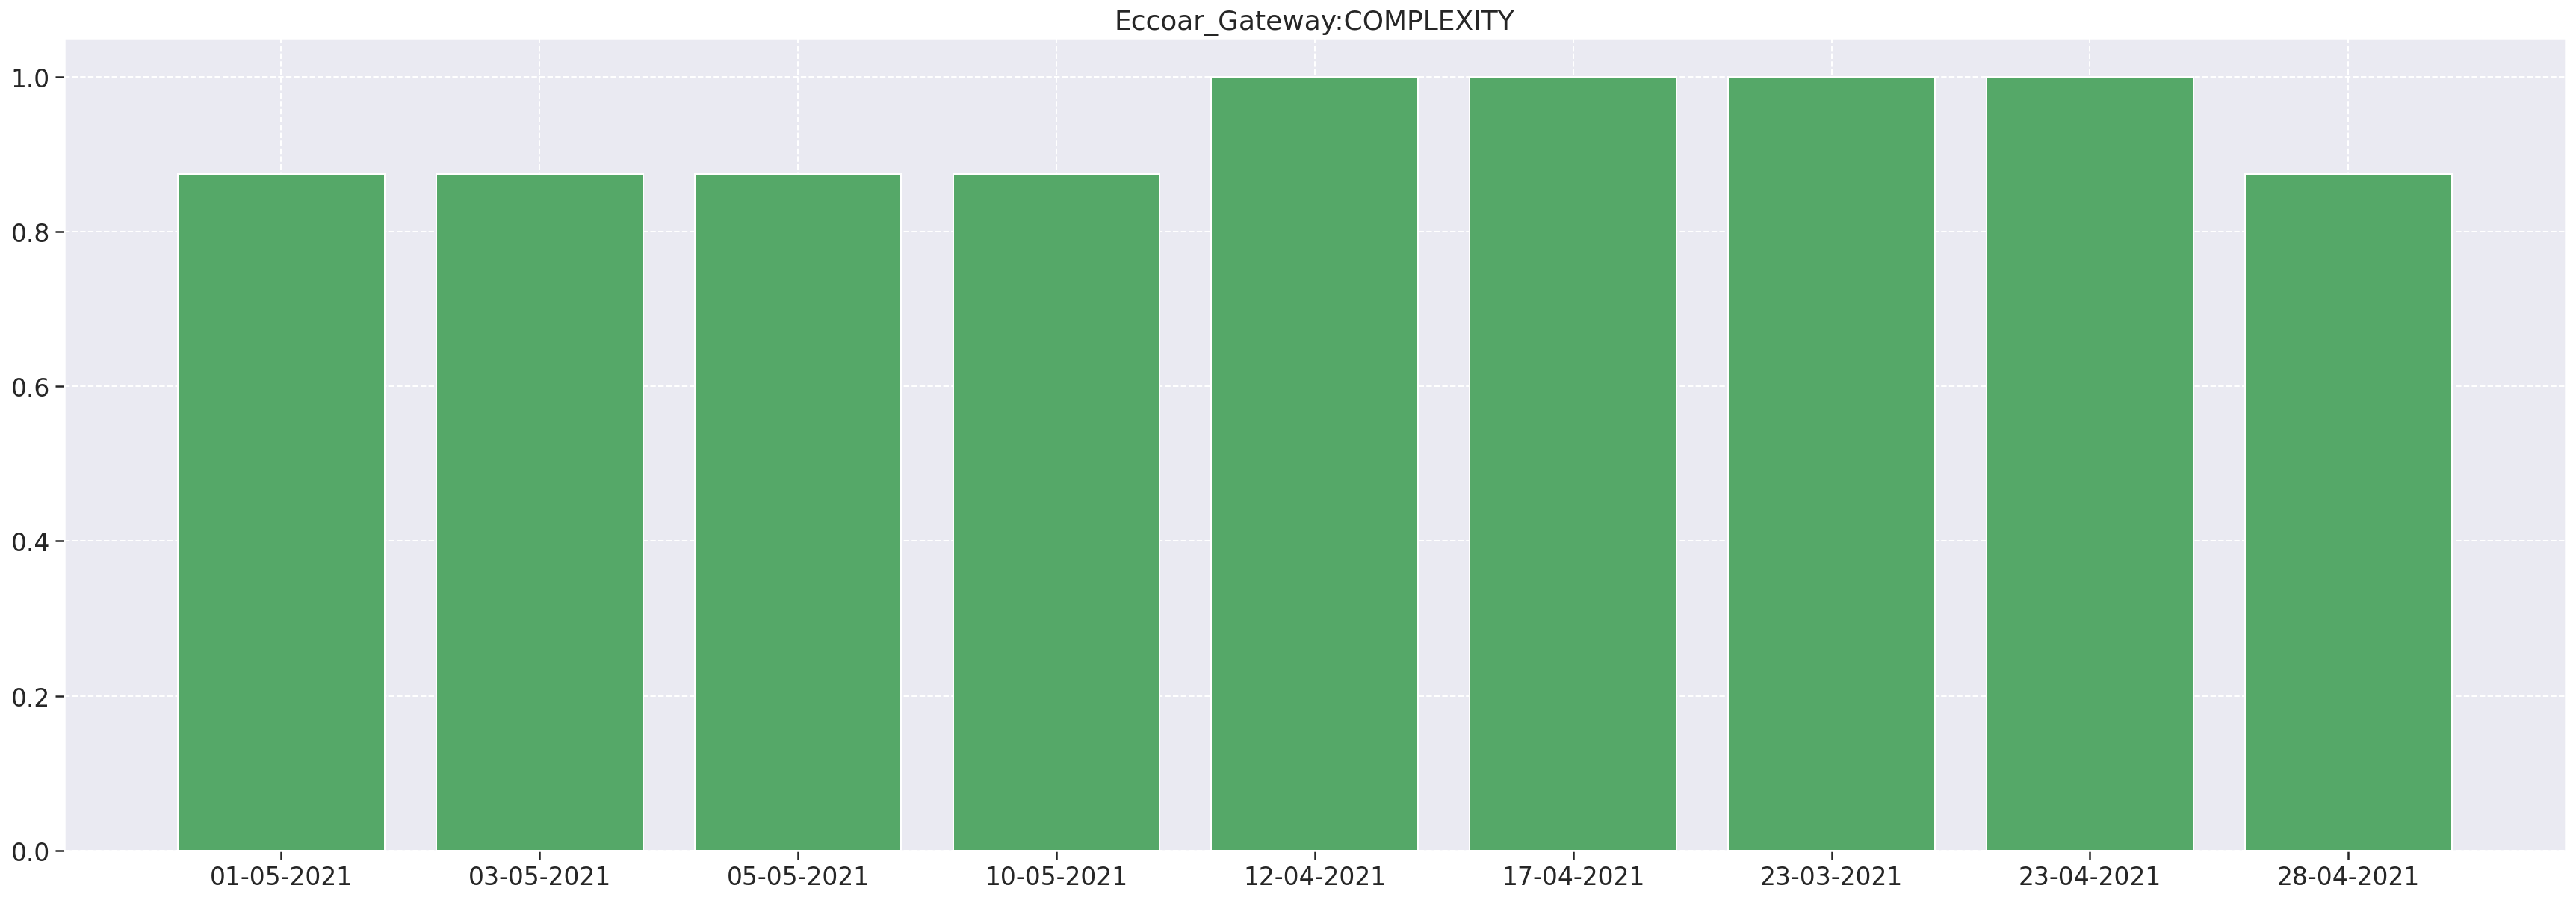

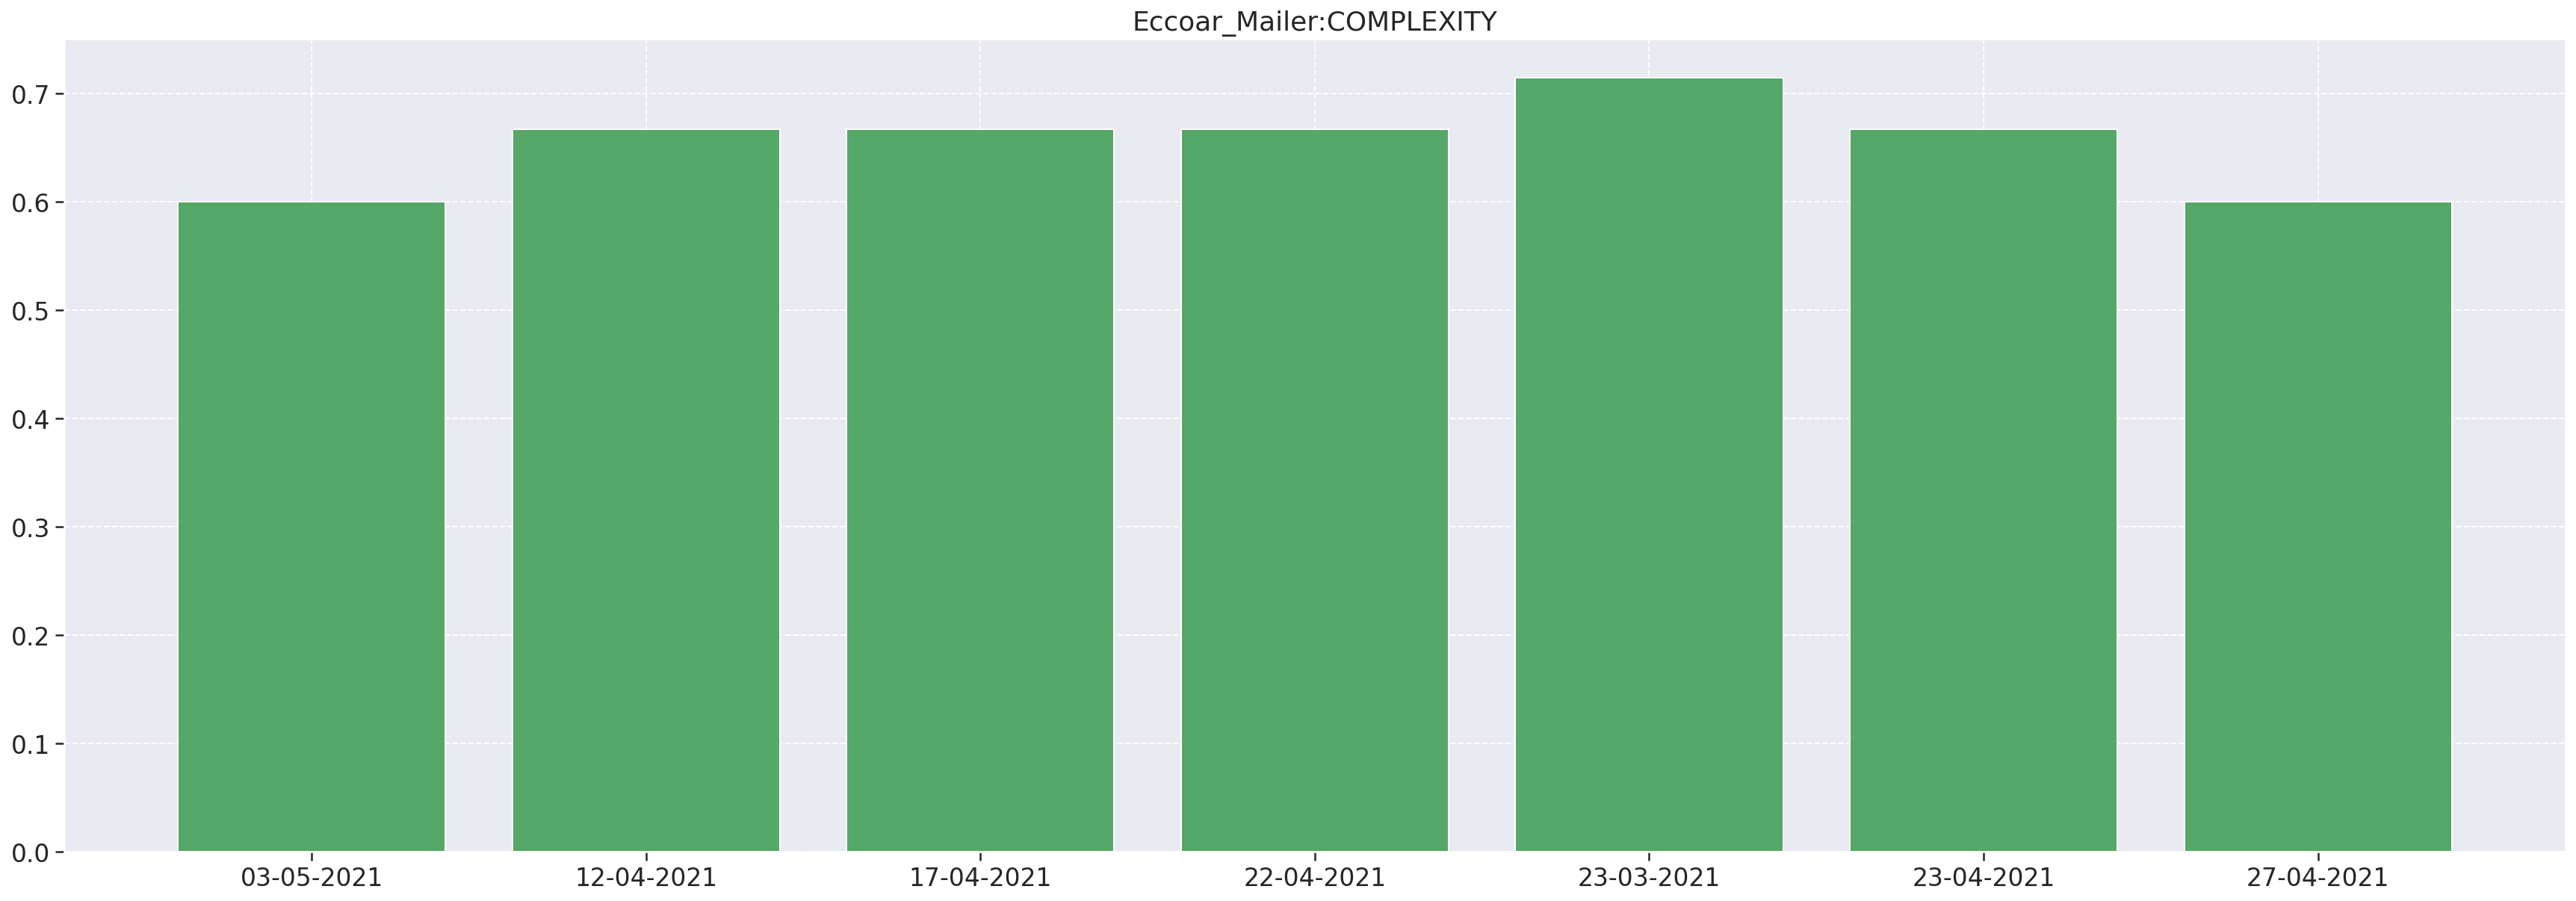

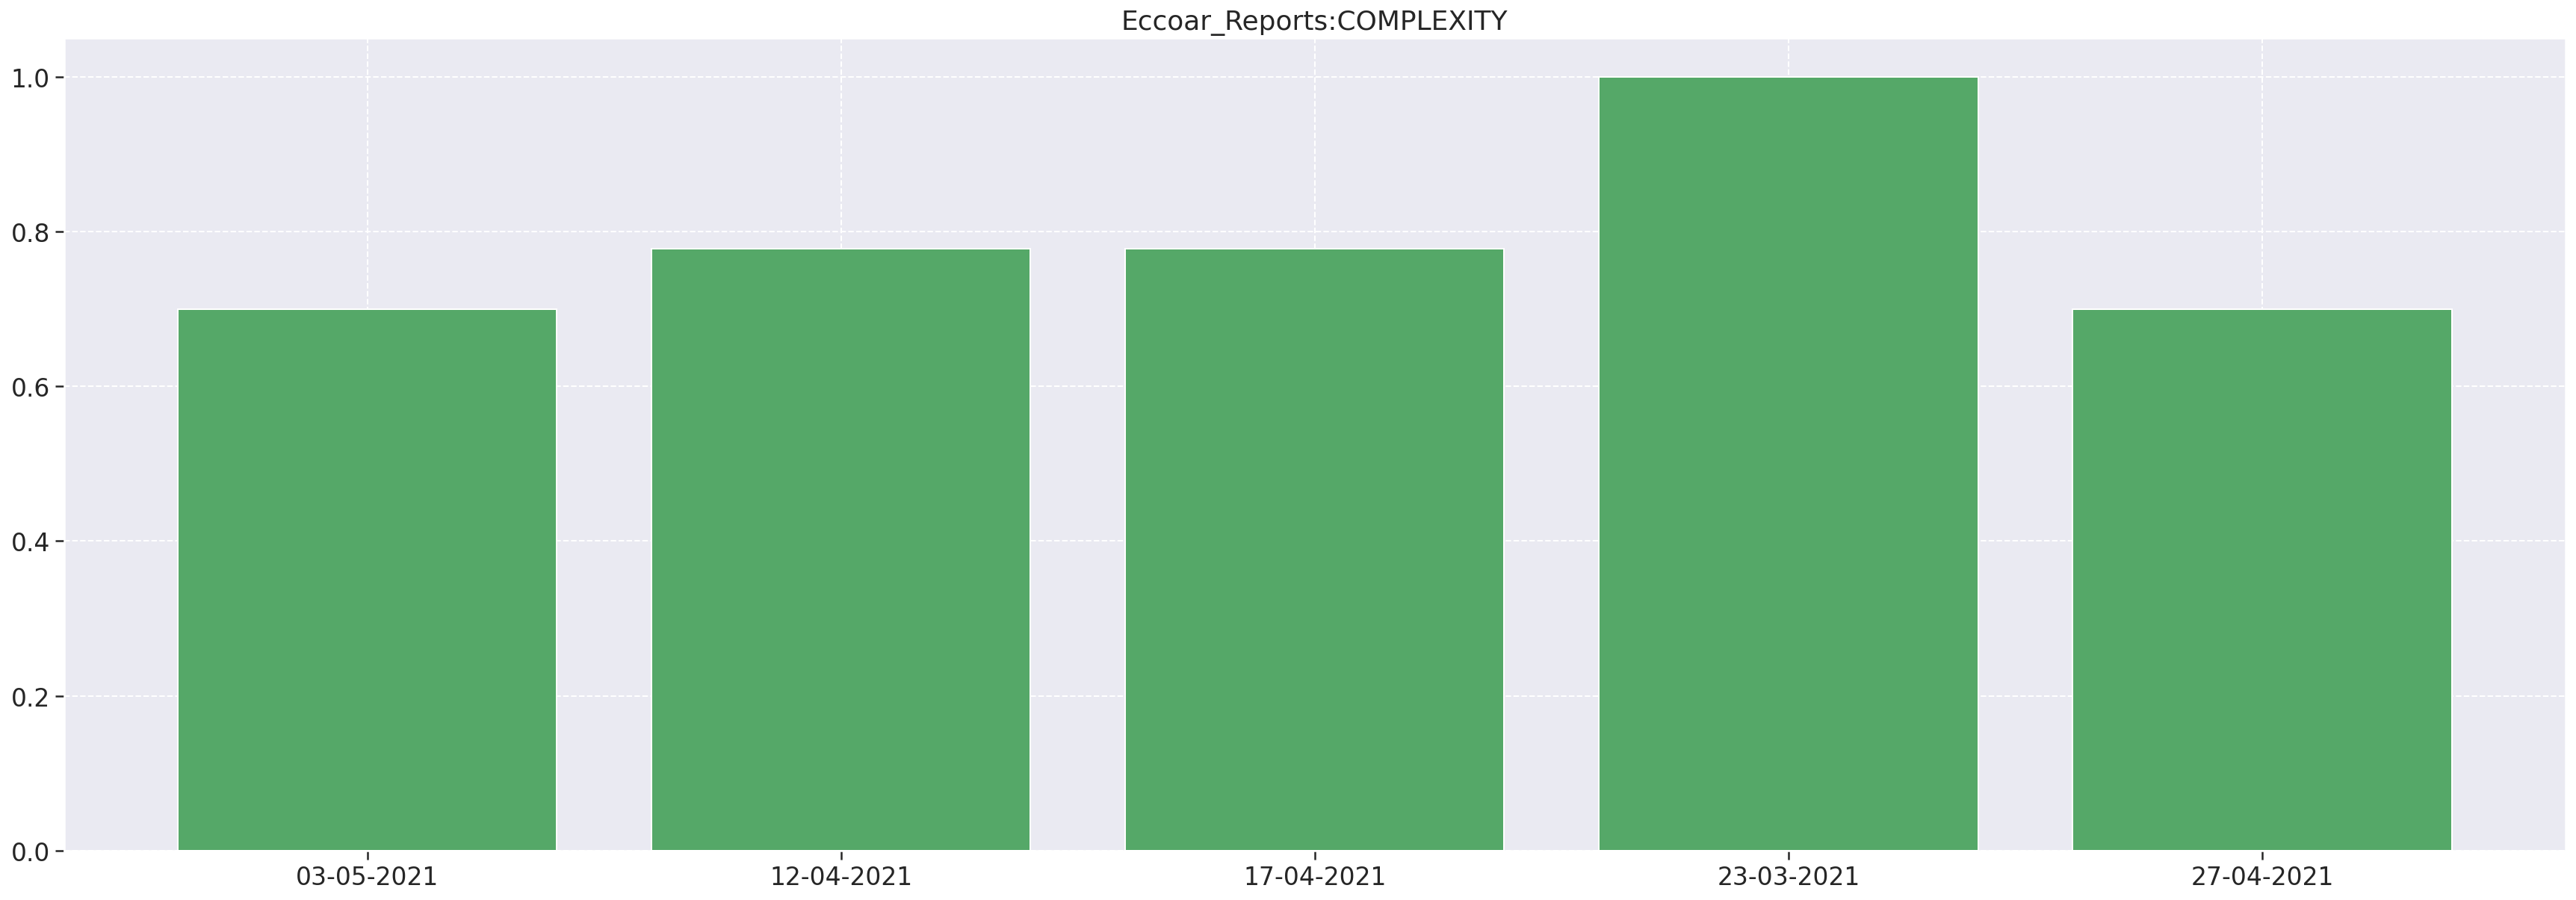

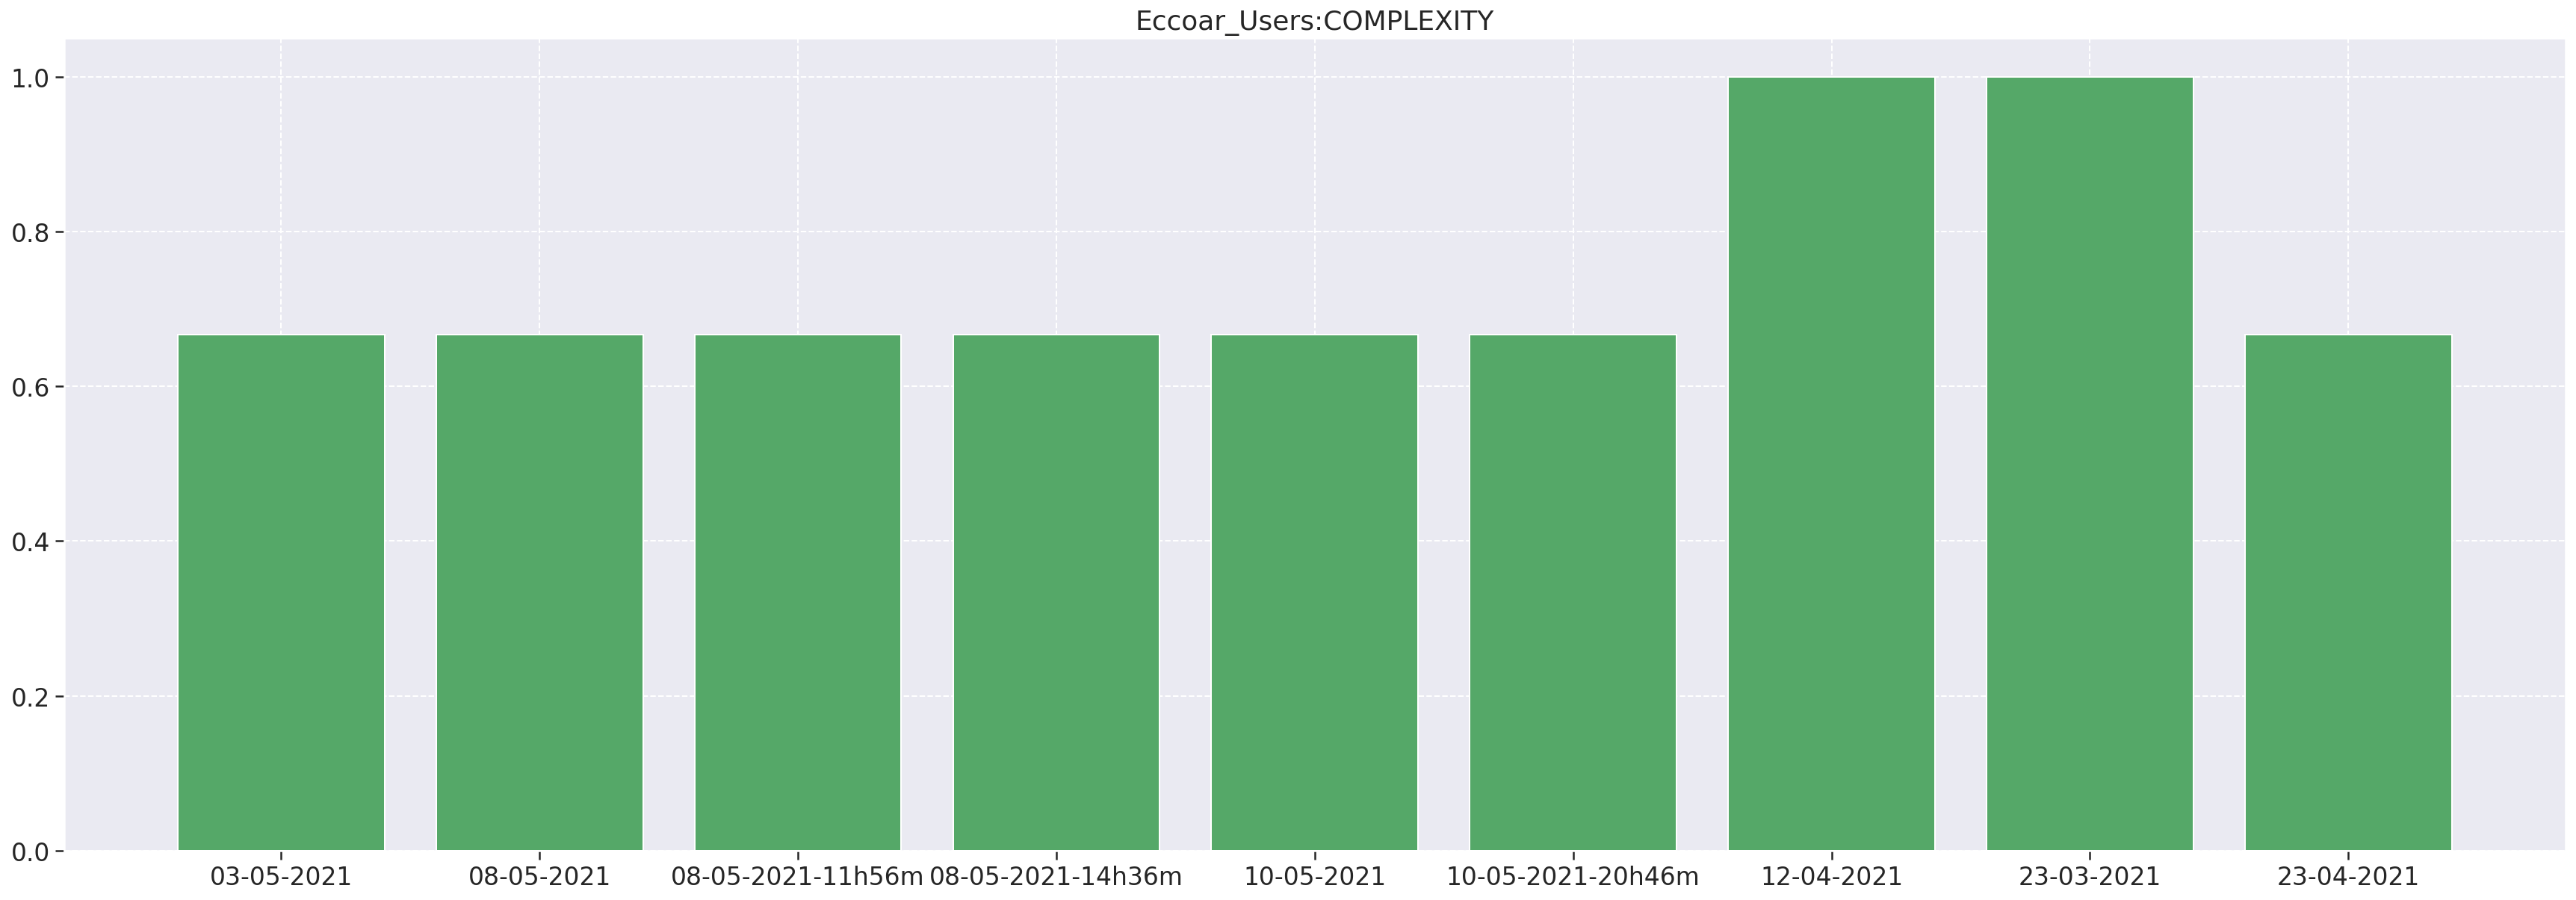

In [33]:
generate_histogram('m1', 'COMPLEXITY', 'g')

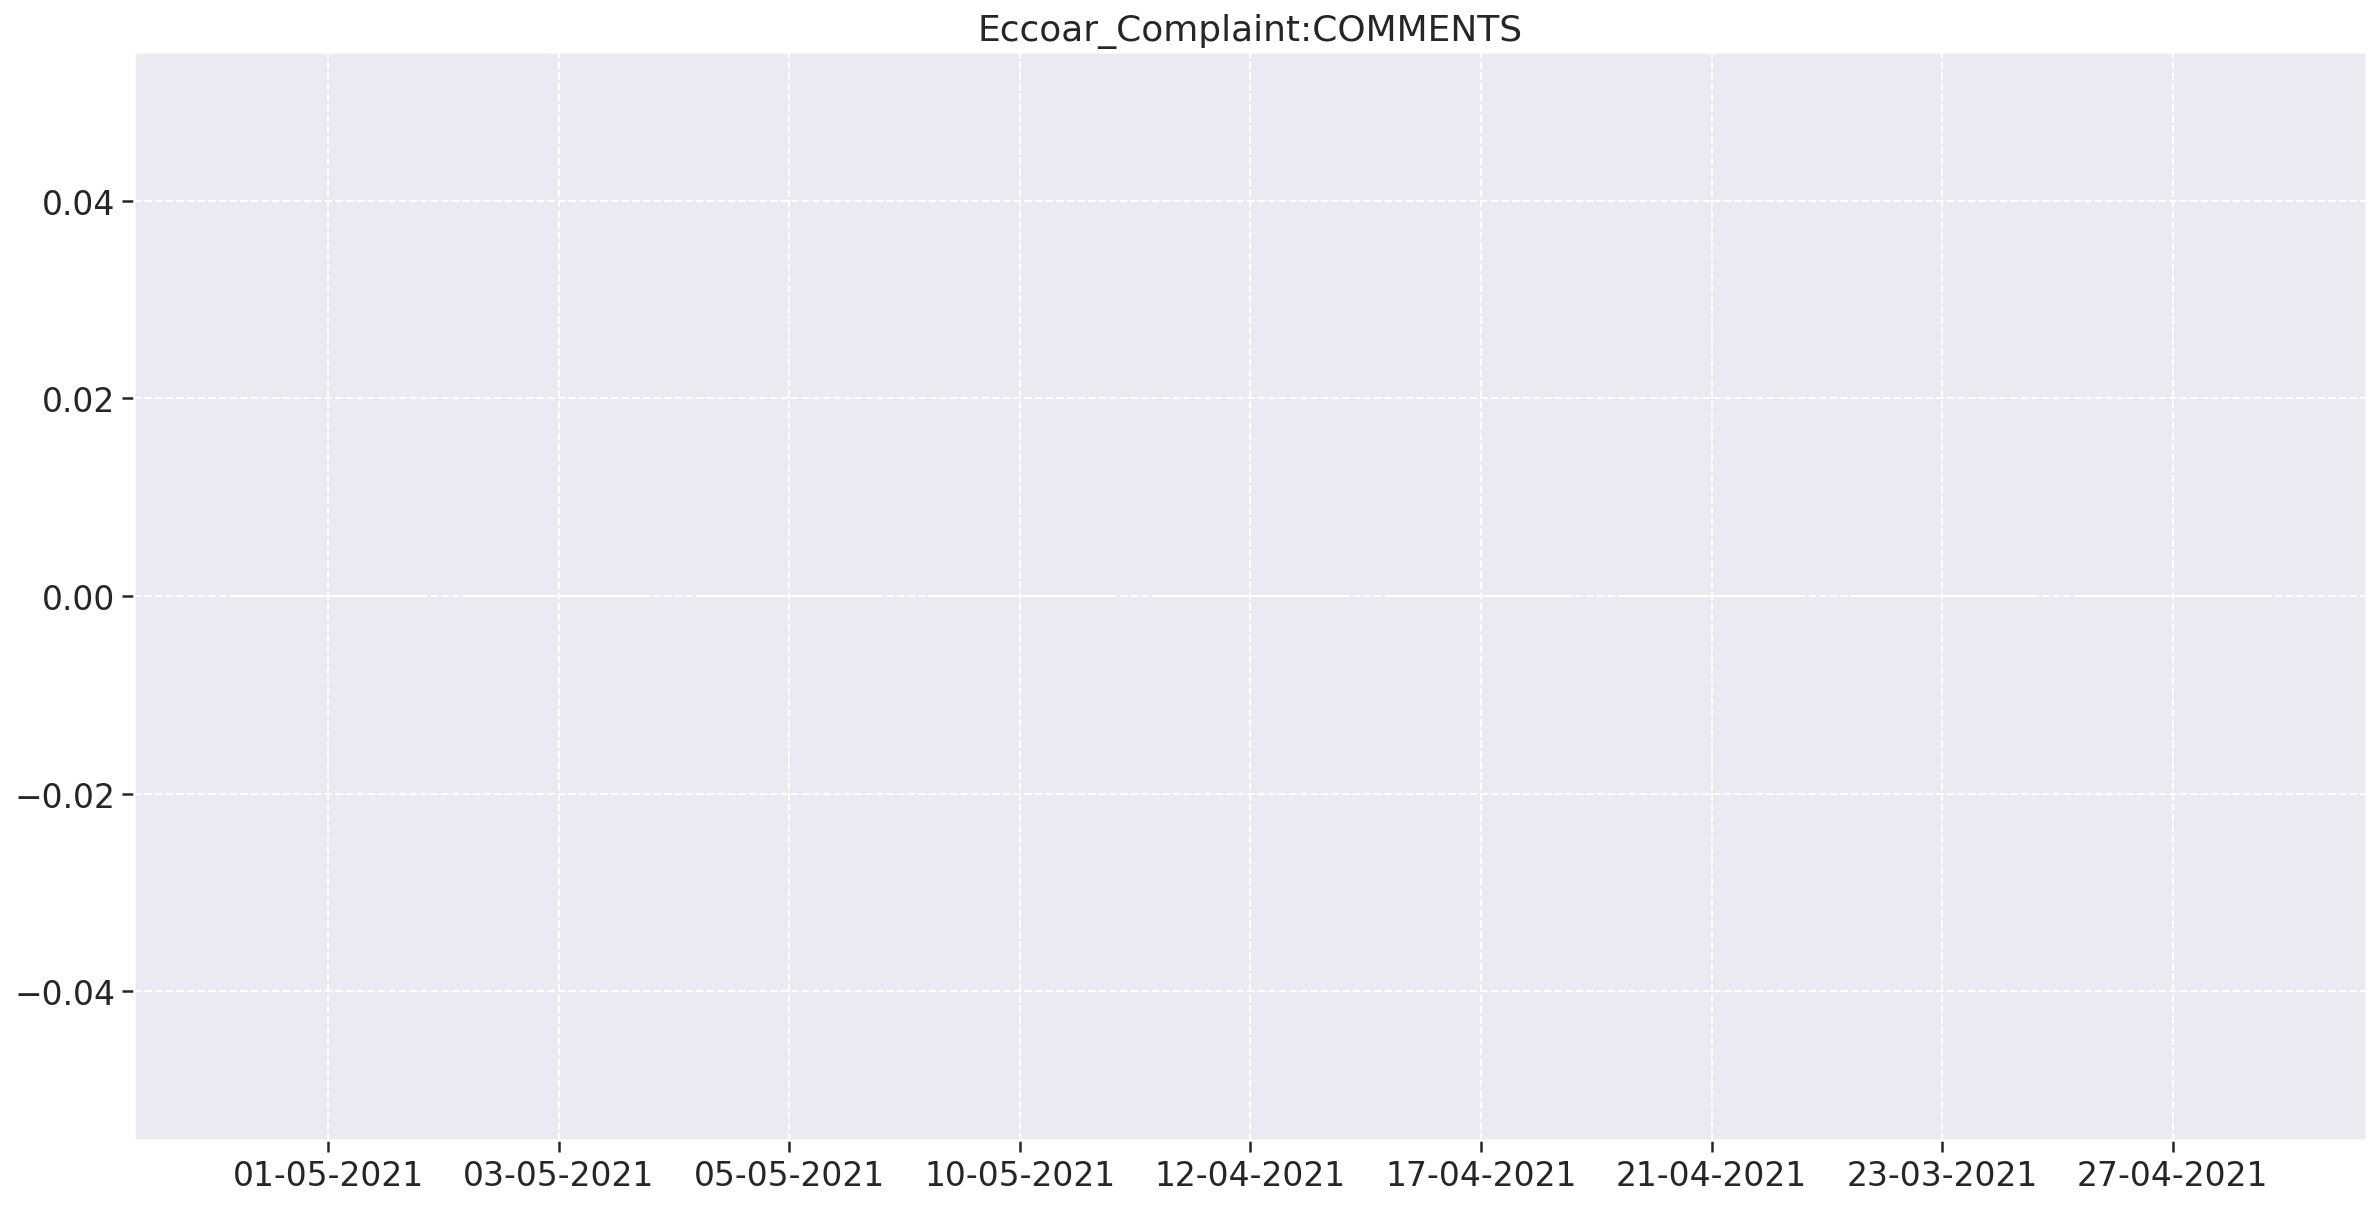

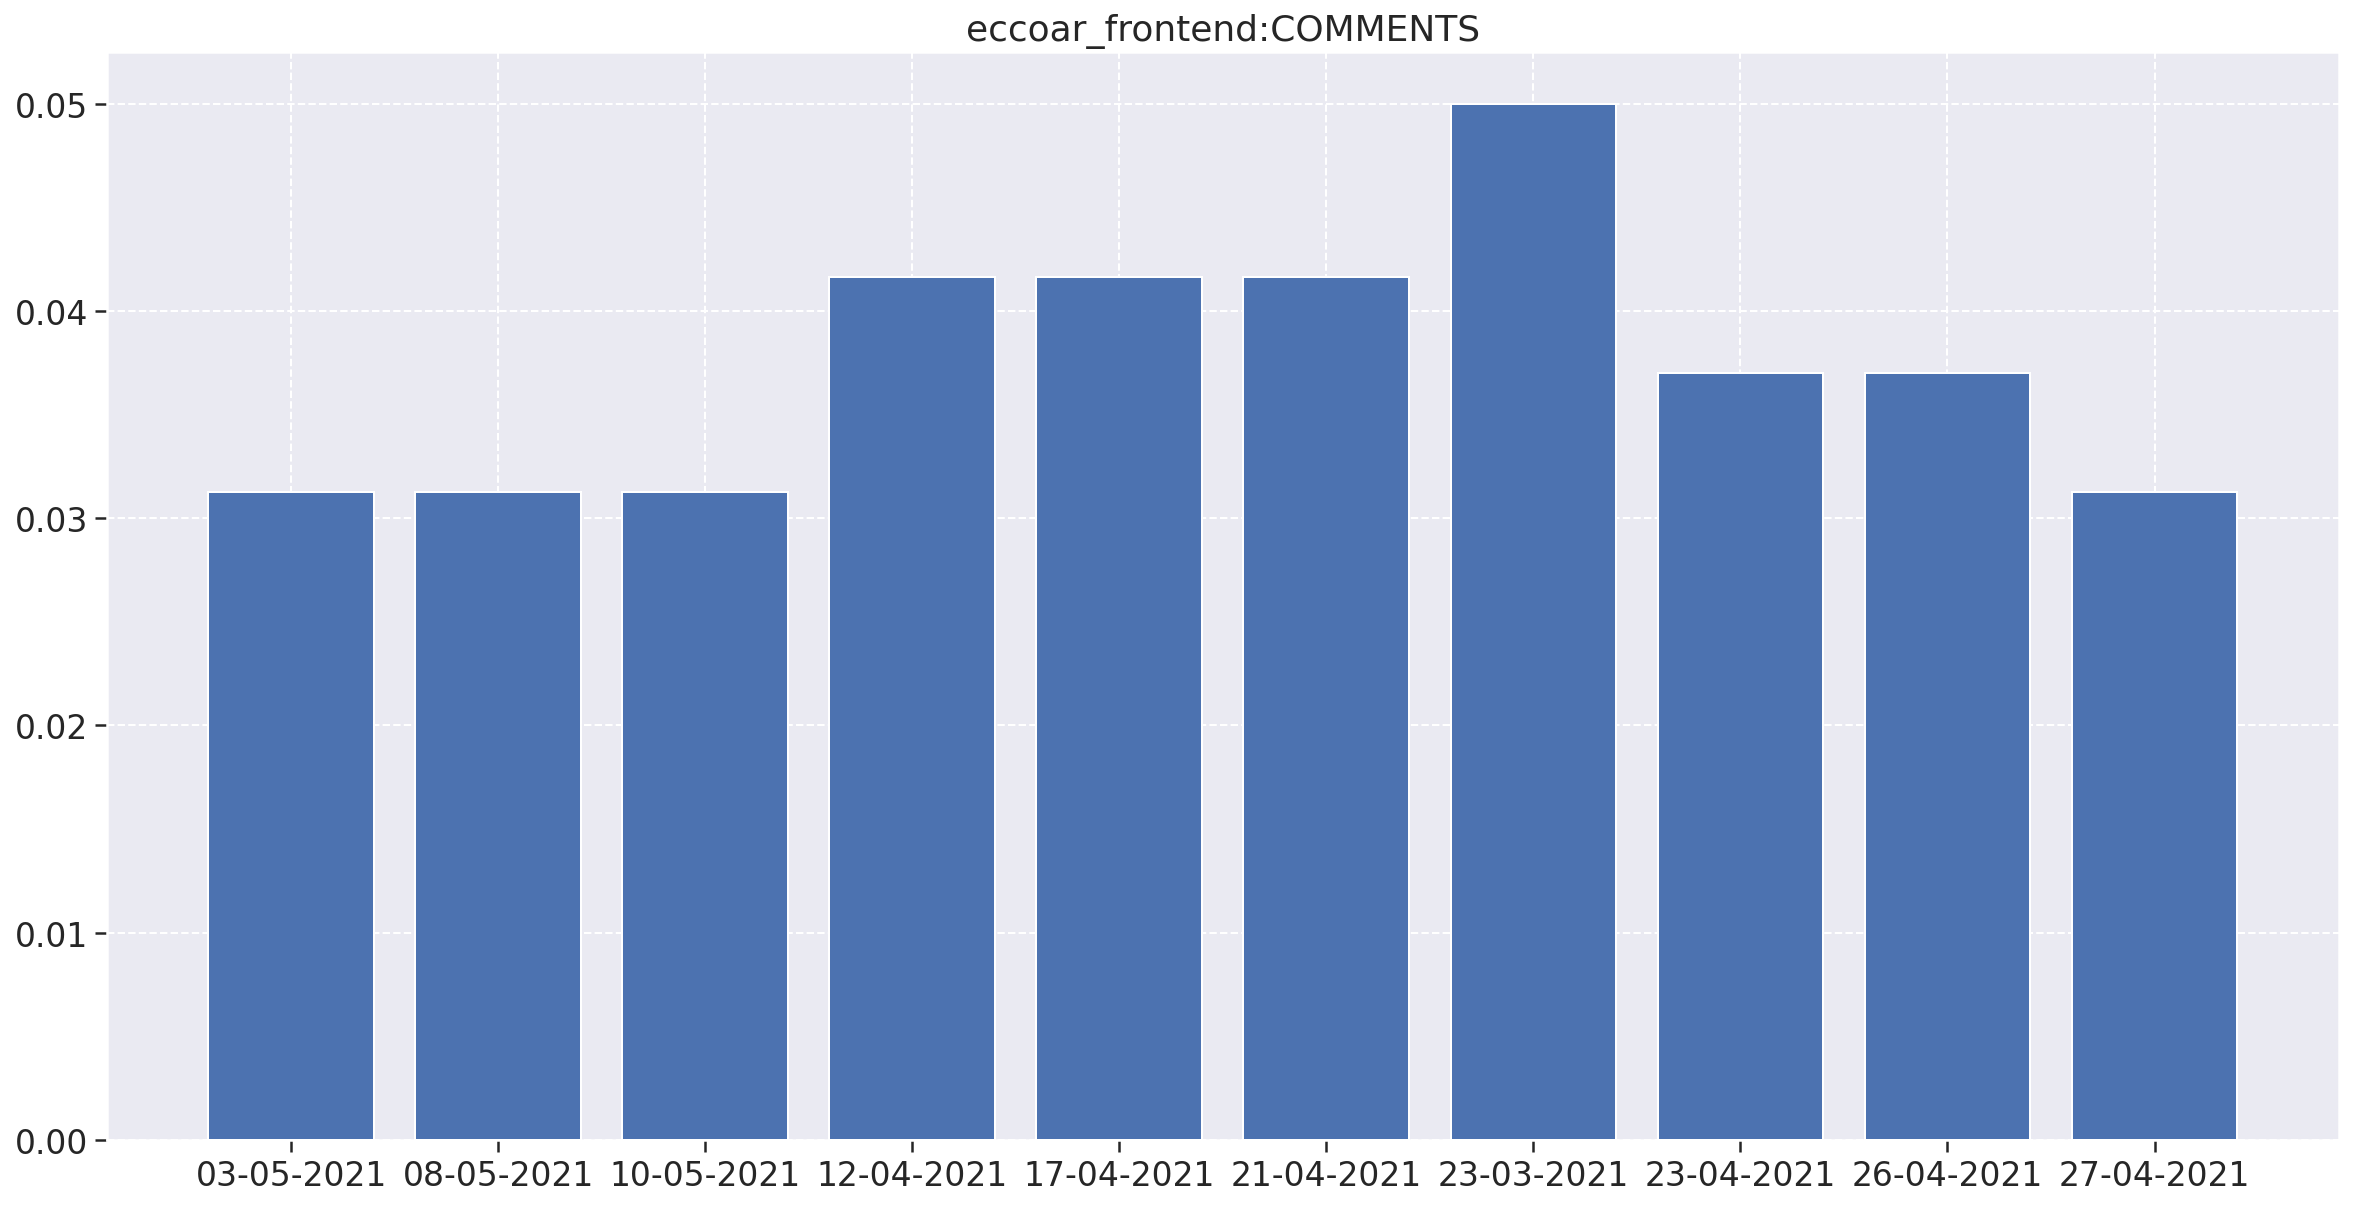

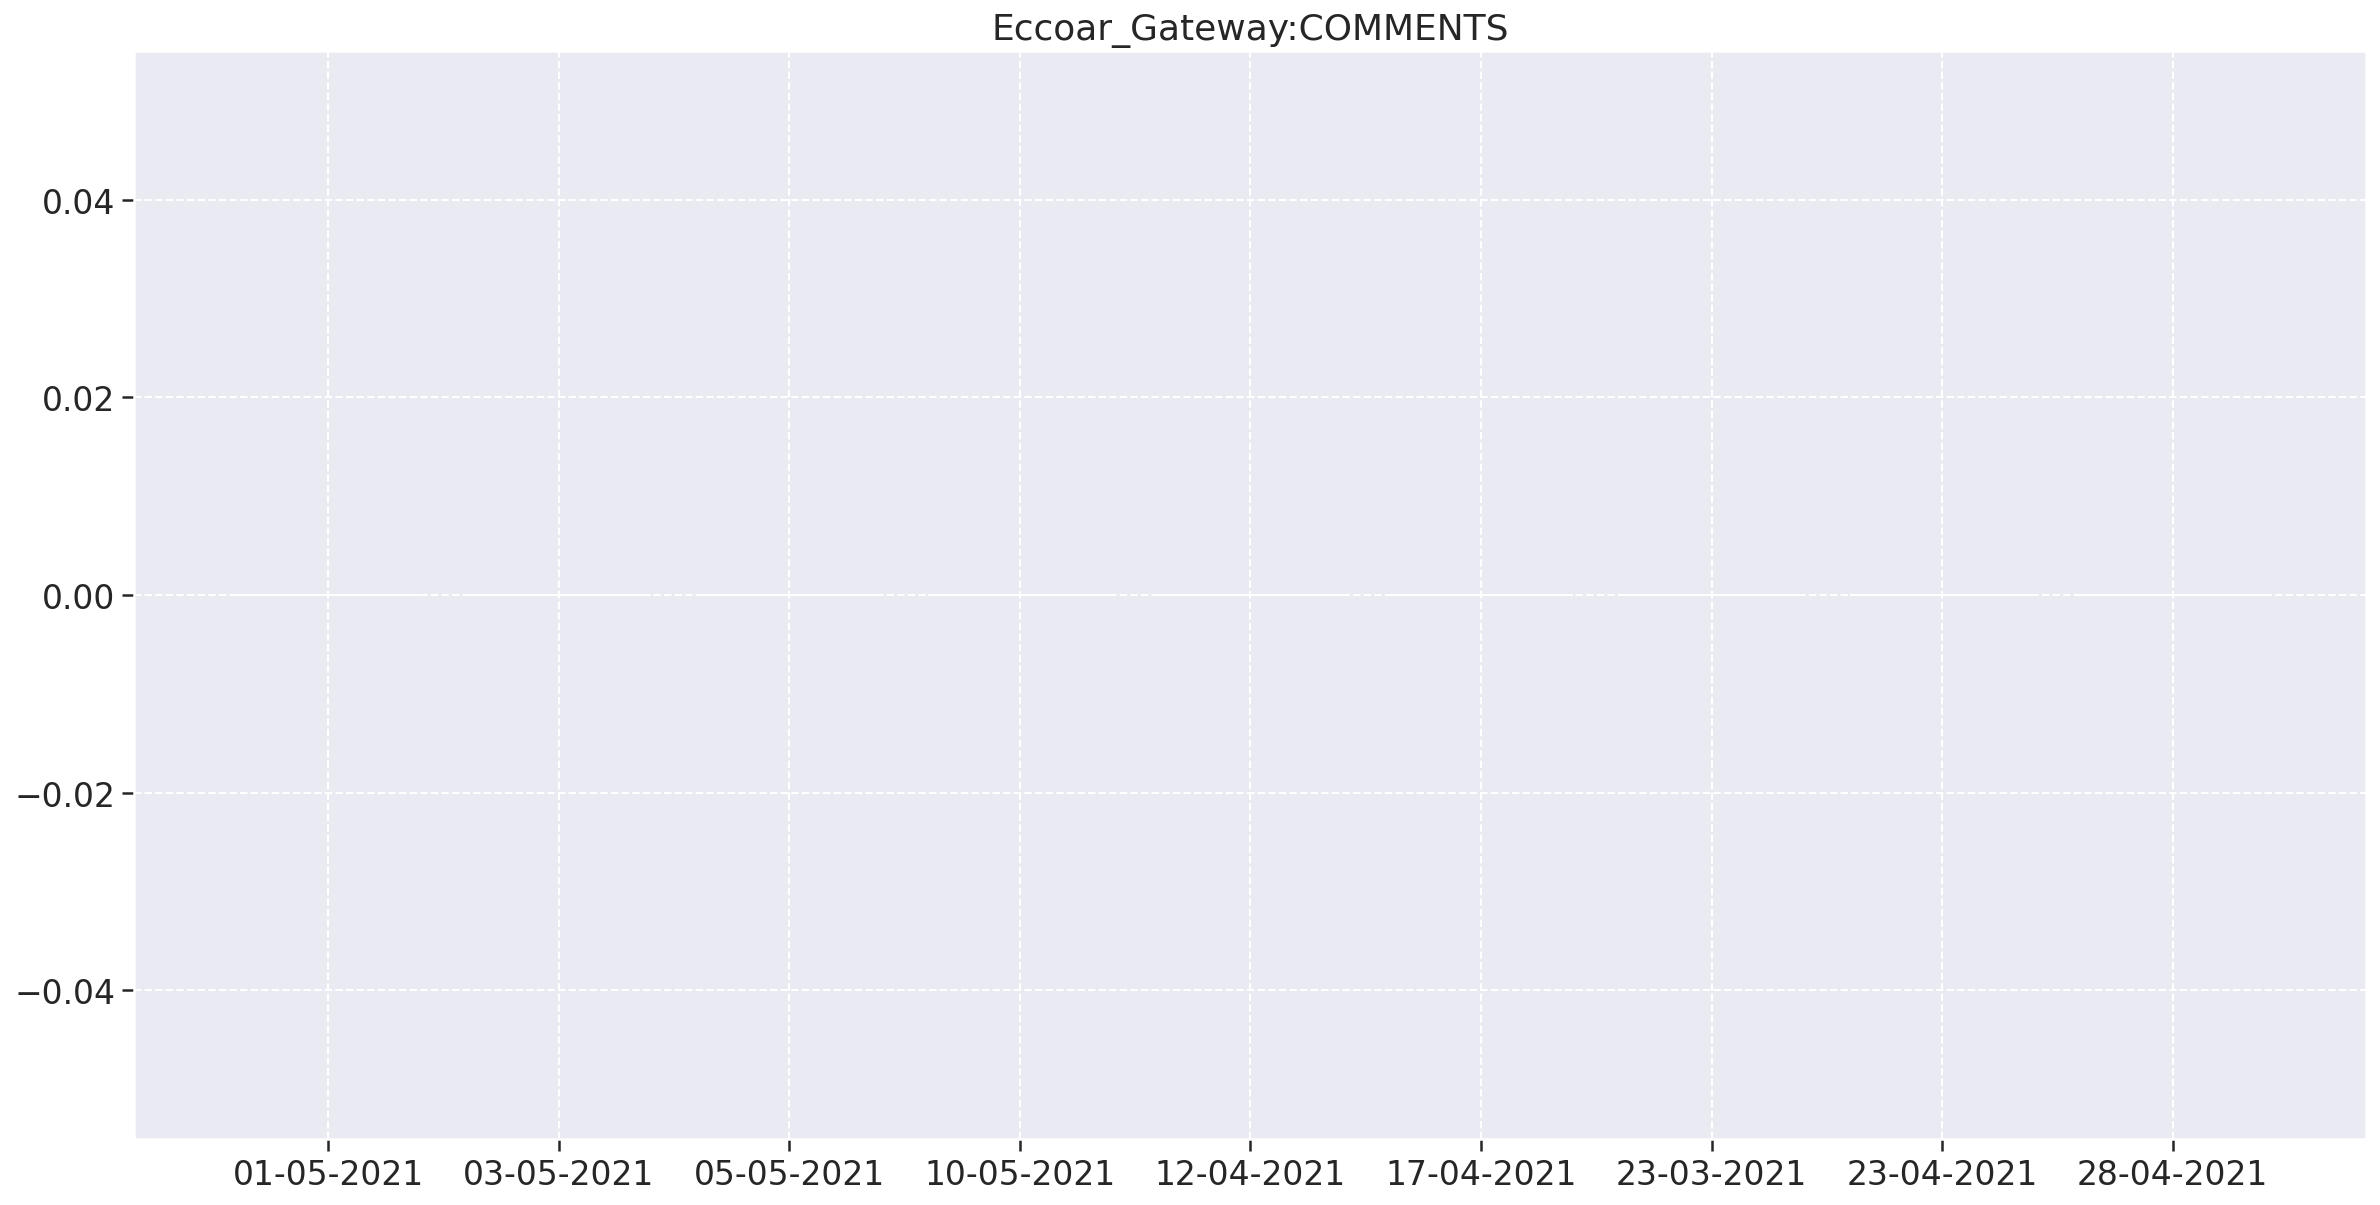

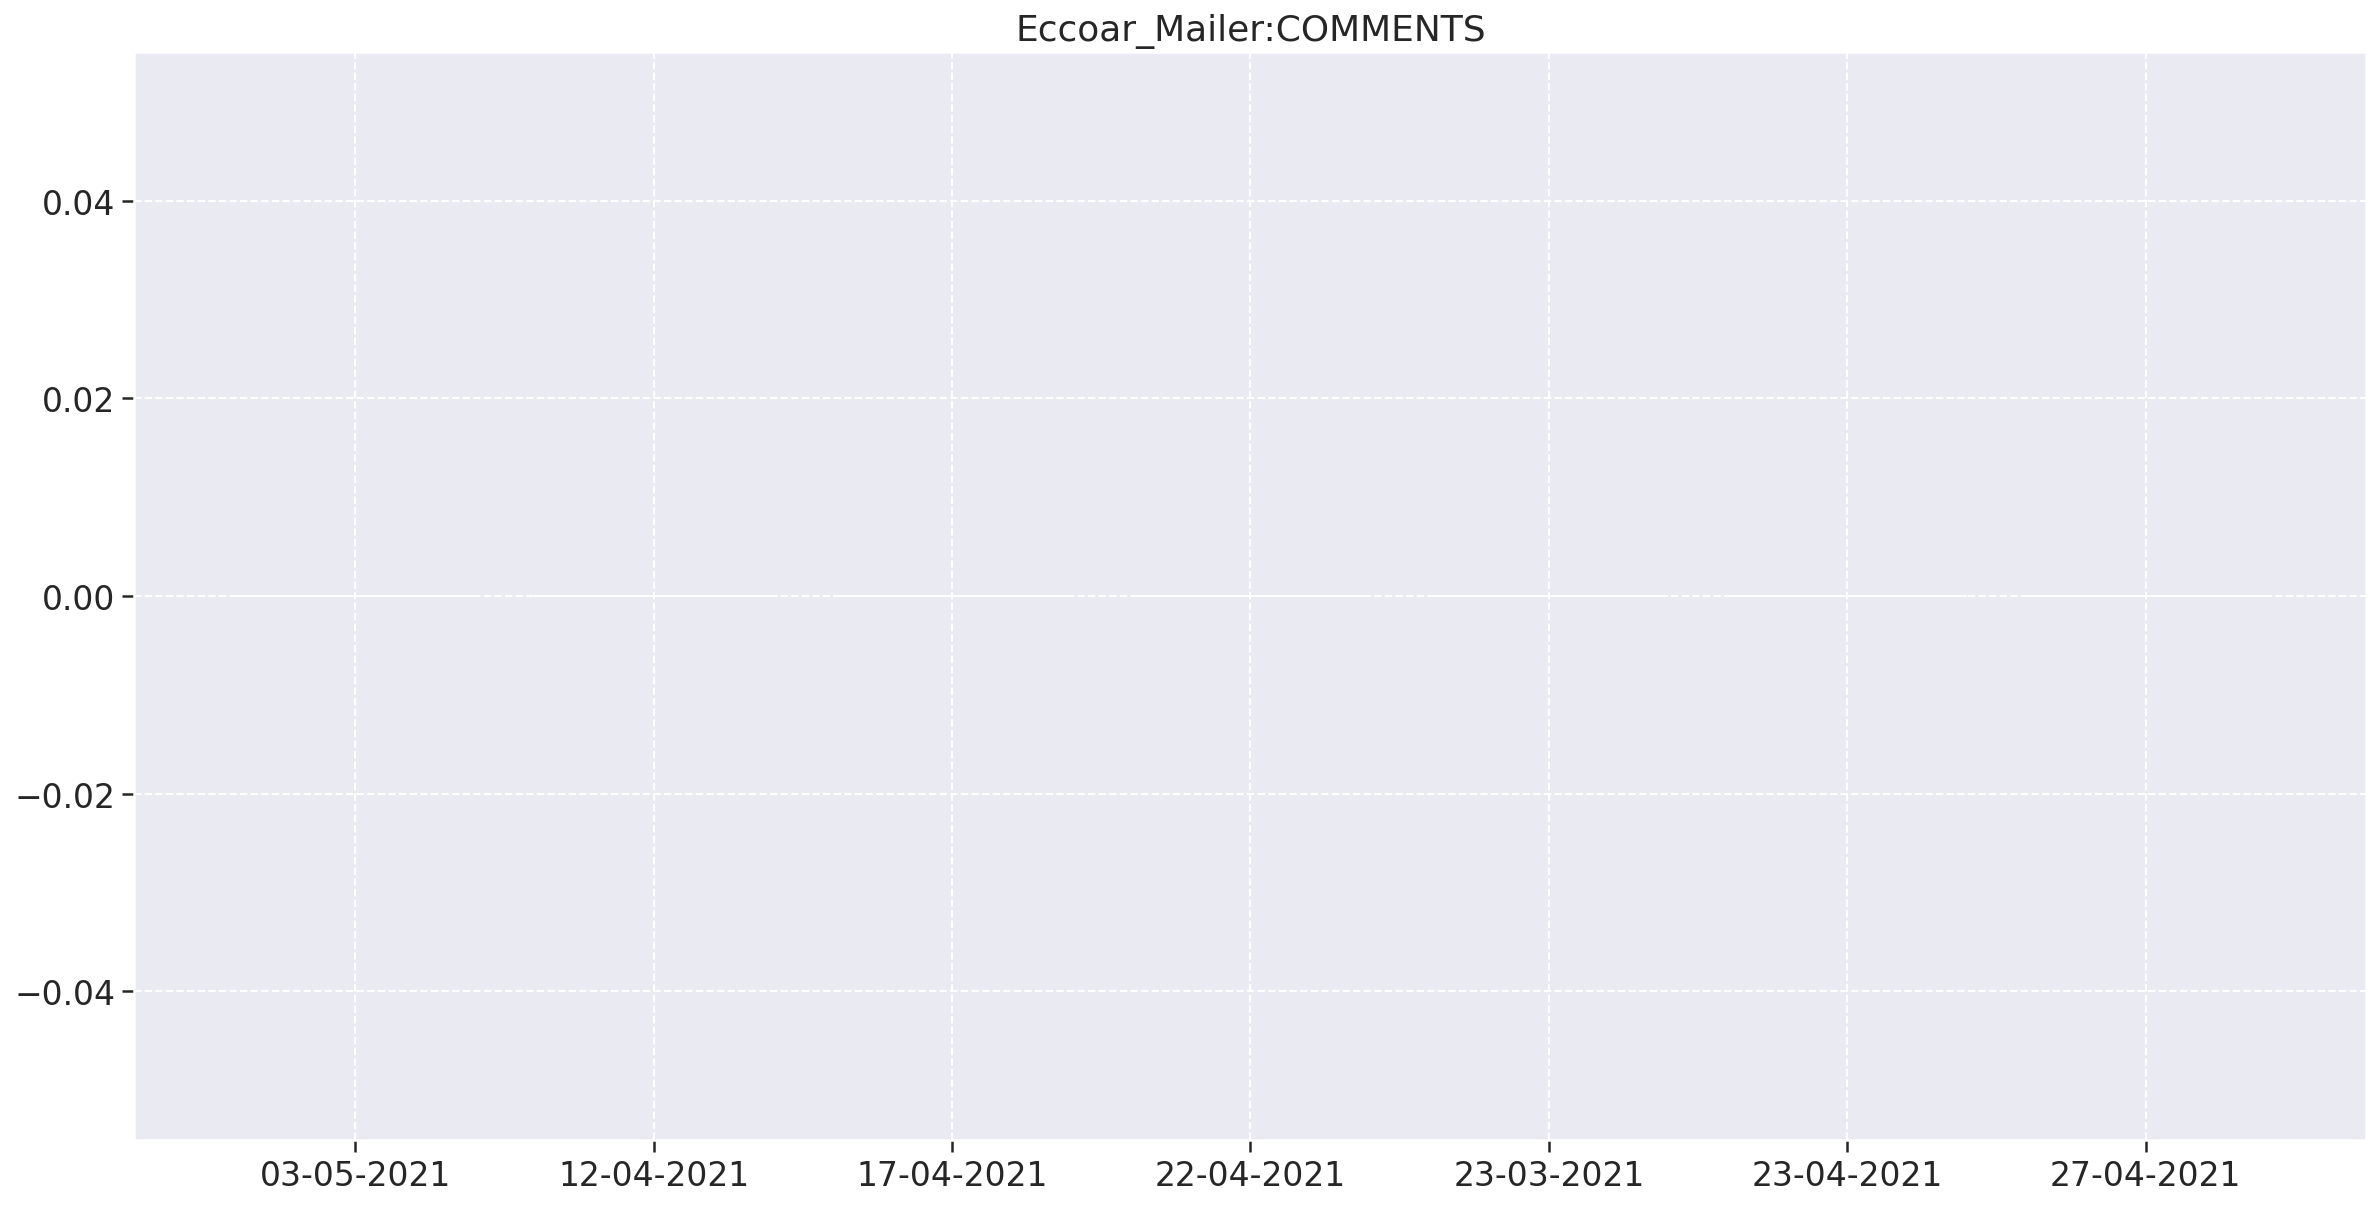

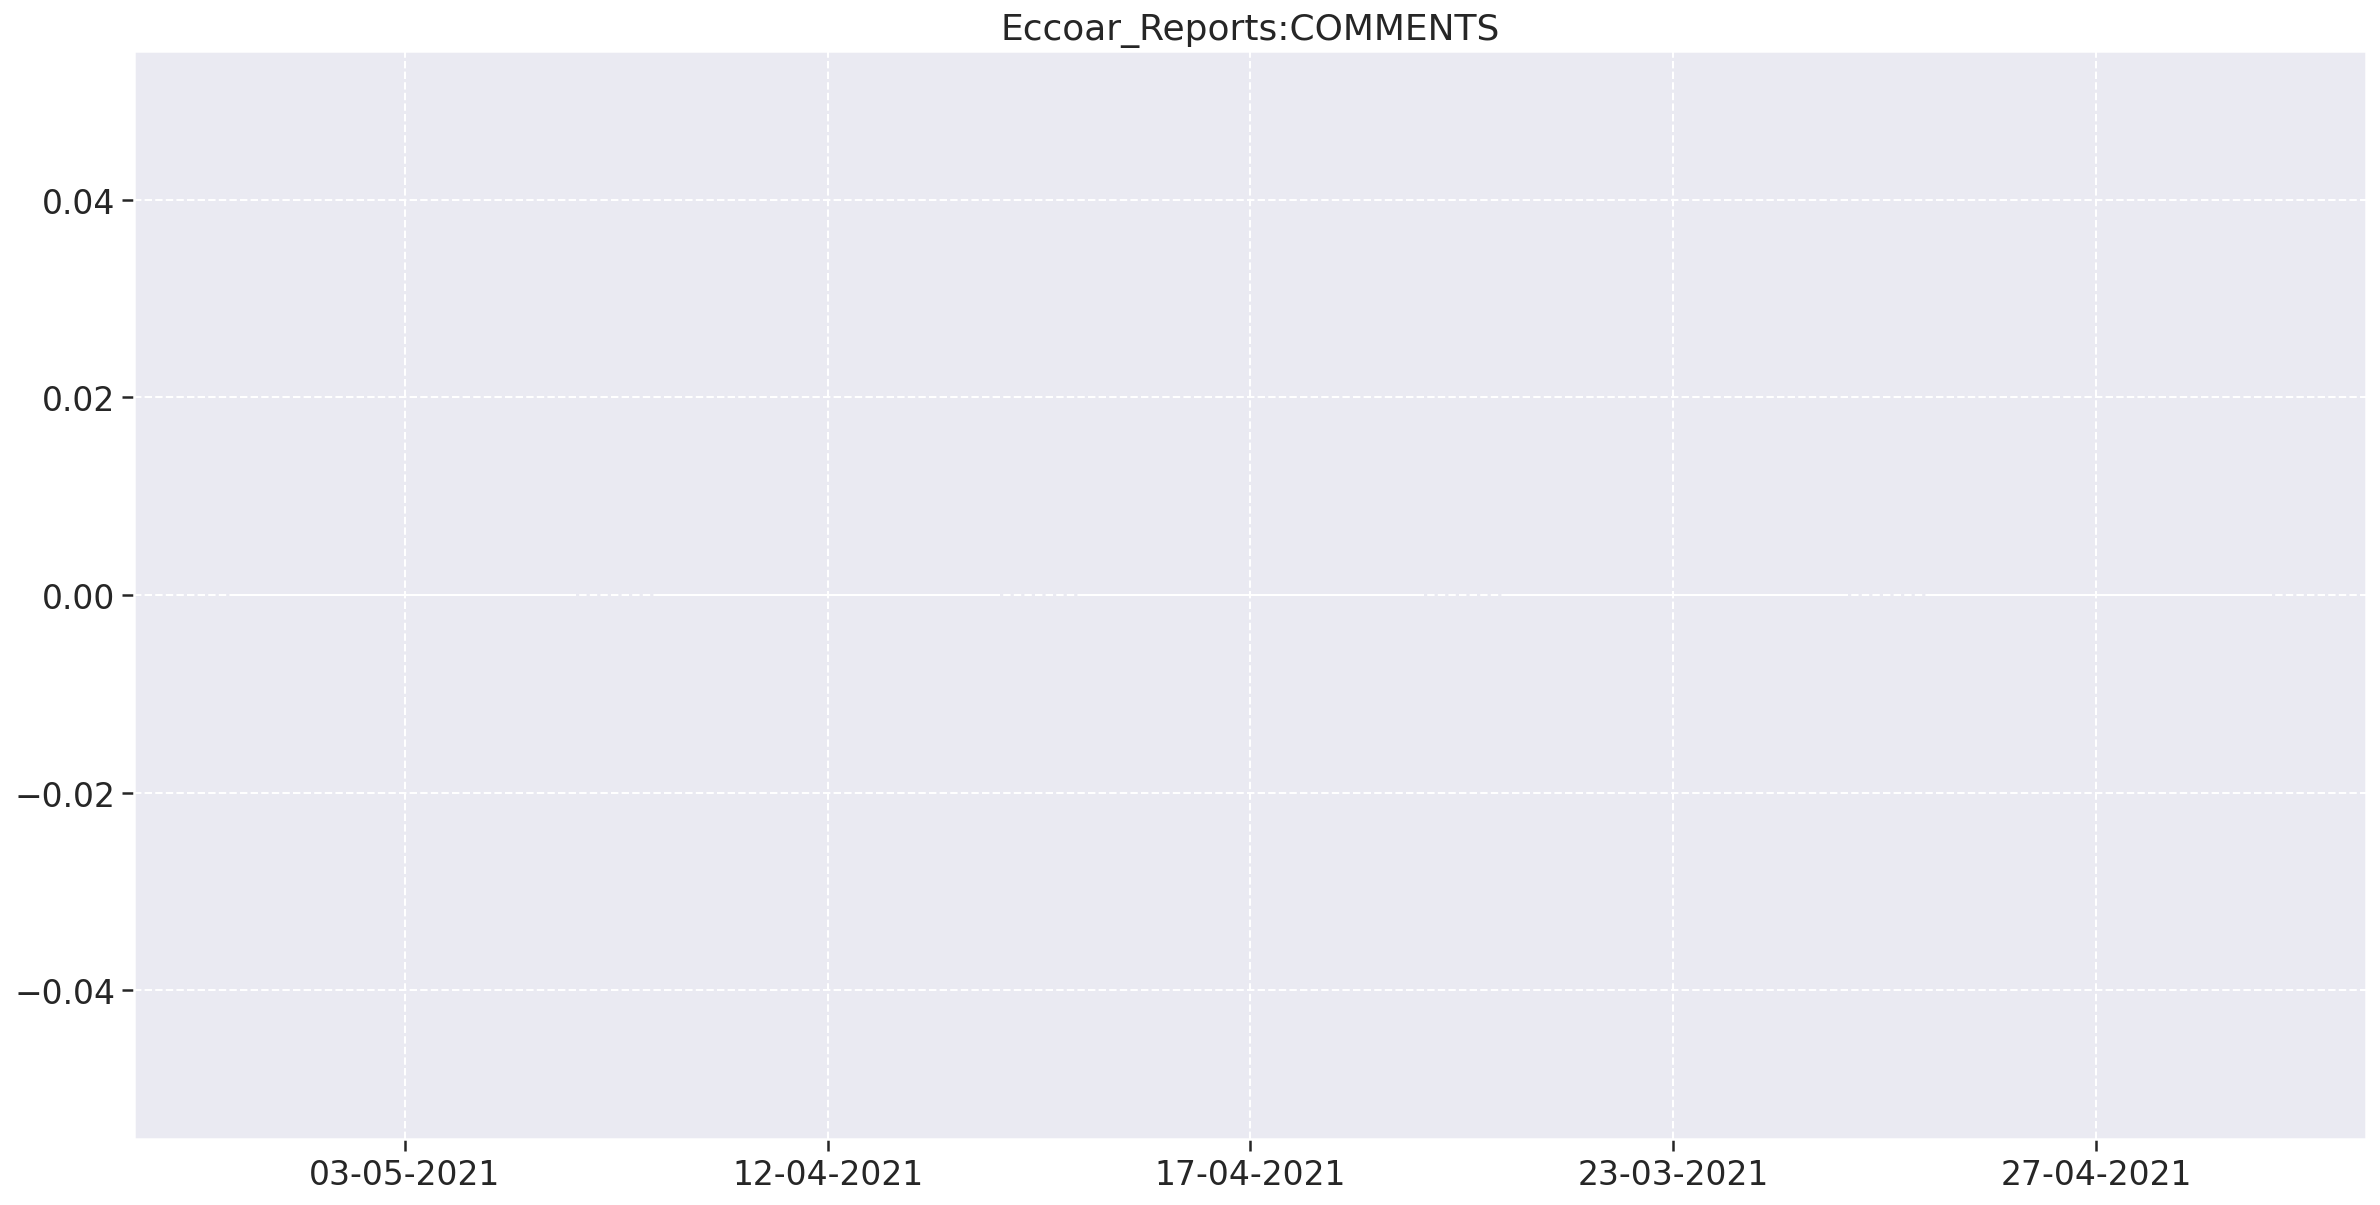

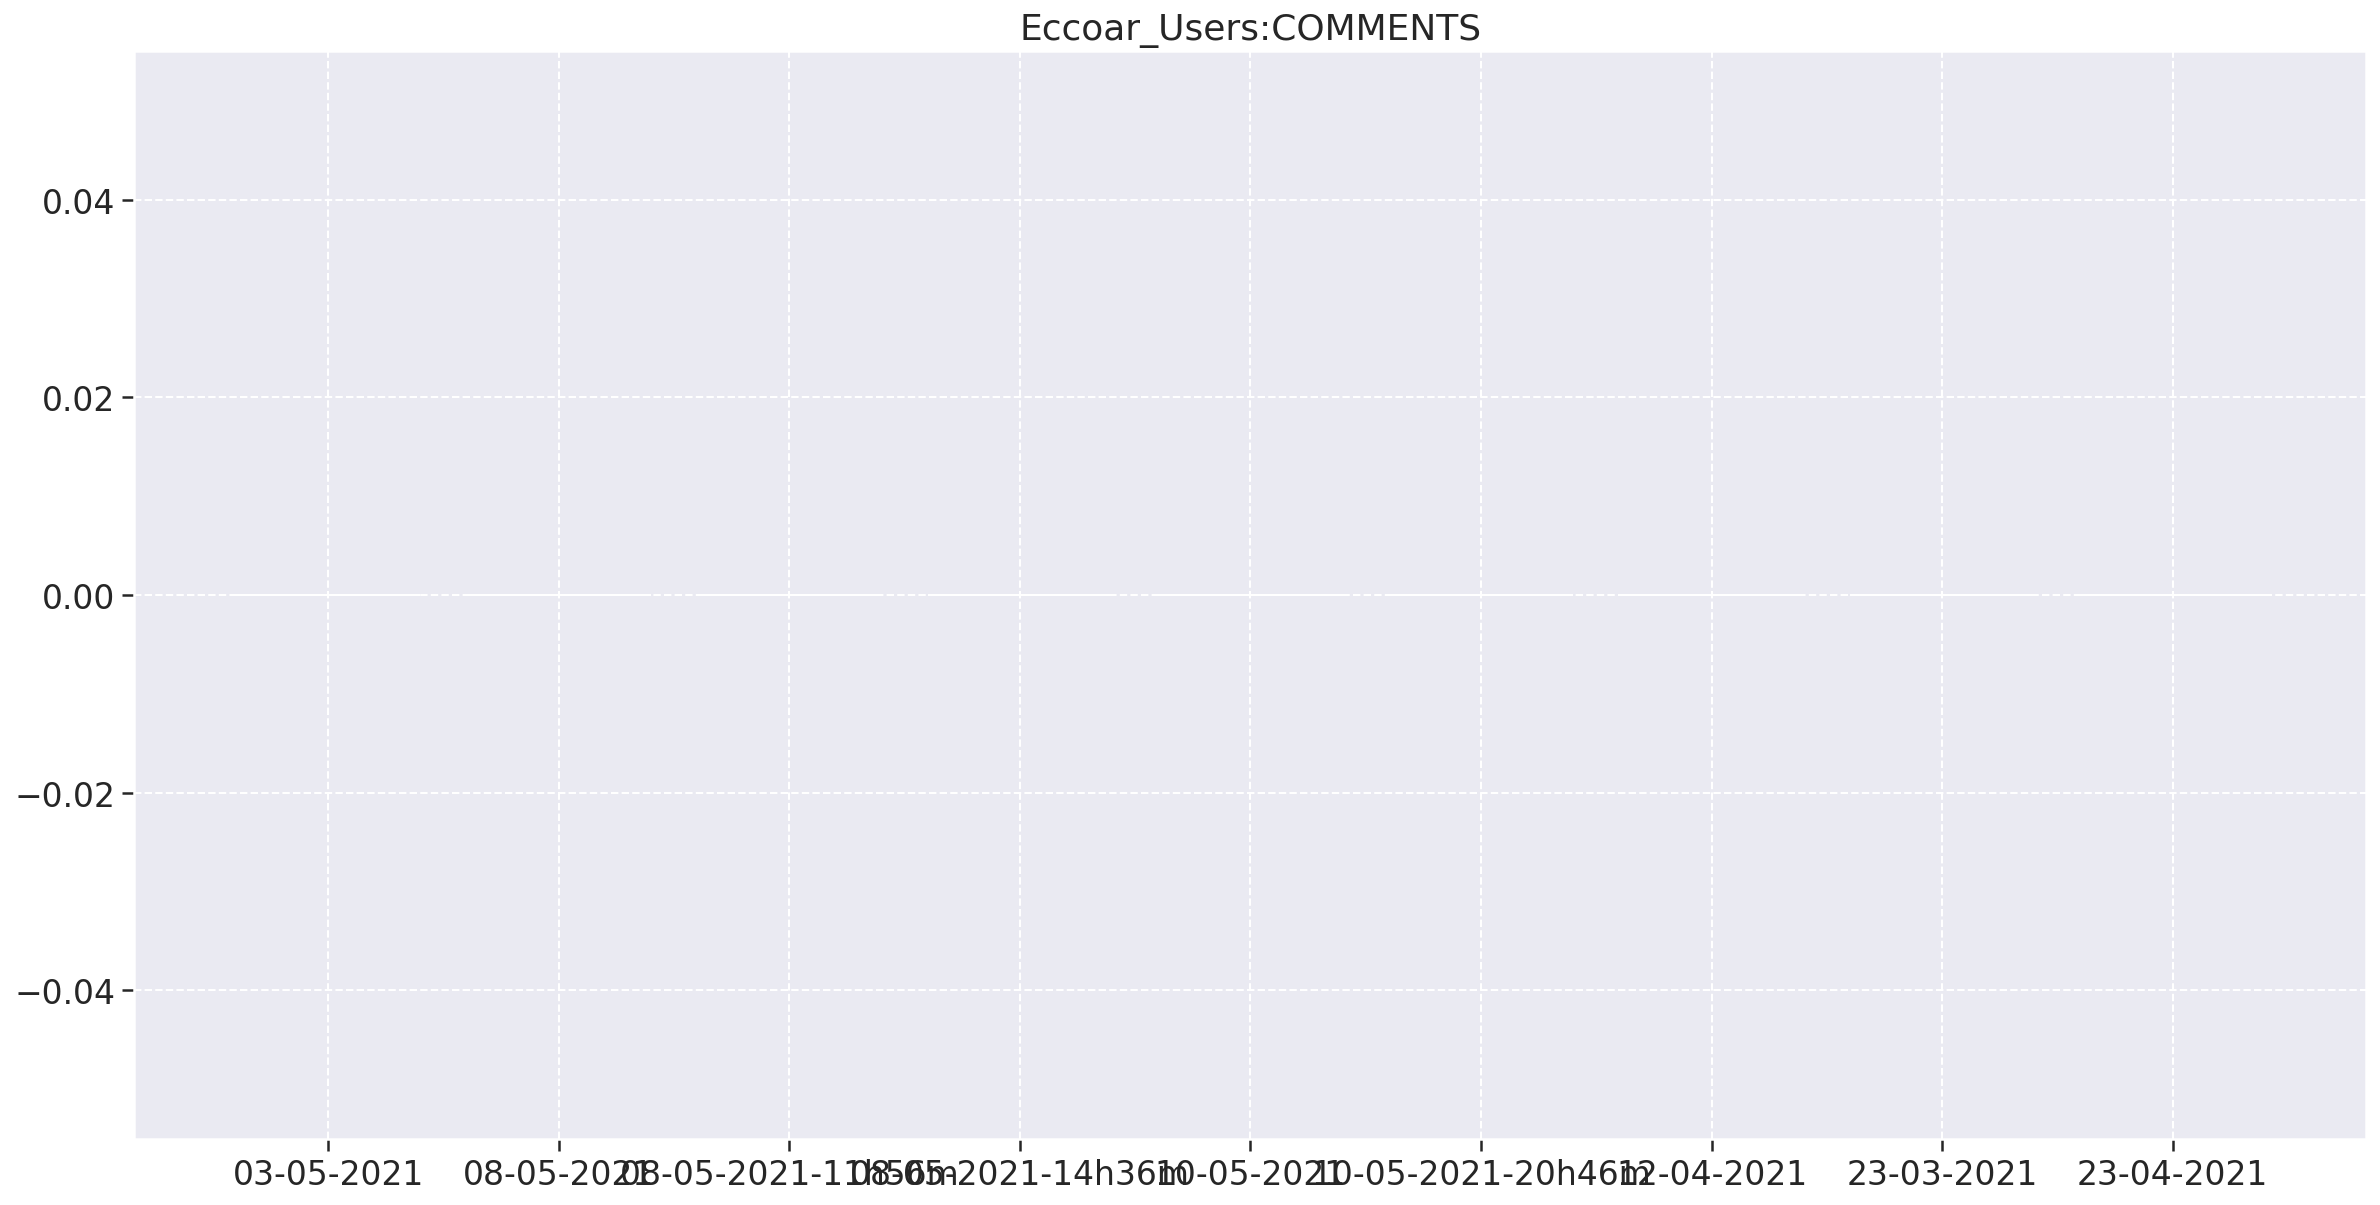

In [31]:
generate_histogram('m2', 'COMMENTS', 'b')

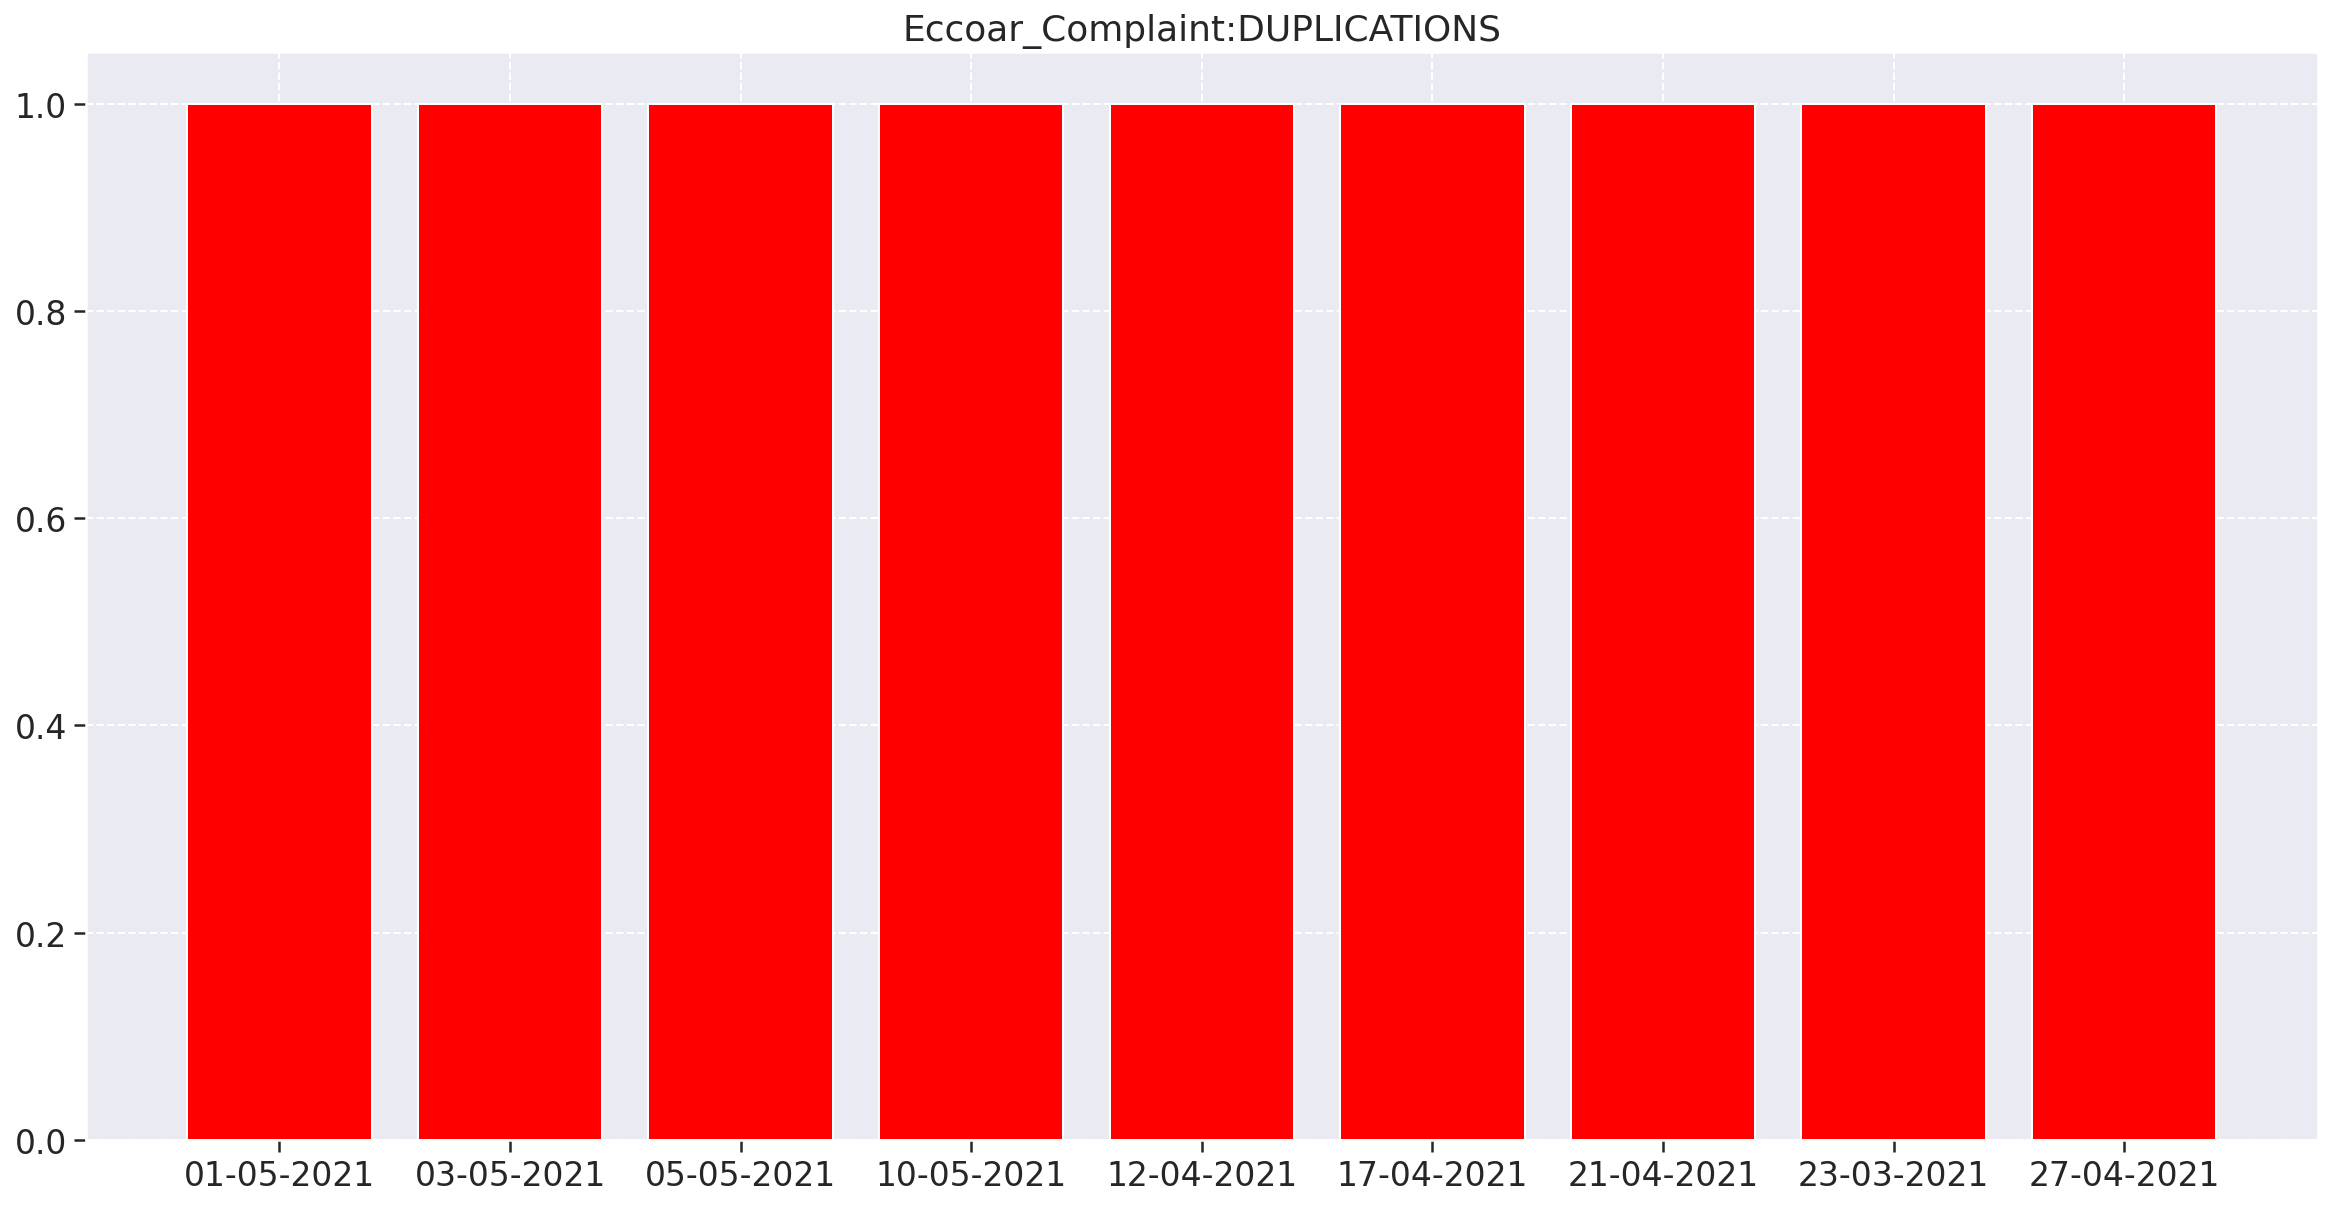

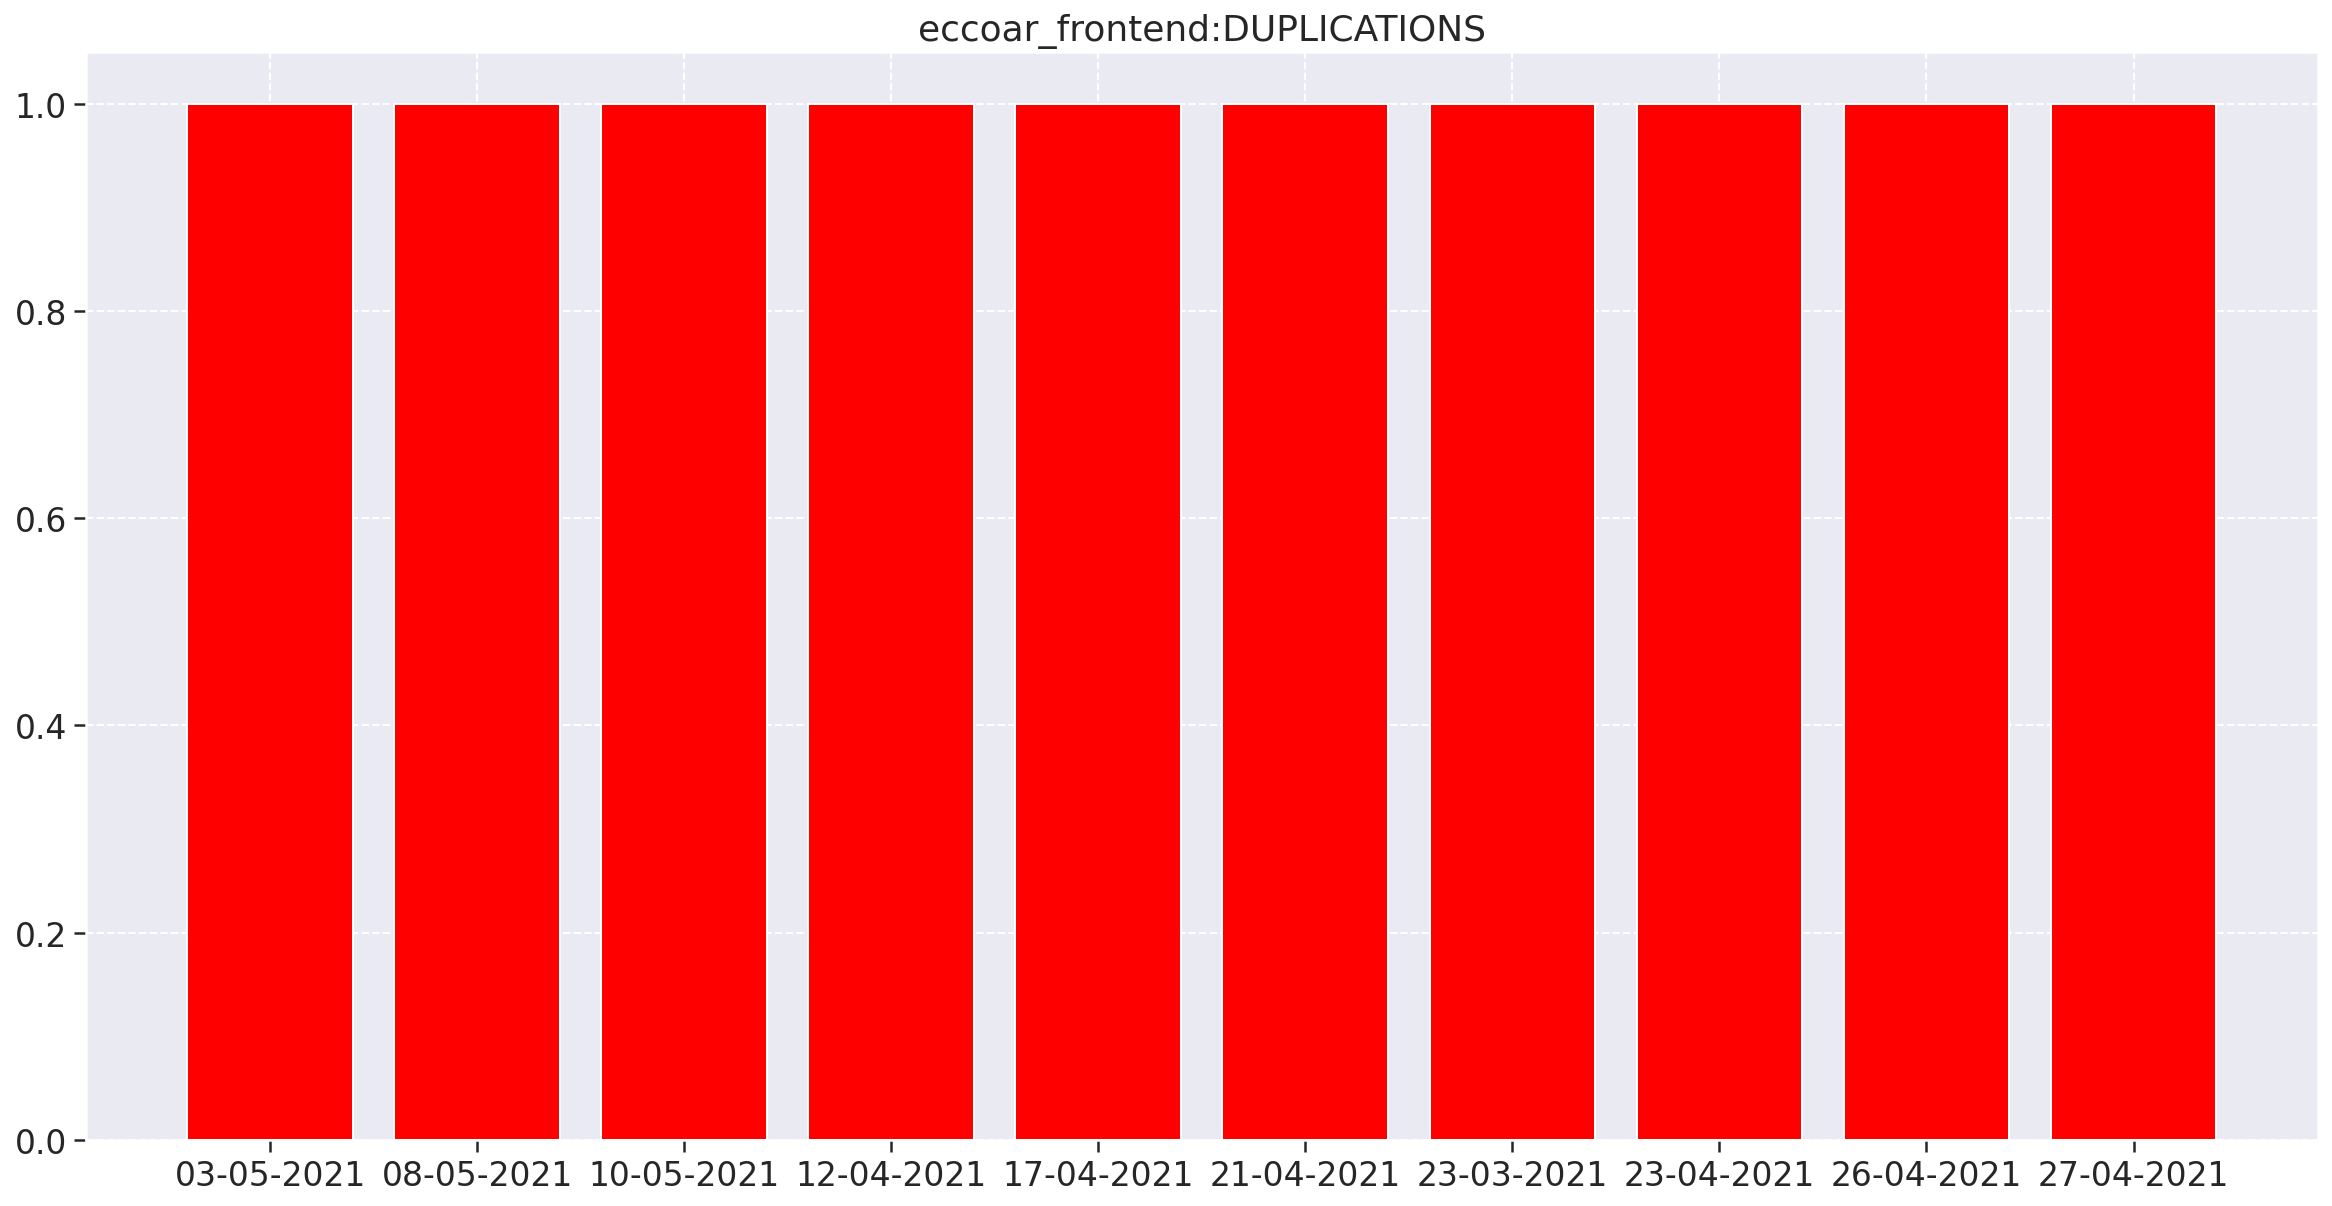

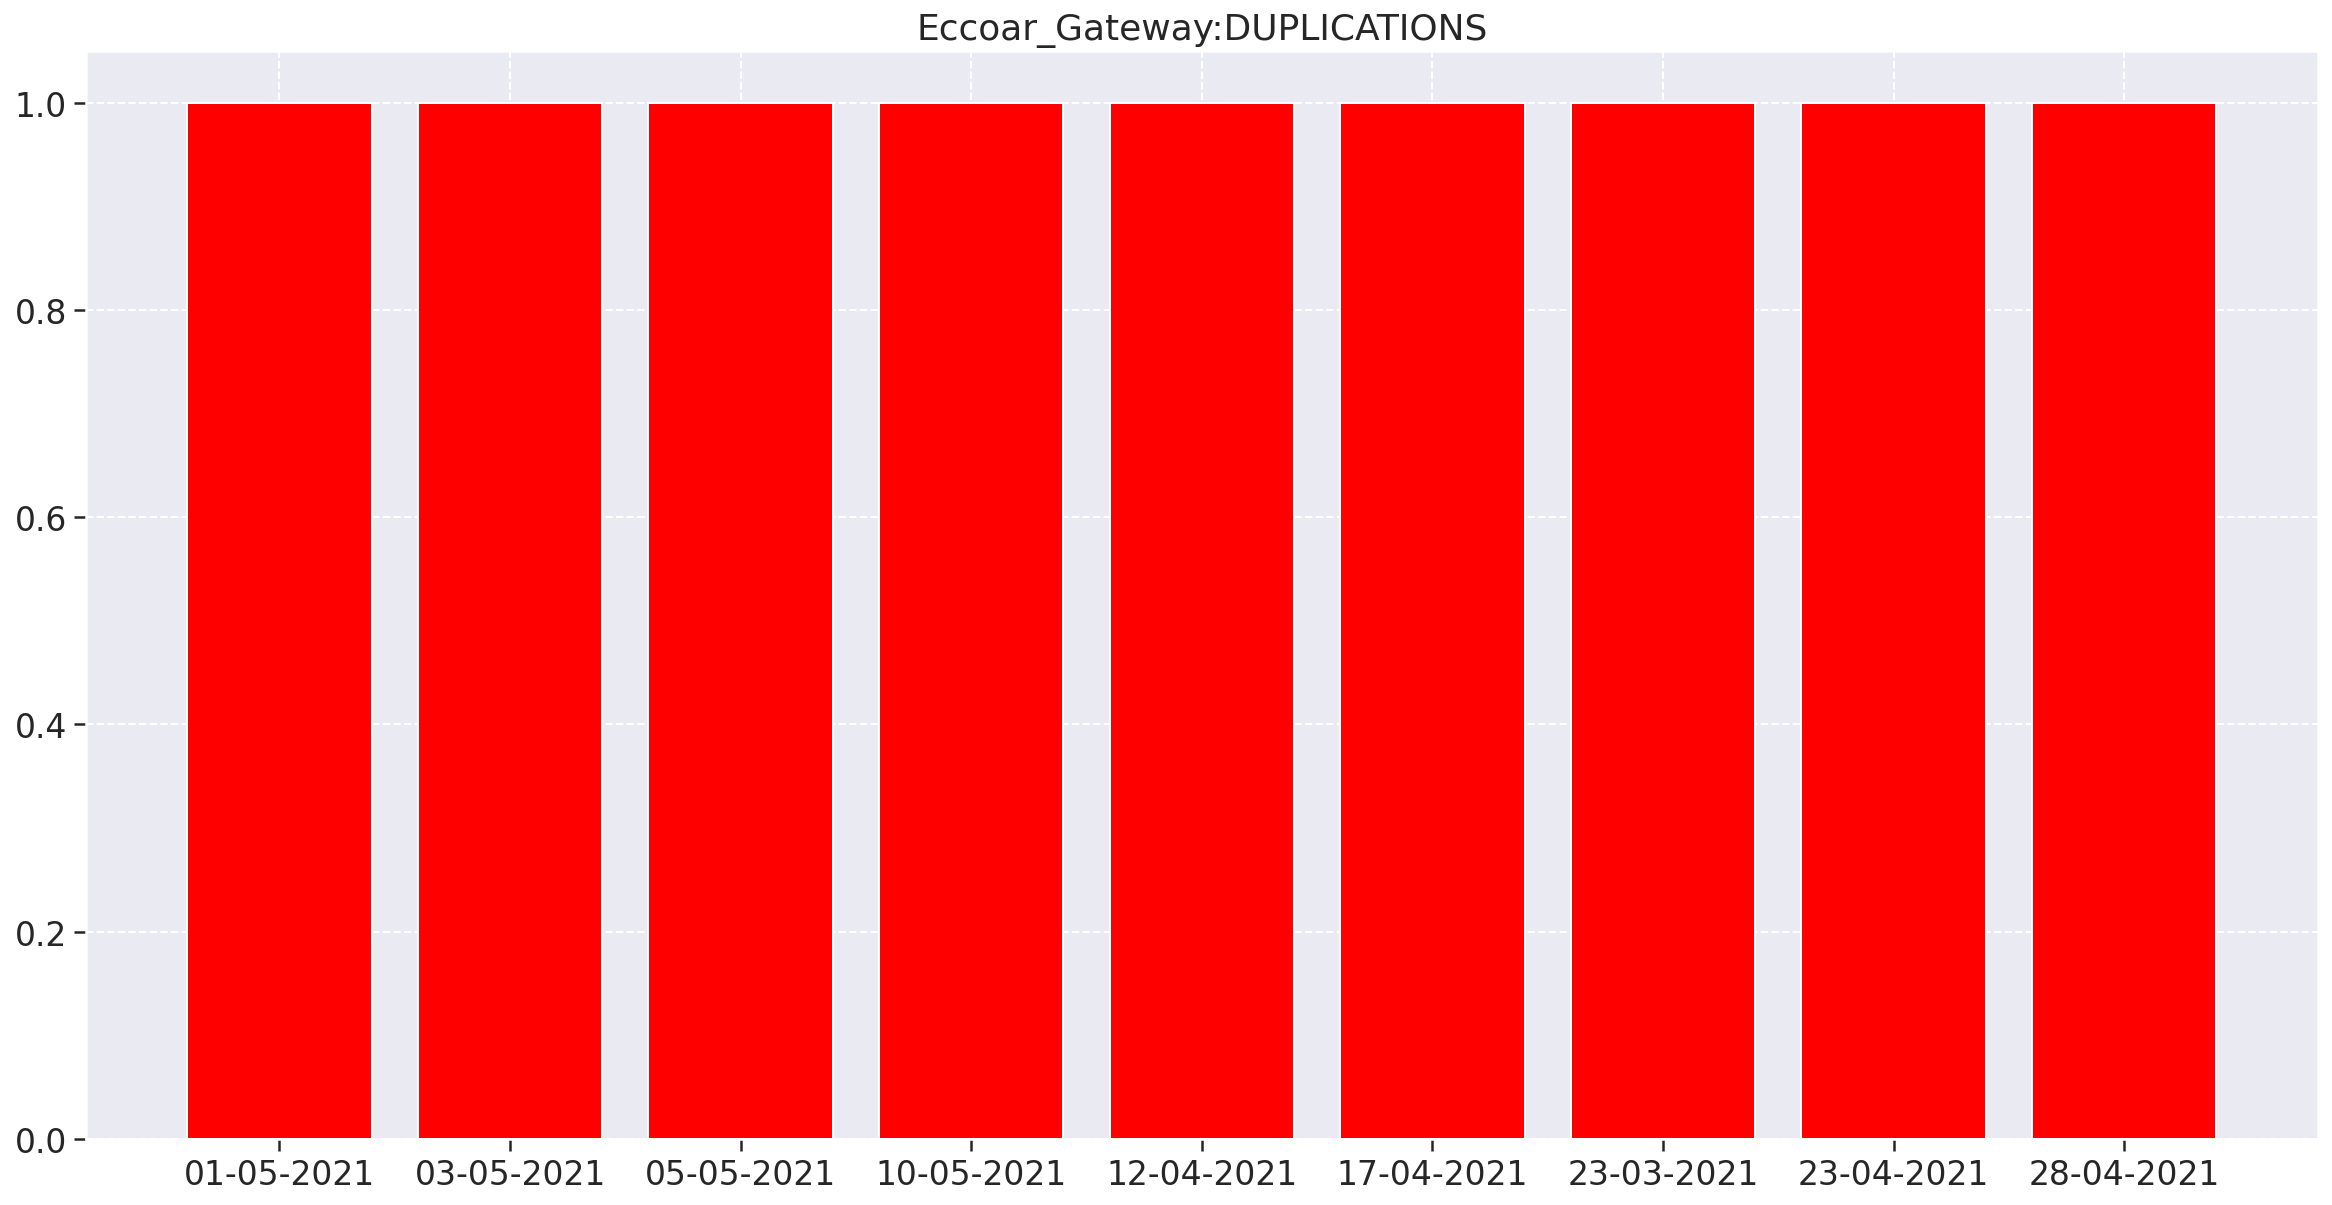

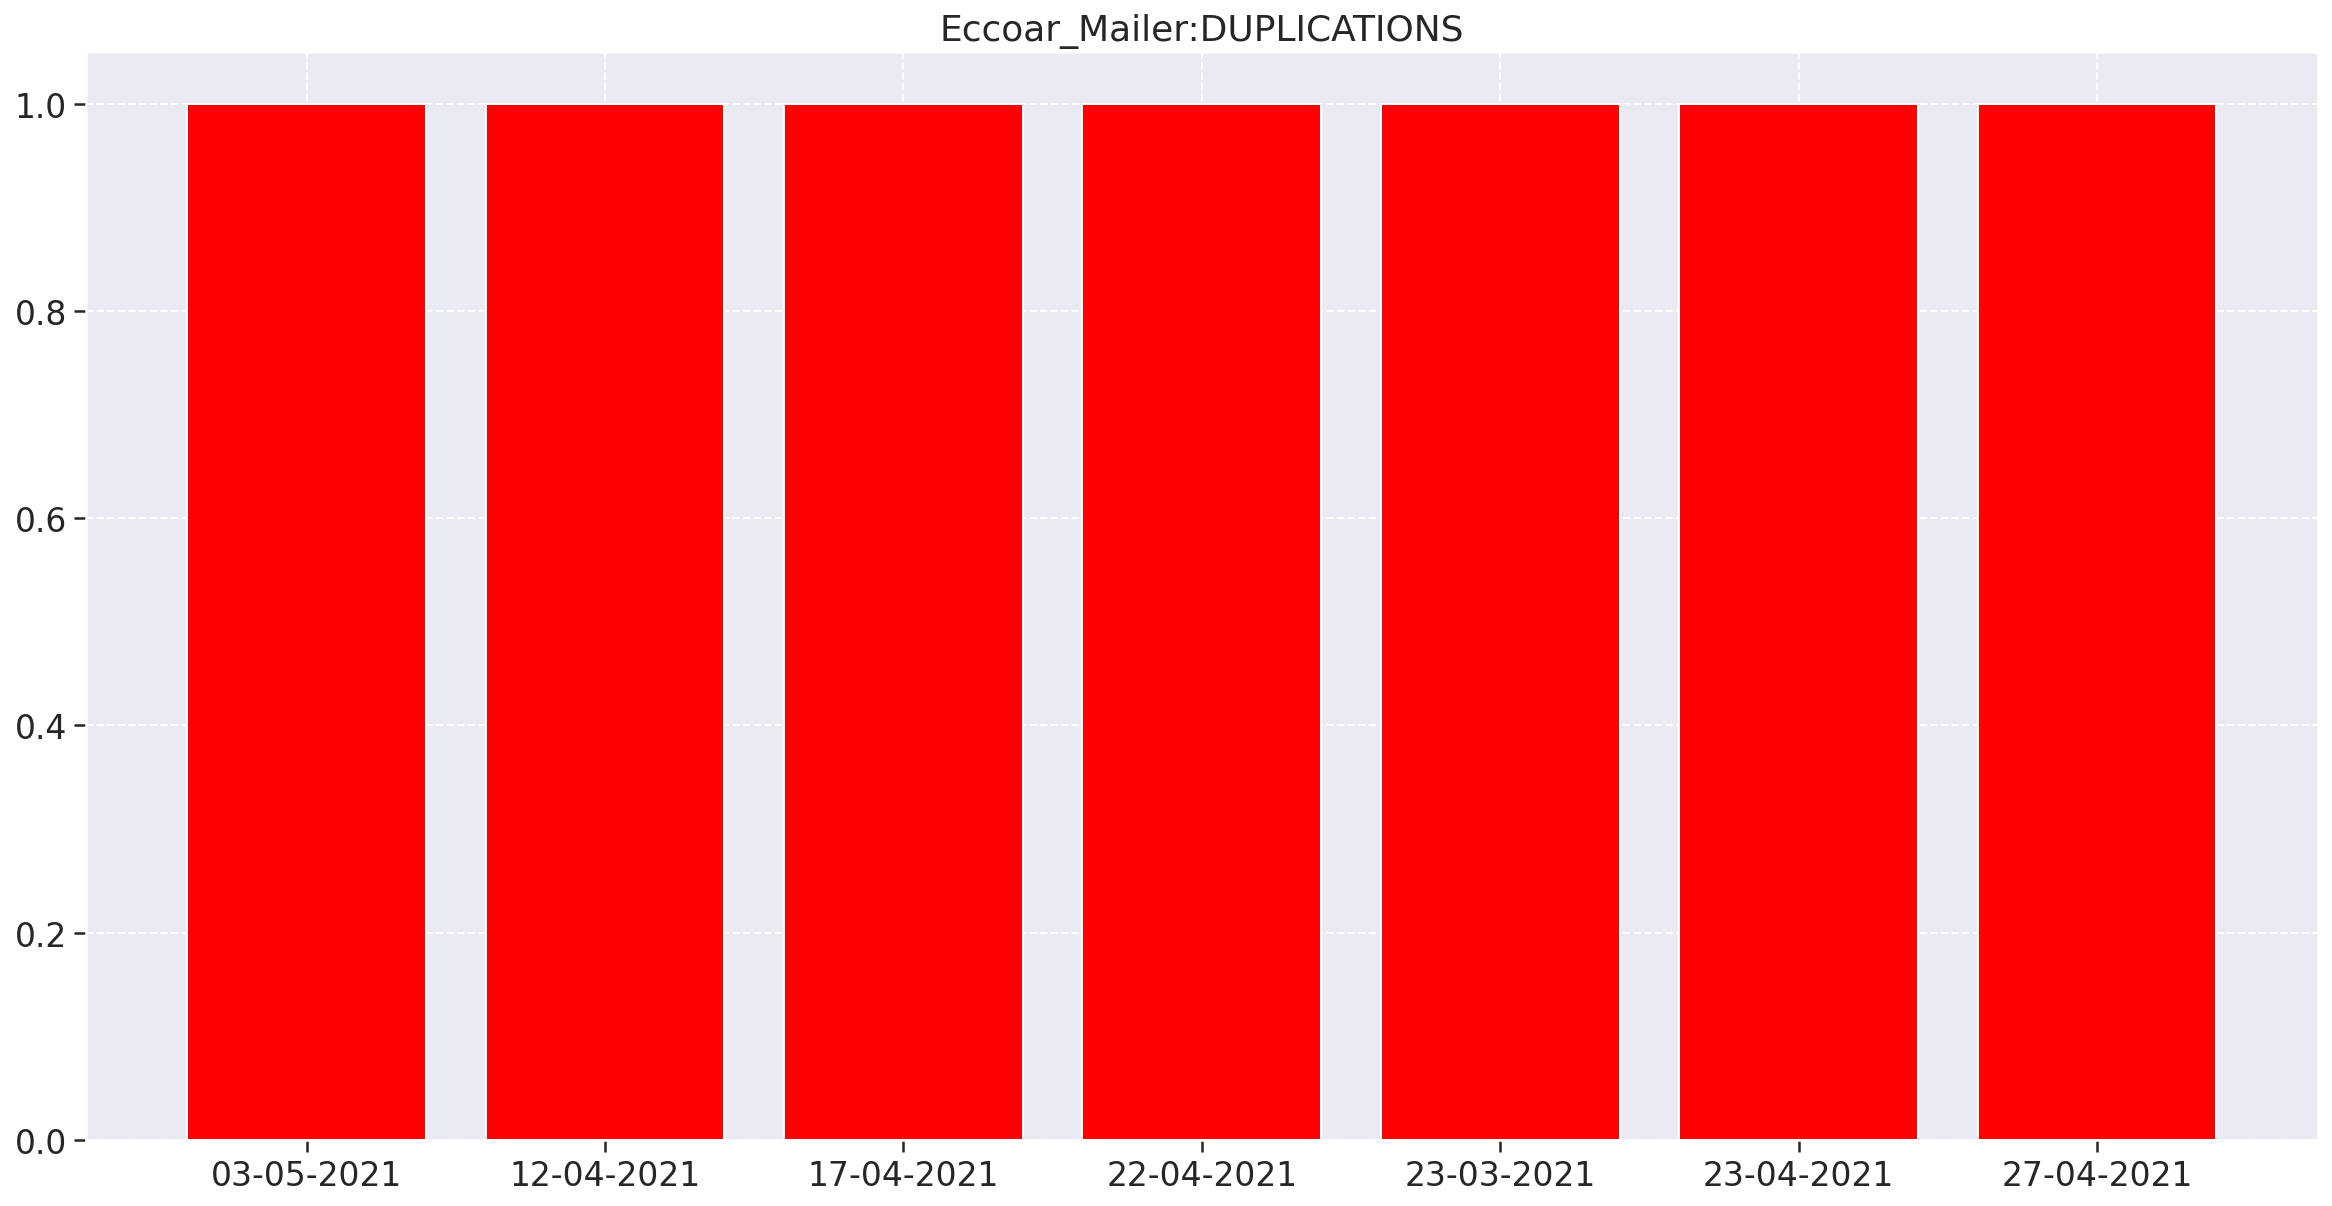

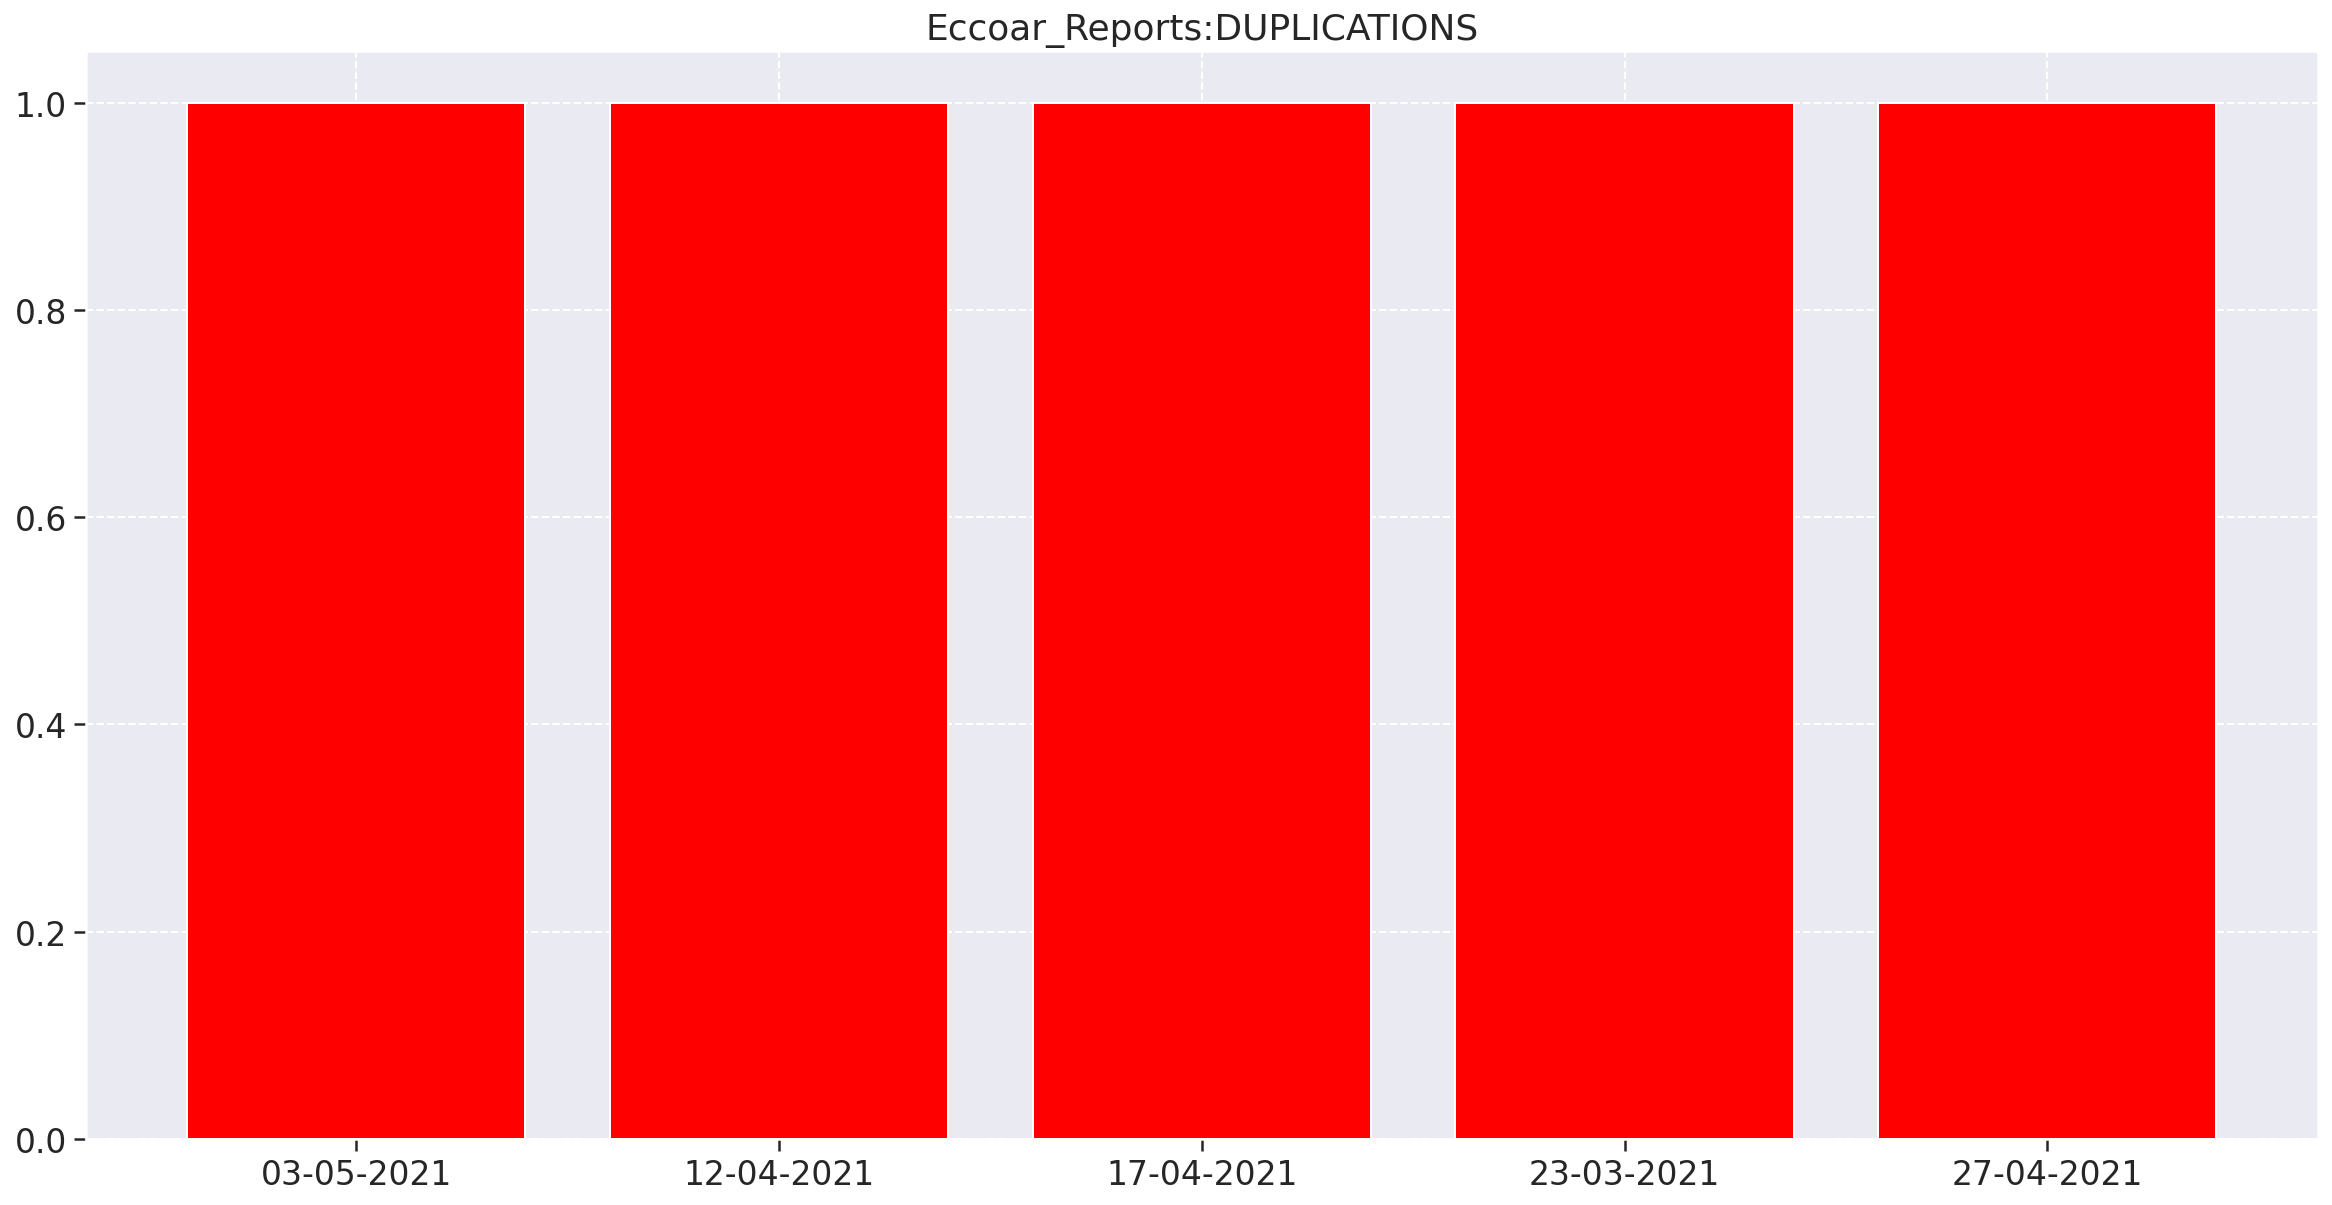

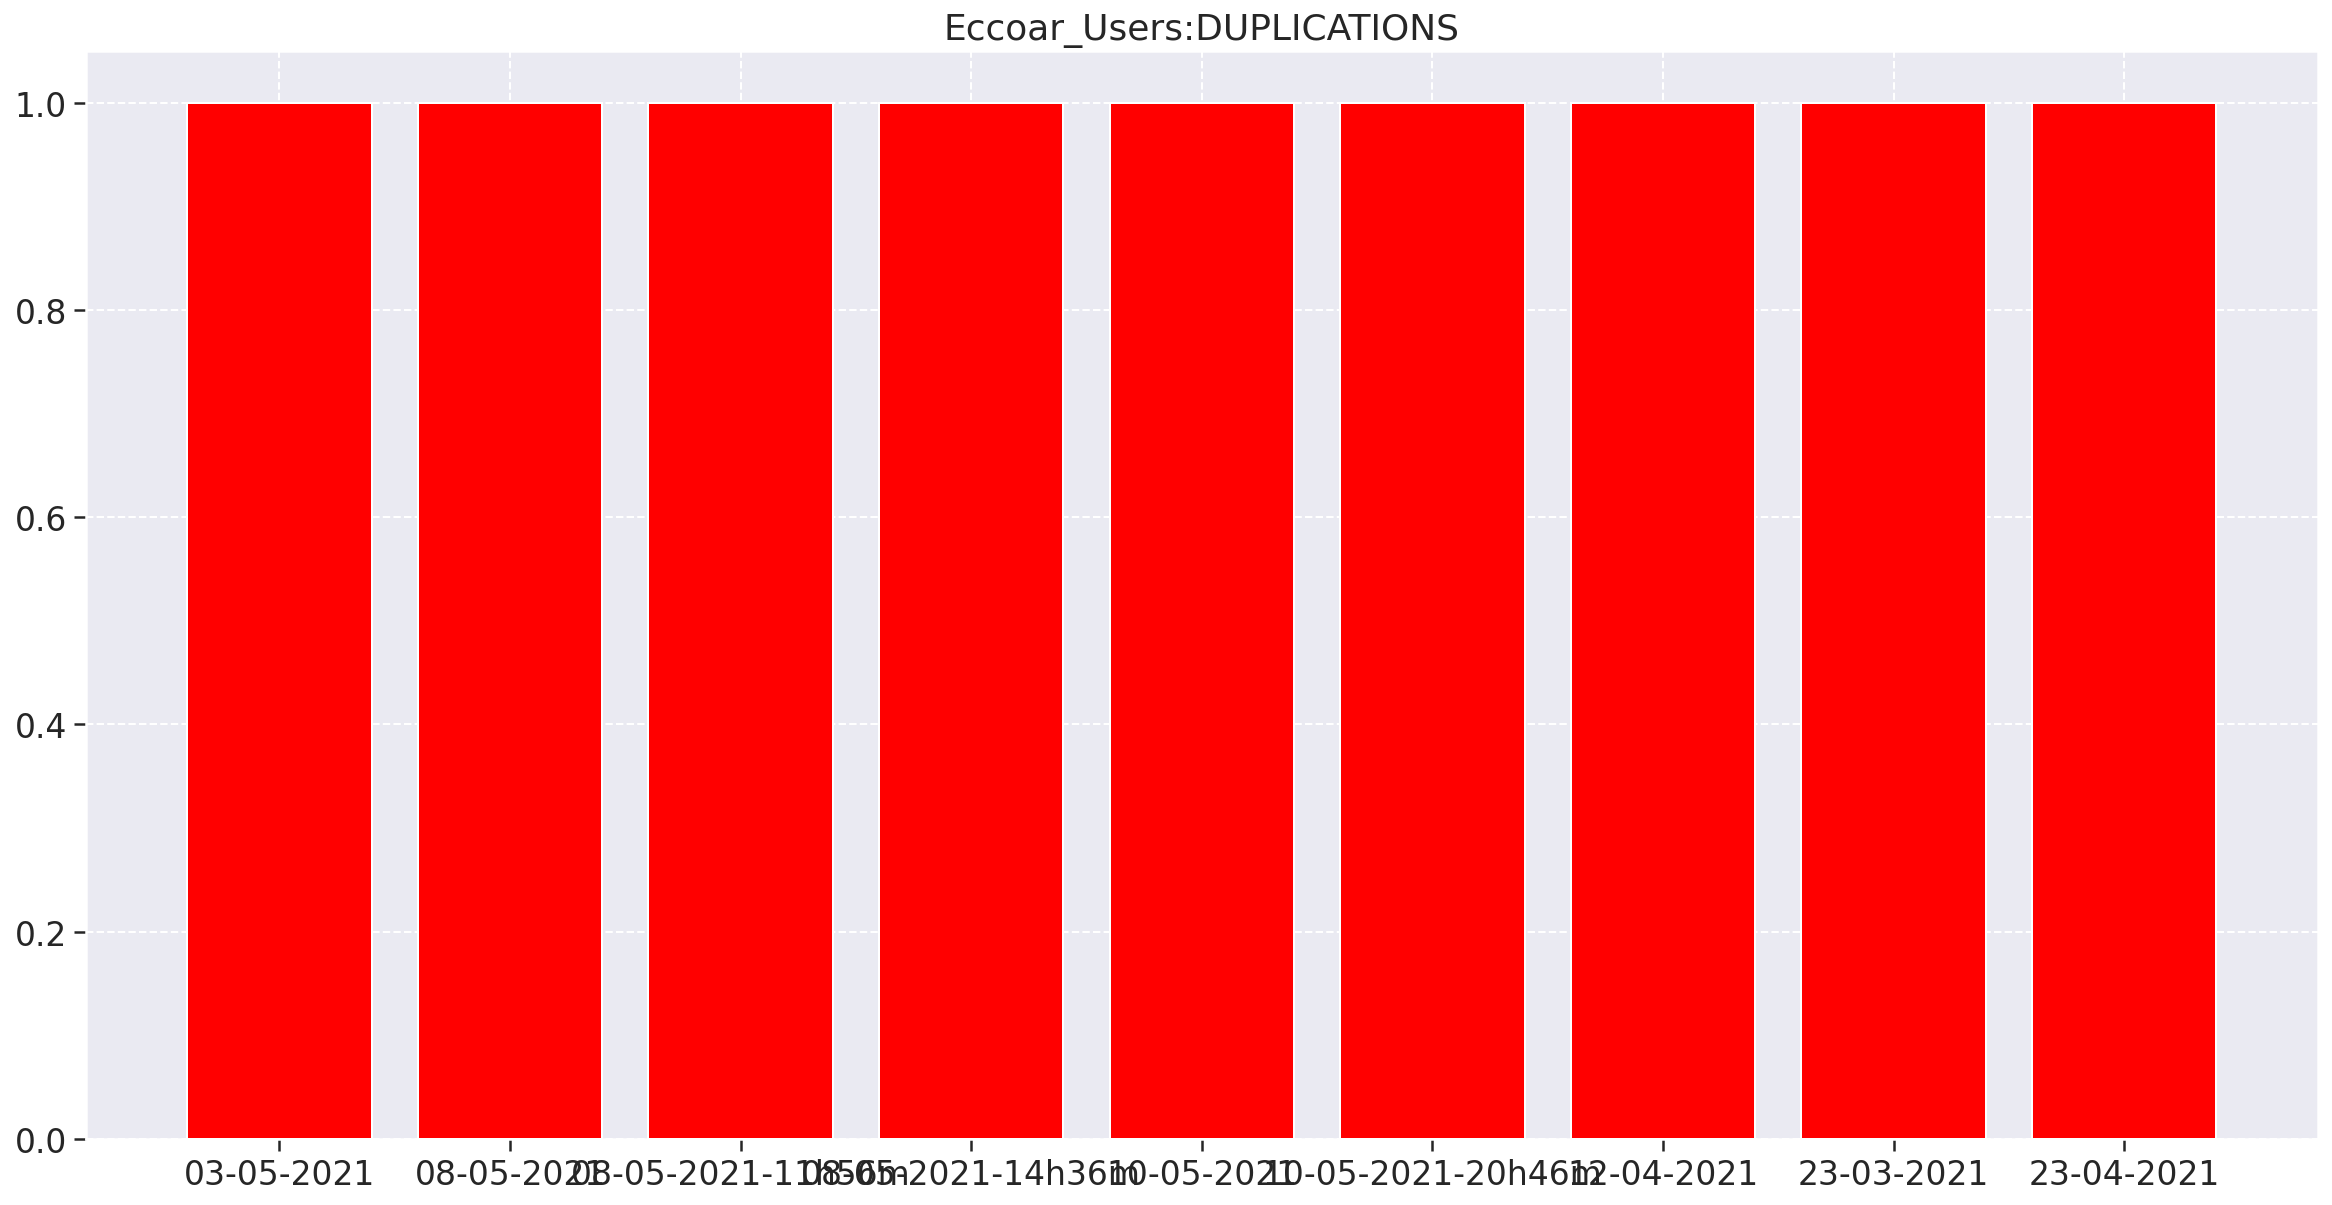

In [25]:
generate_histogram('m3', 'DUPLICATIONS', 'red')